In [64]:
from Tools import *
from photoObject import *
import emcee
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits
import xmatch
from Tools import *

In [65]:
def angstromTokms(centralA,As):
    c=299792
    v=c*(As-centralA)/centralA
    return v

def LineToRedshift(Obs,Rest):
    return (Obs/Rest)-1

def RedshiftToLine(Obs,z):
    return (Obs/(1+z))

In [66]:
#from astropy import units as u
#from astropy.coordinates import SkyCoord

#CatBino=ReadCatalogs("../Catalogs/Binospec-Candels.cat")
#Jorryt=ReadCatalogs("../Catalogs/jorryt.txt")
#JorrytC=SkyCoord(Jorryt["col2"],Jorryt["col3"])
#idx,d2d=xmatch.xmatch(JorrytC.ra,JorrytC.dec,CatBino["ra_candels"],CatBino["dec_candels"])

In [67]:
CatBino=ReadCatalogs("../Catalogs/Binospec-Candels.cat")
CatBino=CatBino[CatBino["Type"]=="NonDetect"]
Fresco=ReadCatalogs("../Catalogs/Fresco_latest.cat")

idx,d2d=xmatch.xmatch(CatBino["ra_candels"],CatBino["dec_candels"],Fresco["ra"],Fresco["dec"])
mask=[]
for i,d in zip(idx,d2d):
    print(i,d)
    if d.value<(0.5/3600.):
        mask.append(True)
    else:
        mask.append(False)


CatBino=CatBino[mask]
idx=idx[mask]
d2d=d2d[mask]
Fresco=[Fresco[i] for i in idx]


ids=[]
Fresco2,Bino2 = [],[]

# iterate through each element in the original array
for i,element in enumerate(Fresco):
    # add the element to the new list if it is not already there
    if element["id"] not in ids:
        Fresco2.append(element)
        Bino2.append(CatBino[i])
    else:
        print(CatBino[i]["id_charlotte"])
    ids.append(element["id"])

Fresco=Fresco2
CatBino=Bino2




9335 0d02m10.23282971s
7831 0d01m41.7280943s
10476 0d02m05.95419506s
315 0d00m00.03591431s
7434 0d00m00.12263615s
6115 0d00m00.12407348s
1793 0d00m00.06559172s
7690 0d00m00.07225331s
3778 0d00m00.07220426s
9335 0d03m04.25790153s
1531 0d03m42.09230451s
9762 0d02m07.66069237s
3205 0d01m24.13322665s
3349 0d03m56.31048721s
1319 0d01m14.55460828s
8695 0d02m44.29711395s
7900 0d01m40.1146995s
295 0d00m50.8049355s
7900 0d00m13.49095304s
1998 0d00m33.48485782s
8711 0d03m03.0741389s
295 0d02m36.82978219s
8714 0d00m50.60255408s
8822 0d02m06.44559045s
8863 0d00m54.26078836s
5044 0d01m05.49083765s
7831 0d01m07.94530128s
10476 0d00m57.26391888s
6652 0d02m33.72202622s
7288 0d01m20.96479302s
6318 0d02m29.8771741s
6318 0d02m30.40917457s
7876 0d02m09.99619116s
7888 0d01m13.65475239s
7799 0d00m54.98331068s
9802 0d01m25.00170752s
6959 0d00m00.08646375s
6854 0d00m00.12811078s
9802 0d00m13.30009024s
3777 0d00m00.13913162s
8122 0d00m15.08497294s
7997 0d01m19.35000868s
7876 0d01m31.40641377s
7915 0d00m00.0724

In [68]:
for gal in CatBino:
    if gal["id_charlotte"]=='z5_GND_35084':
        print(gal)

id_candels id_charlotte  ra_candels  dec_candels KPNO_U_FLUX LBC_U_FLUX   ACS_F435W_FLUX     ACS_F606W_FLUX    ACS_F775W_FLUX     ACS_F814W_FLUX   ACS_F850LP_FLUX    WFC3_F105W_FLUX    WFC3_F125W_FLUX   WFC3_F140W_FLUX    WFC3_F160W_FLUX   KPNO_U_FLUXERR LBC_U_FLUXERR ACS_F435W_FLUXERR  ACS_F606W_FLUXERR   ACS_F775W_FLUXERR   ACS_F814W_FLUXERR   ACS_F850LP_FLUXERR WFC3_F105W_FLUXERR  WFC3_F125W_FLUXERR WFC3_F140W_FLUXERR  WFC3_F160W_FLUXERR  z  LyaFlux LyaErr LyaFWHM Skewness photoz IDFink FluxLim    Type          HaFlux            dHaFlux       EWHa dEWHa       HaFWHM           dHaFWHM      fesc dfesc voff dvoff        zsys               Muv                 dMuv              slope               dslope       EWLya dEWLya LyaFWHM_int dLyaFWHM_int Asymmetry inFresco line  f090w_mag_aper_1 f090w_magerr_aper_1  f115w_mag_aper_1  f115w_magerr_aper_1   f150w_mag_aper_1  f150w_magerr_aper_1  f200w_mag_aper_1  f200w_magerr_aper_1  f277w_mag_aper_1  f277w_magerr_aper_1   f335m_mag_aper_1  f335m

In [69]:
import os
FrescMeta={}
inFresco=[]
for i in range(0,len(CatBino)):
    inFresco.append(CatBino[i]["id_charlotte"])
    print(i,Fresco[i]["id"],CatBino[i]["id_charlotte"],CatBino[i]['z'],6564.614*(1+CatBino[i]['z']),Fresco[i]["ra"],CatBino[i]["ra_candels"])
    #if len(str(Fresco[i]["id"]))==5:
    #    FrescMeta[str(CatBino[i]["id_charlotte"])]=[str(Fresco[i]["id"]),CatBino[i]['photoz']]
    #    os.system('wget -P ../data/large_files/Fresco/ https://s3.amazonaws.com/grizli-v2/HST/Pipeline/fresco-only-n-v2/Extractions/fresco-only-n-v2_'+str(Fresco[i]["id"])+'.1D.fits')
    #    os.system('wget -P ../data/large_files/Fresco/2D/ https://s3.amazonaws.com/grizli-v2/HST/Pipeline/fresco-only-n-v2/Extractions/fresco-only-n-v2_'+str(Fresco[i]["id"])+'.stack.fits')
    #if len(str(Fresco[i]["id"]))==4:
    #    FrescMeta[str(CatBino[i]["id_charlotte"])]=["0"+str(Fresco[i]["id"]),CatBino[i]['photoz']]
    #    os.system('wget -P ../data/large_files/Fresco/ https://s3.amazonaws.com/grizli-v2/HST/Pipeline/fresco-only-n-v2/Extractions/fresco-only-n-v2_0'+str(Fresco[i]["id"])+'.1D.fits')
    #    os.system('wget -P ../data/large_files/Fresco/2D/ https://s3.amazonaws.com/grizli-v2/HST/Pipeline/fresco-only-n-v2/Extractions/fresco-only-n-v2_0'+str(Fresco[i]["id"])+'.stack.fits')
    #if len(str(Fresco[i]["id"]))==3:
    #    FrescMeta[str(CatBino[i]["id_charlotte"])]=["00"+str(Fresco[i]["id"]),CatBino[i]['photoz']]
    #    os.system('wget -P ../data/large_files/Fresco/ https://s3.amazonaws.com/grizli-v2/HST/Pipeline/fresco-only-n-v2/Extractions/fresco-only-n-v2_00'+str(Fresco[i]["id"])+'.1D.fits')
    #    os.system('wget -P ../data/large_files/Fresco/2D/ https://s3.amazonaws.com/grizli-v2/HST/Pipeline/fresco-only-n-v2/Extractions/fresco-only-n-v2_00'+str(Fresco[i]["id"])+'.stack.fits')
    #if len(str(Fresco[i]["id"]))==2:
    #    print(i,Fresco[i]["id"],CatBino[i]["id_charlotte"],CatBino[i]['photoz'],6564.614*(1+CatBino[i]['photoz']),Fresco[i]["ra"],CatBino[i]["ra_candels"])
    #    FrescMeta[str(CatBino[i]["id_charlotte"])]=["00"+str(Fresco[i]["id"]),CatBino[i]['photoz']]
    #    os.system('wget -P ../data/large_files/Fresco/https://s3.amazonaws.com/grizli-v2/HST/Pipeline/fresco-only-n-v2/Extractions/fresco-only-n-v2_000'+str(Fresco[i]["id"])+'.1D.fits')
    #    print('https://s3.amazonaws.com/grizli-v2/HST/Pipeline/fresco-only-n-v2/Extractions/fresco-only-n-v2_000'+str(Fresco[i]["id"])+'.1D.fits')
    #    os.system('wget -P ../data/large_files/Fresco/2D/ https://s3.amazonaws.com/grizli-v2/HST/Pipeline/fresco-only-n-v2/Extractions/fresco-only-n-v2_000'+str(Fresco[i]["id"])+'.stack.fits')


np.save("../Catalogs/nonLAEinFresco.npy",np.array(inFresco))

0 13046 z6_GND_16819 nan nan 189.328216 189.32822851
1 10916 z5_GND_14430 nan nan 189.34226571 189.34225365
2 25365 z5_GND_30190 nan nan 189.24898395 189.24895977
3 1846 z5_GND_42418 nan nan 189.16655648 189.16654745
4 11949 z5_GND_15562 nan nan 189.10639433 189.10639407
5 4571 z5_GND_44499 nan nan 189.10599015 189.10594705
6 21755 z6_GND_25736 nan nan 189.33611542 189.33614463
7 21512 z6_GND_25400 nan nan 189.341909 189.34192304
8 17095 z6_GND_20879 nan nan 189.36925613 189.36923658
9 32657 z6_GND_3649 nan nan 189.20670384 189.20674033
10 26849 z5_GND_32273 nan nan 189.22628666 189.22633838
11 21339 z6_GND_25195 nan nan 189.26048919 189.26053535
12 23600 z6_GND_27453 nan nan 189.23740653 189.23743088
13 15847 z6_GND_19665 nan nan 189.24878151 189.24870624
14 8288 z6_GND_11494 nan nan 189.28868289 189.28866374
15 5423 z6_GND_8934 nan nan 189.25421725 189.25418859
16 7348 z5_GND_10574 nan nan 189.17564693 189.17560915
17 6840 z6_GND_10131 nan nan 189.16964623 189.16964436
18 1223 z6_GND

In [70]:
redsh=LineToRedshift(47220,6564.614)
print(redsh)
print(RedshiftToLine(8155,redsh))
print(RedshiftToLine(48590,redsh))
print("Lya Counterpart: ",1215.670*(1+redsh))
print("Separation: ",5893.799472295514-5275.857519788919)
print(6564.6+618)

6.193111430466438
1133.723574121135
6755.073999576451
Lya Counterpart:  8744.449772675134
Separation:  617.941952506595
7182.6


In [71]:
Fresco2[0].keys()

odict_keys(['root', 'id', 'b15', 'b15_zphot', 'ra', 'dec', 'm160', 'm210', 'm444', 'z_spec', 'z_phot', 'z_map', 'bic_diff', 'zwidth2', 'max_line', 'max_line_sn', 'flux_ha', 'flux_paa', 'sn_brg', 'sn_paa', 'sn_pab', 'sn_siii', 'sn_ha', 'sn_oiii', 'mtime', '2d', '1d', 'full', 'line', 'id_v51', 'z_map_prelim', 'linerot'])

In [72]:
ids=[]
for i,j in zip(Fresco,CatBino):
    if len(str(i["id"])) == 2:
        num = "000" + str(i["id"])
    elif len(str(i["id"])) == 3:
        num = "00" + str(i["id"])
    elif len(str(i["id"])) == 4:
        num = "0" + str(i["id"])
    else:
        num=str(i["id"])
    ids.append(num)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
27341
5.36
SNHA -99.0
SNOiii -99.0
zspec 4.686
38208.584494237555 50802.54773372237
28476.795779999997


<ipython-input-73-bd509ed76ec8>:80: RuntimeWarning: invalid value encountered in true_divide
  sig=np.nanstd(f[1].data["flux"]/f[1].data["flat"])


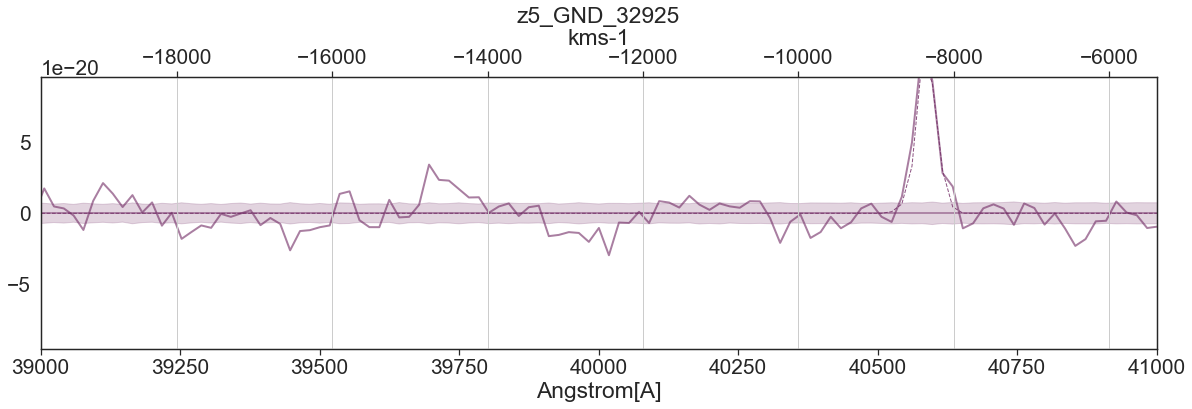

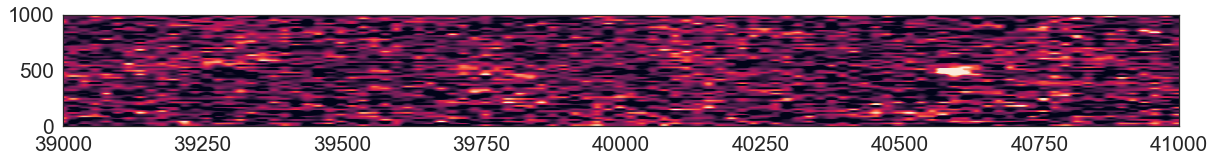

In [73]:
from scipy import interpolate
import matplotlib
import ipympl
%load_ext autoreload
%autoreload 
%matplotlib inline
i=80
i=i-3
print(ids[i])
print(CatBino[i]['photoz'])
print("SNHA",Fresco2[i]["sn_ha"])
print("SNOiii",Fresco2[i]["sn_oiii"])
print("zspec",Fresco2[i]["z_map"])
f=fits.open("../data/large_files/Fresco/fresco-only-n-v2_"+ids[i]+".1D.fits")
f2D=fits.open("../data/large_files/Fresco/2D/fresco-only-n-v2_"+ids[i]+".stack.fits")
sns.set_theme(style="white",font_scale = 1.9)
plt.rcParams["figure.figsize"] = (20,5)
fig, ax1 = plt.subplots()

Ha=6564.614*(1+CatBino[i]['photoz'])
Oiii=5008.239*(1+CatBino[i]['photoz'])
Sii=6716.440*(1+CatBino[i]['photoz'])
print(min(f[1].data["wave"]),max(f[1].data["wave"]))
Wave=angstromTokms(Ha,f[1].data["wave"])
oriWave=f[1].data["wave"]



ax1.axhline(y=0,color="#702963",alpha=0.6)
ax1.plot(oriWave,f[1].data["line"]/max(f[1].data["flat"]),lw=1,color="#702963",ls="--",alpha=0.8,zorder=0)
ax1.plot(oriWave,f[1].data["flux"]/max(f[1].data["flat"]),lw=2,color="#702963",alpha=0.6,zorder=100)

ax1.fill_between(oriWave,-f[1].data["err"]/max(f[1].data["flat"]),f[1].data["err"]/max(f[1].data["flat"]),color='#702963',alpha=0.2,zorder=-10)

ax1.set_xlabel("Angstrom[A]")
ax1.tick_params('y')


# Create the second x-axis
ax2 = ax1.twiny()

ax2.plot(Wave,f[1].data["line"]/max(f[1].data["flat"])," ")
ax2.tick_params('y', colors='r')
ax2.set_xlabel("kms-1")

#ax2.set_xticklabels([ np.round(angstromTokms(lya,w)+Offset,2) for w in ax1.get_xticks()])

#ax2.set_xticks(Wave)
#ax2.set_xticklabels(Wave)


ax1.axvline(x=Ha,ls="--",color="grey",label="Expected Ha",alpha=0.5,lw=4,zorder=0)
ax1.axvline(x=Sii,ls="--",color="grey",label="Expected Sii",alpha=0.5,lw=4,zorder=0)

ax1.axvline(x=Oiii,ls="--",color="green",label="Expected oiii",alpha=0.5,lw=4,zorder=0)

interp = interpolate.interp1d(oriWave, Wave)



Limit=False
print(5008.23*(1+Fresco2[i]["z_map"]))

if Limit!=False:
    x_min = Limit-2000#min(oriWave)
    x_max = Limit+2000#max(oriWave)
    ax1.set_xlim(x_min, x_max)
    ax2.set_xlim(interp(x_min), interp(x_max))
    mask=(np.array(oriWave)>x_min) & (np.array(oriWave)<x_max)
    datos=(f[1].data["flux"]/f[1].data["flat"])[mask]
    ax1.set_ylim(np.min(datos)*1.3, np.max(datos)*1.3)



if Limit==False:
    x_min = 39000
    x_max = 41000
    ax1.set_xlim(x_min, x_max)
    ax2.set_xlim(interp(x_min), interp(x_max))
    sig=np.nanstd(f[1].data["flux"]/f[1].data["flat"])
    ax1.set_ylim(-2*sig, 2*sig)
plt.title(str(CatBino[i]['id_charlotte']))#+"   Lya Flux: "+str(LyaFlux[i]))

plt.grid()

plt.show()

plt.rcParams["figure.figsize"] = (20,5)
fig, ax1 = plt.subplots()
ax1.imshow(f2D[1].data,extent=[min(oriWave),max(oriWave),0,1000],aspect=0.2,vmin=-0.003,vmax=0.01,)
ax1.set_xlim(x_min, x_max)


plt.show()

In [74]:
oriWave[400]-oriWave[399]

20.544946709589567

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<ipython-input-75-6fc57b069d44>:16: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  zspec=(np.float(HaCat[i]["Ha"])/6562.8)-1
<ipython-input-75-6fc57b069d44>:14: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  zspec=(np.float(HaCat[i]["Oiii"])/5006.8)-1


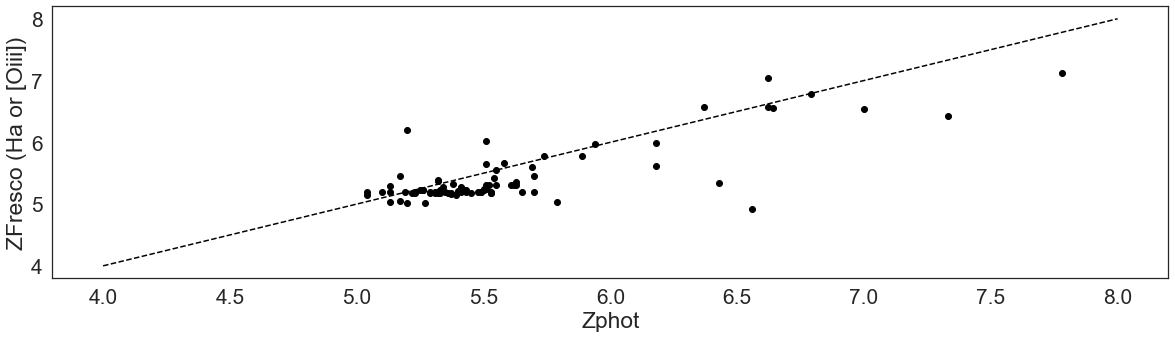

In [75]:
%load_ext autoreload
%autoreload
from photoObject import *
PObj=[]
HaCat=ascii.read("../Catalogs/HaLinesNonDetect.cat")
for i in range(0,len(HaCat)):
    #print(ids[i],HaCat[i]["ID"],HaCat[i]["Ha"])
    zphot=CatBino[i]['photoz']
    zspec=np.nan

    if HaCat[i]["Ha"]=="X" and HaCat[i]["Oiii"]=="X":
        zspec=np.nan
    elif HaCat[i]["Ha"]=="X":
        zspec=(np.float(HaCat[i]["Oiii"])/5006.8)-1
    elif HaCat[i]["Oiii"]=="X":
        zspec=(np.float(HaCat[i]["Ha"])/6562.8)-1      

    plt.scatter(zphot,zspec,color="black")

plt.plot([4,8],[4,8],color="black",ls="--")
plt.xlabel("Zphot")
plt.ylabel("ZFresco (Ha or [Oiii])")
plt.show()



In [76]:
%load_ext autoreload
%autoreload
from photoObject import *
PObj=[]
HaCat=ascii.read("../Catalogs/HaLinesNonDetect.cat")
for i in range(0,len(HaCat)):
    if (HaCat[i]["Oiii"]!="X" or HaCat[i]["Ha"]!="X") and HaCat[i]["Flag"]<=2:
        print(CatBino[i]["id_charlotte"],HaCat[i]["ID"],Fresco[i]["id"])
        Other=[Fresco[i]["id"],CatBino[i]["z"],CatBino[i]["ra_candels"],CatBino[i]["dec_candels"]]
        PObj.append(PhotoObject(HaCat[i],Other))


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
z6_GND_16819 z6_GND_16819 13046
z5_GND_14430 z5_GND_14430 10916
z5_GND_30190 z5_GND_30190 25365
z5_GND_42418 z5_GND_42418 1846
z5_GND_15562 z5_GND_15562 11949
z6_GND_25736 z6_GND_25736 21755
z6_GND_25400 z6_GND_25400 21512
z6_GND_3649 z6_GND_3649 32657
z5_GND_32273 z5_GND_32273 26849
z6_GND_25195 z6_GND_25195 21339
z6_GND_27453 z6_GND_27453 23600
z6_GND_19665 z6_GND_19665 15847
z6_GND_11494 z6_GND_11494 8288
z6_GND_8934 z6_GND_8934 5423
z5_GND_10574 z5_GND_10574 7348
z6_GND_10131 z6_GND_10131 6840
z6_GND_41463 z6_GND_41463 1223
z6_GND_36607 z6_GND_36607 29840
z6_GND_28182 z6_GND_28182 23812
z6_GND_20167 z6_GND_20167 17226
z6_GND_22665 z6_GND_22665 18897
z6_GND_22789 z6_GND_22789 19119
z7_GND_22525 z7_GND_22525 18742
z7_GND_34860 z7_GND_34860 28647
z7_GND_34730 z7_GND_34730 28560
z5_GND_13996 z5_GND_13996 10648
z6_GND_7095 z6_GND_7095 2489
z7_GND_41647 z7_GND_41647 1324
z7_GND_15642 z7_GND_15642 1197

In [ ]:
z5_GND_14131

100

In [78]:
CatBino[0]

id_candels,id_charlotte,ra_candels,dec_candels,KPNO_U_FLUX,LBC_U_FLUX,ACS_F435W_FLUX,ACS_F606W_FLUX,ACS_F775W_FLUX,ACS_F814W_FLUX,ACS_F850LP_FLUX,WFC3_F105W_FLUX,WFC3_F125W_FLUX,WFC3_F140W_FLUX,WFC3_F160W_FLUX,KPNO_U_FLUXERR,LBC_U_FLUXERR,ACS_F435W_FLUXERR,ACS_F606W_FLUXERR,ACS_F775W_FLUXERR,ACS_F814W_FLUXERR,ACS_F850LP_FLUXERR,WFC3_F105W_FLUXERR,WFC3_F125W_FLUXERR,WFC3_F140W_FLUXERR,WFC3_F160W_FLUXERR,z,LyaFlux,LyaErr,LyaFWHM,Skewness,photoz,IDFink,FluxLim,Type,HaFlux,dHaFlux,EWHa,dEWHa,HaFWHM,dHaFWHM,fesc,dfesc,voff,dvoff,zsys,Muv,dMuv,slope,dslope,EWLya,dEWLya,LyaFWHM_int,dLyaFWHM_int,Asymmetry,inFresco,line,f090w_mag_aper_1,f090w_magerr_aper_1,f115w_mag_aper_1,f115w_magerr_aper_1,f150w_mag_aper_1,f150w_magerr_aper_1,f200w_mag_aper_1,f200w_magerr_aper_1,f277w_mag_aper_1,f277w_magerr_aper_1,f335m_mag_aper_1,f335m_magerr_aper_1,f356w_mag_aper_1,f356w_magerr_aper_1,f410m_mag_aper_1,f410m_magerr_aper_1,f444w_mag_aper_1,f444w_magerr_aper_1
int64,str19,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str12,float64,str9,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str8,str4,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
16735,z6_GND_16819,189.32822851,62.25631626,-99.0,-99.0,-99.0,-99.0,26.346096519906617,25.941113665952848,25.30222114460068,24.99653090674967,24.999725084935278,24.901821064598835,24.89609933680953,-99.0,-99.0,-99.0,-99.0,0.14549631905684635,0.06670925635716429,0.06812956525308778,0.040719879986809815,0.023247650803845943,0.0980442069854277,0.036395008690277564,nan,nan,nan,nan,nan,5.55,nan,-17.01888915824777,NonDetect,-16.69156584863727,-18.012792905620756,256.71242476561633,18.99725055040186,462.7789733062964,24.30870664905524,0.04675387631819045,nan,nan,nan,5.307154330828031,-21.004718004104554,0.01476990079752305,-0.7348797520608285,0.09230616939549435,10.89248598956176,nan,nan,nan,nan,inFresco,Ha,25.563831196015492,0.01963047814783181,25.229358798071104,0.012240275227057396,nan,nan,nan,nan,nan,nan,nan,nan,24.60430581904331,0.006308364924862531,nan,nan,24.503190728686242,0.01213332546988255


## Fitting

In [79]:
def FitGaussian(wave,Flux,FluxErr,lineWave,ShowPlots=True):
    inValues=[0,lineWave,20,0]
    labels = ["Amp","Mean", "FWHM","C"]
 
    stp=1500
    discard=1000
    walknum=50
    sampler,logprob=MCMC.runMCMC([wave,Flux,FluxErr],inValues,lineWave,steps=stp,nwalkers=walknum)
    if ShowPlots==True:
        #MCMC.plotChain(sampler,labels)
        #MCMC.plotCorner(sampler,labels,discard=discard)
        MCMC.plotModels(sampler,wave,Flux,FluxErr,discard=discard)

    pairs,ampVals,meanVals,stdVals,cVals=MCMC.returnParameters(sampler,discard=discard)
    return ampVals,meanVals,stdVals,cVals,pairs#betaVals[1],MuvVals[1],[betaErr,MuvErr],[Flux,FluxErr],pairs


In [80]:
def Gausiana(x,Amp,Mean,FWHM,C):
    fw_param=FWHM/(2*np.sqrt(2*np.log(2)))
    return (Amp/(fw_param*np.sqrt(2*np.pi))) * np.exp( -0.5 * (x-Mean)**2 / fw_param**2)  + C    

def SpecialkmsToangstrom(v,centralA):
    c=300000
    As = centralA*(v+c)/c
    return As

In [81]:
def SNR(wave,flux,err,zsys,fwhm_kms,line):
    L={"Ha":6564.614,"Oiii":5008.239}
    LineWave=L[line]*(1+zsys)
    FWHM=Tools.kmsToangstrom(fwhm_kms,LineWave)
    mask=(wave>LineWave-FWHM/2) & (wave<LineWave+FWHM/2)
    flux=flux[mask]
    err=err[mask]
    
    Signal=np.sum(flux)
    Noise=np.sqrt(np.sum(err**2))
    SNR=Signal/Noise


    return SNR

def retrievePairSTD(wave,pairs):
    gs=[]
    for i,s in enumerate(pairs):
        if i%50==0:
            gs.append(Gausiana(wave,*s)-s[3])
    FitAreaSTD=[]
    for point in np.transpose(gs):
        FitAreaSTD.append(np.std(point))
    FitAreaSTD=np.array(FitAreaSTD)
    return FitAreaSTD

def fix_XTicks(ticks,typeOfData):
    if typeOfData=='wave':
        for t in ticks[:-1]:
            if np.abs(ticks[-1]-t)<3:
                ticks=ticks[ticks!=t]
        
        newt=[]
        for t in ticks:
            if t%5==0:
                newt.append(int(t))
            else:
                newt.append(np.round(t,2))

        print(newt)
        return newt

    if typeOfData=='kms':
        for t in ticks[:-1]:
            if np.abs(ticks[-1]-t)<1:
                ticks=ticks[ticks!=t]
        return ticks

def fix_XticksVelocities(cLambda,typeOfData):
    if typeOfData=='kms':
        labels=np.linspace(-3500,3500,11)
        ticks=[]
        for l in labels:
            ticks.append(SpecialkmsToangstrom(l,cLambda))

        return ticks,labels.astype(int)

In [82]:
FrescoCat=ReadCatalogs("../Catalogs/Fresco_latest.cat")
FrescoBino_counterpart={}
for gal in PObj:
    idx,d2d=xmatch.xmatch(gal.ra,gal.dec,FrescoCat["ra"],FrescoCat["dec"])
    FrescoBino_counterpart[gal.ID]="{:05d}".format(FrescoCat[idx]["id"])
    

In [83]:
%load_ext autoreload
%autoreload
sns.set_theme(style="white",font_scale = 1.5)
plt.rcParams["figure.figsize"] = (12,8)

run=True
LineUsed=[]
if run==True:
    ln=["Ha","Oiii"]
    for gal in PObj[:]:
        print(gal.ID)
        f=fits.open("../data/large_files/Fresco/fresco-only-n-v2_"+f"{gal.IDFresco:05}"+".1D.fits")
        f2D=fits.open("../data/large_files/Fresco/2D/fresco-only-n-v2_"+str(FrescoBino_counterpart[gal.ID])+".stack.fits")
        wave,flux,err=f[1].data["wave"],f[1].data["flux"]/f[1].data["flat"]*1e18,f[1].data["err"]/f[1].data["flat"]*1e18

        tempM={"ID":gal.ID,"zLya":gal.zLya,"Ha":np.array([np.nan,np.nan,np.nan]),"Oiii":np.array([np.nan,np.nan,np.nan])}
        tempS={"ID":gal.ID,"zLya":gal.zLya,"Ha":np.array([np.nan,np.nan,np.nan]),"Oiii":np.array([np.nan,np.nan,np.nan])}
        tempA={"ID":gal.ID,"zLya":gal.zLya,"Ha":np.array([np.nan,np.nan,np.nan]),"Oiii":np.array([np.nan,np.nan,np.nan])}
        for l in ln:
            if getattr(gal, "aWave"+l)=="X":
                continue
            LineUsed.append(l)
            gal.WhichLine(l)
            print("Line Being Used: ",l)
            
            approxWave=float(getattr(gal, "aWave"+l))
            mask=(wave>approxWave-200)&(wave<approxWave+200) &(np.isnan(flux)==False)




            showMe=False
            if l=="Oiii":
                showMe=False

            a,m,s,c,pairs=FitGaussian(wave[mask],flux[mask],err[mask],approxWave,ShowPlots=False)
            tempM[l]=m
            tempA[l]=a
            tempS[l]=s
        gal.giveWave(tempM)
        gal.giveFWHM(tempS)
        gal.giveAmplitude(tempA)
        gal.getFWHM()
        gal.getOffset()
        
        fig, (ax1, ax3) = plt.subplots(2, 1, sharex=True)
        ax2 = ax1.twiny()
        mask=(wave>m[1]-500)&(wave<m[1]+500)
        ax1.step(wave[mask],flux[mask]-c[1],color='#342E31',label='Flux')
        ax1.axhline(y=0,color='black',lw=1)
        ax1.fill_between(wave[mask],err[mask],-err[mask],color='#630330',alpha=0.2,zorder=-10)
        ax1.text(  # position text relative to Axes
                        0.05, 0.85, r'z$_\mathrm{sys}$ = '+str(np.round(gal.zsys[1],3)),
                        transform=ax1.transAxes, size=20
        )

        fwidth=gal.fwhm
        if np.isnan(gal.fwhm)==True:
            fwidth=Tools.angstromTokms(m[1],s[1]/2.0)*2



        SN=SNR(wave[mask],flux[mask],err[mask],gal.zsys[1],fwidth,gal.LineName)
        ax1.text(0.05, 0.7,s=r"SN = "+str(np.round(SN,1)),transform=ax1.transAxes,fontsize=20)

        gausiana=Gausiana(wave[mask],*np.median(np.transpose(pairs),axis=1))-c[1]
        FitAreaSTD=retrievePairSTD(wave[mask],pairs)

        ax1.plot(wave[mask],gausiana,'black',ls="--",lw=2,alpha=0.7)
        ax1.fill_between(wave[mask], gausiana-FitAreaSTD, gausiana+FitAreaSTD,color="gray",alpha=0.3)
        ax1.axvline(x=m[1],ls="--",color="black",alpha=0.5,lw=2)


        ax3.imshow(f2D[1].data,extent=[min(wave),max(wave),-np.shape(f2D[1].data)[1]/2,np.shape(f2D[1].data)[1]/2],aspect=0.2,cmap='gray',vmin=-0.5*np.std(f2D[1].data),vmax=2*np.std(f2D[1].data))
        ax1.set_xlim(m[1]-500,m[1]+500)
        ax3.set_xlabel(r"Wavelength [$\AA$]",fontsize=20)
        ax1.set_ylabel(r"Flux [1e-18 erg/s/cm$^2/\AA$]")
        ax2.set_xlabel("Velocity [km/s]",loc='right',fontsize=20)
        ax1.set_title(str(gal.ID),fontsize=30,loc='left')



        ax2.set_xticks(ax1.get_xticks())
        ax2.set_xbound(ax1.get_xbound())
        ax2.set_xticklabels([ np.round(angstromTokms(m[1],w),2) for w in ax1.get_xticks()])

        
        ax2.set_xticks(fix_XticksVelocities(m[1],'kms')[0])
        ax2.set_xticklabels(fix_XticksVelocities(m[1],'kms')[1])
        #ax2.set_xlim(m[1]-500,m[1]+500)
        plt.subplots_adjust(wspace=-0.2, hspace=-0.2)
        plt.savefig('../ForPDF/HaProfiles/'+str(gal.ID)+".pdf",dpi=200, bbox_inches = "tight")
        plt.clf()
        #plt.show()



    [gal.getOffset() for gal in PObj]
    [gal.getFWHM() for gal in PObj]
    [gal.getFlux() for gal in PObj]
    noLyaHa=[]
    for gal in PObj:
        noLyaHa.append({"ID":gal.ID,"HaFlux":[gal.flux,gal.dflux],"HaFWHM":[gal.fwhm,gal.dfwhm],"Off":[gal.off,gal.doff],"zsys":gal.zsys})

    np.save("../Catalogs/ForMaster/noLyaHa.npy",noLyaHa)

<ipython-input-83-53638b26f00c>:14: RuntimeWarning: invalid value encountered in true_divide
  wave,flux,err=f[1].data["wave"],f[1].data["flux"]/f[1].data["flat"]*1e18,f[1].data["err"]/f[1].data["flat"]*1e18
  0%|          | 0/1500 [00:00<?, ?it/s]/Users/gonzalo/opt/anaconda3/lib/python3.8/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
  4%|▍         | 60/1500 [00:00<00:02, 590.01it/s]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
z6_GND_16819
Line Being Used:  Ha


100%|██████████| 1500/1500 [00:02<00:00, 514.74it/s]
<ipython-input-83-53638b26f00c>:14: RuntimeWarning: invalid value encountered in true_divide
  wave,flux,err=f[1].data["wave"],f[1].data["flux"]/f[1].data["flat"]*1e18,f[1].data["err"]/f[1].data["flat"]*1e18
  0%|          | 0/1500 [00:00<?, ?it/s]/Users/gonzalo/opt/anaconda3/lib/python3.8/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
  4%|▍         | 57/1500 [00:00<00:02, 566.30it/s]

z5_GND_14430
Line Being Used:  Ha


100%|██████████| 1500/1500 [00:03<00:00, 498.05it/s]
<ipython-input-83-53638b26f00c>:14: RuntimeWarning: invalid value encountered in true_divide
  wave,flux,err=f[1].data["wave"],f[1].data["flux"]/f[1].data["flat"]*1e18,f[1].data["err"]/f[1].data["flat"]*1e18
  0%|          | 0/1500 [00:00<?, ?it/s]/Users/gonzalo/opt/anaconda3/lib/python3.8/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
  4%|▍         | 64/1500 [00:00<00:02, 631.01it/s]

z5_GND_30190
Line Being Used:  Ha


100%|██████████| 1500/1500 [00:02<00:00, 505.57it/s]
<ipython-input-83-53638b26f00c>:14: RuntimeWarning: invalid value encountered in true_divide
  wave,flux,err=f[1].data["wave"],f[1].data["flux"]/f[1].data["flat"]*1e18,f[1].data["err"]/f[1].data["flat"]*1e18
  0%|          | 0/1500 [00:00<?, ?it/s]/Users/gonzalo/opt/anaconda3/lib/python3.8/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
  4%|▎         | 53/1500 [00:00<00:02, 529.83it/s]

z5_GND_42418
Line Being Used:  Ha


100%|██████████| 1500/1500 [00:02<00:00, 504.99it/s]
<ipython-input-83-53638b26f00c>:14: RuntimeWarning: invalid value encountered in true_divide
  wave,flux,err=f[1].data["wave"],f[1].data["flux"]/f[1].data["flat"]*1e18,f[1].data["err"]/f[1].data["flat"]*1e18
  0%|          | 0/1500 [00:00<?, ?it/s]/Users/gonzalo/opt/anaconda3/lib/python3.8/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
  4%|▍         | 62/1500 [00:00<00:02, 610.83it/s]

z5_GND_15562
Line Being Used:  Ha


100%|██████████| 1500/1500 [00:03<00:00, 498.04it/s]
<ipython-input-83-53638b26f00c>:14: RuntimeWarning: invalid value encountered in true_divide
  wave,flux,err=f[1].data["wave"],f[1].data["flux"]/f[1].data["flat"]*1e18,f[1].data["err"]/f[1].data["flat"]*1e18
  0%|          | 0/1500 [00:00<?, ?it/s]/Users/gonzalo/opt/anaconda3/lib/python3.8/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
  4%|▍         | 61/1500 [00:00<00:02, 593.97it/s]

z6_GND_25736
Line Being Used:  Ha


100%|██████████| 1500/1500 [00:02<00:00, 539.35it/s]
<ipython-input-83-53638b26f00c>:14: RuntimeWarning: invalid value encountered in true_divide
  wave,flux,err=f[1].data["wave"],f[1].data["flux"]/f[1].data["flat"]*1e18,f[1].data["err"]/f[1].data["flat"]*1e18
  0%|          | 0/1500 [00:00<?, ?it/s]/Users/gonzalo/opt/anaconda3/lib/python3.8/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
  4%|▍         | 64/1500 [00:00<00:02, 636.11it/s]

z6_GND_25400
Line Being Used:  Ha


100%|██████████| 1500/1500 [00:02<00:00, 516.03it/s]
<ipython-input-83-53638b26f00c>:14: RuntimeWarning: invalid value encountered in true_divide
  wave,flux,err=f[1].data["wave"],f[1].data["flux"]/f[1].data["flat"]*1e18,f[1].data["err"]/f[1].data["flat"]*1e18
  0%|          | 0/1500 [00:00<?, ?it/s]/Users/gonzalo/opt/anaconda3/lib/python3.8/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
  4%|▍         | 62/1500 [00:00<00:02, 614.64it/s]

z6_GND_3649
Line Being Used:  Ha


100%|██████████| 1500/1500 [00:02<00:00, 522.55it/s]
<ipython-input-83-53638b26f00c>:14: RuntimeWarning: invalid value encountered in true_divide
  wave,flux,err=f[1].data["wave"],f[1].data["flux"]/f[1].data["flat"]*1e18,f[1].data["err"]/f[1].data["flat"]*1e18
  0%|          | 0/1500 [00:00<?, ?it/s]/Users/gonzalo/opt/anaconda3/lib/python3.8/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
  4%|▍         | 62/1500 [00:00<00:02, 616.53it/s]

z5_GND_32273
Line Being Used:  Ha


100%|██████████| 1500/1500 [00:02<00:00, 536.06it/s]
<ipython-input-83-53638b26f00c>:14: RuntimeWarning: invalid value encountered in true_divide
  wave,flux,err=f[1].data["wave"],f[1].data["flux"]/f[1].data["flat"]*1e18,f[1].data["err"]/f[1].data["flat"]*1e18
  0%|          | 0/1500 [00:00<?, ?it/s]/Users/gonzalo/opt/anaconda3/lib/python3.8/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
  4%|▍         | 64/1500 [00:00<00:02, 632.33it/s]

z6_GND_25195
Line Being Used:  Ha


100%|██████████| 1500/1500 [00:02<00:00, 543.13it/s]
<ipython-input-83-53638b26f00c>:14: RuntimeWarning: invalid value encountered in true_divide
  wave,flux,err=f[1].data["wave"],f[1].data["flux"]/f[1].data["flat"]*1e18,f[1].data["err"]/f[1].data["flat"]*1e18
  0%|          | 0/1500 [00:00<?, ?it/s]/Users/gonzalo/opt/anaconda3/lib/python3.8/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
  4%|▍         | 63/1500 [00:00<00:02, 622.61it/s]

z6_GND_27453
Line Being Used:  Ha


100%|██████████| 1500/1500 [00:02<00:00, 516.19it/s]
<ipython-input-83-53638b26f00c>:14: RuntimeWarning: invalid value encountered in true_divide
  wave,flux,err=f[1].data["wave"],f[1].data["flux"]/f[1].data["flat"]*1e18,f[1].data["err"]/f[1].data["flat"]*1e18
  0%|          | 0/1500 [00:00<?, ?it/s]/Users/gonzalo/opt/anaconda3/lib/python3.8/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
  4%|▍         | 63/1500 [00:00<00:02, 625.39it/s]

z6_GND_19665
Line Being Used:  Ha


100%|██████████| 1500/1500 [00:02<00:00, 506.77it/s]
<ipython-input-83-53638b26f00c>:14: RuntimeWarning: invalid value encountered in true_divide
  wave,flux,err=f[1].data["wave"],f[1].data["flux"]/f[1].data["flat"]*1e18,f[1].data["err"]/f[1].data["flat"]*1e18
  0%|          | 0/1500 [00:00<?, ?it/s]/Users/gonzalo/opt/anaconda3/lib/python3.8/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
  4%|▍         | 62/1500 [00:00<00:02, 614.87it/s]

z6_GND_11494
Line Being Used:  Ha


100%|██████████| 1500/1500 [00:02<00:00, 515.32it/s]
<ipython-input-83-53638b26f00c>:14: RuntimeWarning: invalid value encountered in true_divide
  wave,flux,err=f[1].data["wave"],f[1].data["flux"]/f[1].data["flat"]*1e18,f[1].data["err"]/f[1].data["flat"]*1e18
  0%|          | 0/1500 [00:00<?, ?it/s]/Users/gonzalo/opt/anaconda3/lib/python3.8/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
  4%|▍         | 62/1500 [00:00<00:02, 619.67it/s]

z6_GND_8934
Line Being Used:  Ha


100%|██████████| 1500/1500 [00:02<00:00, 562.42it/s]
<ipython-input-83-53638b26f00c>:14: RuntimeWarning: invalid value encountered in true_divide
  wave,flux,err=f[1].data["wave"],f[1].data["flux"]/f[1].data["flat"]*1e18,f[1].data["err"]/f[1].data["flat"]*1e18
  0%|          | 0/1500 [00:00<?, ?it/s]/Users/gonzalo/opt/anaconda3/lib/python3.8/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
  4%|▍         | 60/1500 [00:00<00:02, 599.35it/s]

z5_GND_10574
Line Being Used:  Ha


100%|██████████| 1500/1500 [00:02<00:00, 508.02it/s]
<ipython-input-83-53638b26f00c>:14: RuntimeWarning: invalid value encountered in true_divide
  wave,flux,err=f[1].data["wave"],f[1].data["flux"]/f[1].data["flat"]*1e18,f[1].data["err"]/f[1].data["flat"]*1e18
  0%|          | 0/1500 [00:00<?, ?it/s]/Users/gonzalo/opt/anaconda3/lib/python3.8/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
  4%|▍         | 64/1500 [00:00<00:02, 634.42it/s]

z6_GND_10131
Line Being Used:  Ha


100%|██████████| 1500/1500 [00:03<00:00, 499.20it/s]
<ipython-input-83-53638b26f00c>:14: RuntimeWarning: invalid value encountered in true_divide
  wave,flux,err=f[1].data["wave"],f[1].data["flux"]/f[1].data["flat"]*1e18,f[1].data["err"]/f[1].data["flat"]*1e18
  0%|          | 0/1500 [00:00<?, ?it/s]/Users/gonzalo/opt/anaconda3/lib/python3.8/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
  4%|▍         | 62/1500 [00:00<00:02, 612.01it/s]

z6_GND_41463
Line Being Used:  Ha


100%|██████████| 1500/1500 [00:02<00:00, 507.51it/s]
<ipython-input-83-53638b26f00c>:14: RuntimeWarning: invalid value encountered in true_divide
  wave,flux,err=f[1].data["wave"],f[1].data["flux"]/f[1].data["flat"]*1e18,f[1].data["err"]/f[1].data["flat"]*1e18
  0%|          | 0/1500 [00:00<?, ?it/s]/Users/gonzalo/opt/anaconda3/lib/python3.8/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
  4%|▍         | 59/1500 [00:00<00:02, 580.54it/s]

z6_GND_36607
Line Being Used:  Ha


100%|██████████| 1500/1500 [00:02<00:00, 500.01it/s]
<ipython-input-83-53638b26f00c>:14: RuntimeWarning: invalid value encountered in true_divide
  wave,flux,err=f[1].data["wave"],f[1].data["flux"]/f[1].data["flat"]*1e18,f[1].data["err"]/f[1].data["flat"]*1e18
  0%|          | 0/1500 [00:00<?, ?it/s]/Users/gonzalo/opt/anaconda3/lib/python3.8/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
  4%|▍         | 64/1500 [00:00<00:02, 632.89it/s]

z6_GND_28182
Line Being Used:  Ha


100%|██████████| 1500/1500 [00:02<00:00, 514.87it/s]
<ipython-input-83-53638b26f00c>:14: RuntimeWarning: invalid value encountered in true_divide
  wave,flux,err=f[1].data["wave"],f[1].data["flux"]/f[1].data["flat"]*1e18,f[1].data["err"]/f[1].data["flat"]*1e18
  0%|          | 0/1500 [00:00<?, ?it/s]/Users/gonzalo/opt/anaconda3/lib/python3.8/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
  4%|▍         | 61/1500 [00:00<00:02, 600.97it/s]

z6_GND_20167
Line Being Used:  Ha


100%|██████████| 1500/1500 [00:02<00:00, 548.98it/s]
<ipython-input-83-53638b26f00c>:14: RuntimeWarning: invalid value encountered in true_divide
  wave,flux,err=f[1].data["wave"],f[1].data["flux"]/f[1].data["flat"]*1e18,f[1].data["err"]/f[1].data["flat"]*1e18
  0%|          | 0/1500 [00:00<?, ?it/s]/Users/gonzalo/opt/anaconda3/lib/python3.8/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
  4%|▍         | 61/1500 [00:00<00:02, 600.28it/s]

z6_GND_22665
Line Being Used:  Ha


100%|██████████| 1500/1500 [00:02<00:00, 538.35it/s]
<ipython-input-83-53638b26f00c>:46: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, (ax1, ax3) = plt.subplots(2, 1, sharex=True)
<ipython-input-83-53638b26f00c>:14: RuntimeWarning: invalid value encountered in true_divide
  wave,flux,err=f[1].data["wave"],f[1].data["flux"]/f[1].data["flat"]*1e18,f[1].data["err"]/f[1].data["flat"]*1e18
  0%|          | 0/1500 [00:00<?, ?it/s]/Users/gonzalo/opt/anaconda3/lib/python3.8/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
  4%|▍         | 63/1500 [00:00<00:02, 622.87it/s]

z6_GND_22789
Line Being Used:  Ha


100%|██████████| 1500/1500 [00:02<00:00, 506.01it/s]
<ipython-input-83-53638b26f00c>:14: RuntimeWarning: invalid value encountered in true_divide
  wave,flux,err=f[1].data["wave"],f[1].data["flux"]/f[1].data["flat"]*1e18,f[1].data["err"]/f[1].data["flat"]*1e18
  0%|          | 0/1500 [00:00<?, ?it/s]/Users/gonzalo/opt/anaconda3/lib/python3.8/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
  4%|▍         | 60/1500 [00:00<00:02, 590.59it/s]

z7_GND_22525
Line Being Used:  Oiii


100%|██████████| 1500/1500 [00:02<00:00, 505.73it/s]
<ipython-input-83-53638b26f00c>:14: RuntimeWarning: invalid value encountered in true_divide
  wave,flux,err=f[1].data["wave"],f[1].data["flux"]/f[1].data["flat"]*1e18,f[1].data["err"]/f[1].data["flat"]*1e18
  0%|          | 0/1500 [00:00<?, ?it/s]/Users/gonzalo/opt/anaconda3/lib/python3.8/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
  4%|▍         | 64/1500 [00:00<00:02, 638.20it/s]

z7_GND_34860
Line Being Used:  Oiii


100%|██████████| 1500/1500 [00:02<00:00, 561.46it/s]
<ipython-input-83-53638b26f00c>:14: RuntimeWarning: invalid value encountered in true_divide
  wave,flux,err=f[1].data["wave"],f[1].data["flux"]/f[1].data["flat"]*1e18,f[1].data["err"]/f[1].data["flat"]*1e18
  0%|          | 0/1500 [00:00<?, ?it/s]/Users/gonzalo/opt/anaconda3/lib/python3.8/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
  4%|▍         | 64/1500 [00:00<00:02, 631.25it/s]

z7_GND_34730
Line Being Used:  Ha


100%|██████████| 1500/1500 [00:02<00:00, 513.03it/s]
<ipython-input-83-53638b26f00c>:14: RuntimeWarning: invalid value encountered in true_divide
  wave,flux,err=f[1].data["wave"],f[1].data["flux"]/f[1].data["flat"]*1e18,f[1].data["err"]/f[1].data["flat"]*1e18
  0%|          | 0/1500 [00:00<?, ?it/s]/Users/gonzalo/opt/anaconda3/lib/python3.8/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
  4%|▍         | 59/1500 [00:00<00:02, 582.45it/s]

z5_GND_13996
Line Being Used:  Ha


100%|██████████| 1500/1500 [00:02<00:00, 516.38it/s]
<ipython-input-83-53638b26f00c>:14: RuntimeWarning: invalid value encountered in true_divide
  wave,flux,err=f[1].data["wave"],f[1].data["flux"]/f[1].data["flat"]*1e18,f[1].data["err"]/f[1].data["flat"]*1e18
  0%|          | 0/1500 [00:00<?, ?it/s]/Users/gonzalo/opt/anaconda3/lib/python3.8/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
  2%|▏         | 27/1500 [00:00<00:05, 261.96it/s]

z6_GND_7095
Line Being Used:  Ha


100%|██████████| 1500/1500 [00:02<00:00, 526.06it/s]
<ipython-input-83-53638b26f00c>:14: RuntimeWarning: invalid value encountered in true_divide
  wave,flux,err=f[1].data["wave"],f[1].data["flux"]/f[1].data["flat"]*1e18,f[1].data["err"]/f[1].data["flat"]*1e18
  0%|          | 0/1500 [00:00<?, ?it/s]/Users/gonzalo/opt/anaconda3/lib/python3.8/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
  4%|▍         | 63/1500 [00:00<00:02, 625.73it/s]

z7_GND_41647
Line Being Used:  Ha


100%|██████████| 1500/1500 [00:02<00:00, 504.63it/s]
<ipython-input-83-53638b26f00c>:14: RuntimeWarning: invalid value encountered in true_divide
  wave,flux,err=f[1].data["wave"],f[1].data["flux"]/f[1].data["flat"]*1e18,f[1].data["err"]/f[1].data["flat"]*1e18
  0%|          | 0/1500 [00:00<?, ?it/s]/Users/gonzalo/opt/anaconda3/lib/python3.8/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
  4%|▍         | 62/1500 [00:00<00:02, 613.85it/s]

z7_GND_15642
Line Being Used:  Ha


100%|██████████| 1500/1500 [00:03<00:00, 490.07it/s]
<ipython-input-83-53638b26f00c>:14: RuntimeWarning: invalid value encountered in true_divide
  wave,flux,err=f[1].data["wave"],f[1].data["flux"]/f[1].data["flat"]*1e18,f[1].data["err"]/f[1].data["flat"]*1e18
  0%|          | 0/1500 [00:00<?, ?it/s]/Users/gonzalo/opt/anaconda3/lib/python3.8/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
  4%|▍         | 62/1500 [00:00<00:02, 618.85it/s]

z6_GNW_8973
Line Being Used:  Ha


100%|██████████| 1500/1500 [00:02<00:00, 506.75it/s]
<ipython-input-83-53638b26f00c>:14: RuntimeWarning: invalid value encountered in true_divide
  wave,flux,err=f[1].data["wave"],f[1].data["flux"]/f[1].data["flat"]*1e18,f[1].data["err"]/f[1].data["flat"]*1e18
  0%|          | 0/1500 [00:00<?, ?it/s]/Users/gonzalo/opt/anaconda3/lib/python3.8/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
  4%|▍         | 61/1500 [00:00<00:02, 600.71it/s]

z5_GNW_13431
Line Being Used:  Ha


100%|██████████| 1500/1500 [00:03<00:00, 492.15it/s]
<ipython-input-83-53638b26f00c>:14: RuntimeWarning: invalid value encountered in true_divide
  wave,flux,err=f[1].data["wave"],f[1].data["flux"]/f[1].data["flat"]*1e18,f[1].data["err"]/f[1].data["flat"]*1e18
  0%|          | 0/1500 [00:00<?, ?it/s]/Users/gonzalo/opt/anaconda3/lib/python3.8/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
  4%|▍         | 64/1500 [00:00<00:02, 635.22it/s]

z5_GND_45250
Line Being Used:  Ha


100%|██████████| 1500/1500 [00:02<00:00, 523.24it/s]
<ipython-input-83-53638b26f00c>:14: RuntimeWarning: invalid value encountered in true_divide
  wave,flux,err=f[1].data["wave"],f[1].data["flux"]/f[1].data["flat"]*1e18,f[1].data["err"]/f[1].data["flat"]*1e18
  0%|          | 0/1500 [00:00<?, ?it/s]/Users/gonzalo/opt/anaconda3/lib/python3.8/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
  4%|▎         | 56/1500 [00:00<00:02, 550.16it/s]

z5_GND_32576
Line Being Used:  Ha


100%|██████████| 1500/1500 [00:02<00:00, 501.16it/s]
<ipython-input-83-53638b26f00c>:14: RuntimeWarning: invalid value encountered in true_divide
  wave,flux,err=f[1].data["wave"],f[1].data["flux"]/f[1].data["flat"]*1e18,f[1].data["err"]/f[1].data["flat"]*1e18
  0%|          | 0/1500 [00:00<?, ?it/s]/Users/gonzalo/opt/anaconda3/lib/python3.8/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
  4%|▍         | 60/1500 [00:00<00:02, 599.88it/s]

z5_GND_28421
Line Being Used:  Ha


100%|██████████| 1500/1500 [00:02<00:00, 504.74it/s]
<ipython-input-83-53638b26f00c>:14: RuntimeWarning: invalid value encountered in true_divide
  wave,flux,err=f[1].data["wave"],f[1].data["flux"]/f[1].data["flat"]*1e18,f[1].data["err"]/f[1].data["flat"]*1e18
  0%|          | 0/1500 [00:00<?, ?it/s]/Users/gonzalo/opt/anaconda3/lib/python3.8/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
  4%|▍         | 63/1500 [00:00<00:02, 621.03it/s]

z5_GND_24948
Line Being Used:  Ha


100%|██████████| 1500/1500 [00:02<00:00, 519.70it/s]
<ipython-input-83-53638b26f00c>:14: RuntimeWarning: invalid value encountered in true_divide
  wave,flux,err=f[1].data["wave"],f[1].data["flux"]/f[1].data["flat"]*1e18,f[1].data["err"]/f[1].data["flat"]*1e18
  0%|          | 0/1500 [00:00<?, ?it/s]/Users/gonzalo/opt/anaconda3/lib/python3.8/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
  4%|▍         | 62/1500 [00:00<00:02, 619.67it/s]

z5_GND_28981
Line Being Used:  Ha


100%|██████████| 1500/1500 [00:02<00:00, 523.21it/s]
<ipython-input-83-53638b26f00c>:14: RuntimeWarning: invalid value encountered in true_divide
  wave,flux,err=f[1].data["wave"],f[1].data["flux"]/f[1].data["flat"]*1e18,f[1].data["err"]/f[1].data["flat"]*1e18
  0%|          | 0/1500 [00:00<?, ?it/s]/Users/gonzalo/opt/anaconda3/lib/python3.8/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
  4%|▍         | 64/1500 [00:00<00:02, 627.00it/s]

z5_GND_18617
Line Being Used:  Ha


100%|██████████| 1500/1500 [00:02<00:00, 505.86it/s]
<ipython-input-83-53638b26f00c>:14: RuntimeWarning: invalid value encountered in true_divide
  wave,flux,err=f[1].data["wave"],f[1].data["flux"]/f[1].data["flat"]*1e18,f[1].data["err"]/f[1].data["flat"]*1e18
  0%|          | 0/1500 [00:00<?, ?it/s]/Users/gonzalo/opt/anaconda3/lib/python3.8/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
  4%|▍         | 63/1500 [00:00<00:02, 622.87it/s]

z5_GND_20890
Line Being Used:  Ha


100%|██████████| 1500/1500 [00:02<00:00, 505.29it/s]
<ipython-input-83-53638b26f00c>:14: RuntimeWarning: invalid value encountered in true_divide
  wave,flux,err=f[1].data["wave"],f[1].data["flux"]/f[1].data["flat"]*1e18,f[1].data["err"]/f[1].data["flat"]*1e18
  0%|          | 0/1500 [00:00<?, ?it/s]/Users/gonzalo/opt/anaconda3/lib/python3.8/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
  4%|▍         | 64/1500 [00:00<00:02, 631.57it/s]

z5_GND_16389
Line Being Used:  Ha


100%|██████████| 1500/1500 [00:02<00:00, 503.38it/s]
<ipython-input-83-53638b26f00c>:14: RuntimeWarning: invalid value encountered in true_divide
  wave,flux,err=f[1].data["wave"],f[1].data["flux"]/f[1].data["flat"]*1e18,f[1].data["err"]/f[1].data["flat"]*1e18
  0%|          | 0/1500 [00:00<?, ?it/s]/Users/gonzalo/opt/anaconda3/lib/python3.8/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
  4%|▍         | 62/1500 [00:00<00:02, 608.76it/s]

z5_GND_15025
Line Being Used:  Ha


100%|██████████| 1500/1500 [00:03<00:00, 477.83it/s]
<ipython-input-83-53638b26f00c>:14: RuntimeWarning: invalid value encountered in true_divide
  wave,flux,err=f[1].data["wave"],f[1].data["flux"]/f[1].data["flat"]*1e18,f[1].data["err"]/f[1].data["flat"]*1e18
  0%|          | 0/1500 [00:00<?, ?it/s]/Users/gonzalo/opt/anaconda3/lib/python3.8/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
  3%|▎         | 40/1500 [00:00<00:03, 396.11it/s]

z6_GND_13524
Line Being Used:  Ha


100%|██████████| 1500/1500 [00:04<00:00, 314.10it/s]
<ipython-input-83-53638b26f00c>:14: RuntimeWarning: invalid value encountered in true_divide
  wave,flux,err=f[1].data["wave"],f[1].data["flux"]/f[1].data["flat"]*1e18,f[1].data["err"]/f[1].data["flat"]*1e18
  0%|          | 0/1500 [00:00<?, ?it/s]/Users/gonzalo/opt/anaconda3/lib/python3.8/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
  3%|▎         | 49/1500 [00:00<00:02, 489.81it/s]

z5_GND_14131
Line Being Used:  Ha


100%|██████████| 1500/1500 [00:03<00:00, 377.15it/s]
<ipython-input-83-53638b26f00c>:14: RuntimeWarning: invalid value encountered in true_divide
  wave,flux,err=f[1].data["wave"],f[1].data["flux"]/f[1].data["flat"]*1e18,f[1].data["err"]/f[1].data["flat"]*1e18
  0%|          | 0/1500 [00:00<?, ?it/s]/Users/gonzalo/opt/anaconda3/lib/python3.8/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
  3%|▎         | 52/1500 [00:00<00:02, 516.40it/s]

z5_GND_14554
Line Being Used:  Ha


100%|██████████| 1500/1500 [00:02<00:00, 513.65it/s]
<ipython-input-83-53638b26f00c>:14: RuntimeWarning: invalid value encountered in true_divide
  wave,flux,err=f[1].data["wave"],f[1].data["flux"]/f[1].data["flat"]*1e18,f[1].data["err"]/f[1].data["flat"]*1e18
  0%|          | 0/1500 [00:00<?, ?it/s]/Users/gonzalo/opt/anaconda3/lib/python3.8/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
  4%|▎         | 54/1500 [00:00<00:02, 536.82it/s]

z5_GND_11088
Line Being Used:  Ha


100%|██████████| 1500/1500 [00:03<00:00, 469.99it/s]
<ipython-input-83-53638b26f00c>:14: RuntimeWarning: invalid value encountered in true_divide
  wave,flux,err=f[1].data["wave"],f[1].data["flux"]/f[1].data["flat"]*1e18,f[1].data["err"]/f[1].data["flat"]*1e18
  0%|          | 0/1500 [00:00<?, ?it/s]/Users/gonzalo/opt/anaconda3/lib/python3.8/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
  4%|▍         | 57/1500 [00:00<00:02, 559.65it/s]

z5_GND_40815
Line Being Used:  Ha


100%|██████████| 1500/1500 [00:03<00:00, 474.93it/s]
<ipython-input-83-53638b26f00c>:14: RuntimeWarning: invalid value encountered in true_divide
  wave,flux,err=f[1].data["wave"],f[1].data["flux"]/f[1].data["flat"]*1e18,f[1].data["err"]/f[1].data["flat"]*1e18
  0%|          | 0/1500 [00:00<?, ?it/s]/Users/gonzalo/opt/anaconda3/lib/python3.8/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
  4%|▍         | 58/1500 [00:00<00:02, 577.25it/s]

z5_GND_37378
Line Being Used:  Ha


100%|██████████| 1500/1500 [00:03<00:00, 473.66it/s]
<ipython-input-83-53638b26f00c>:14: RuntimeWarning: invalid value encountered in true_divide
  wave,flux,err=f[1].data["wave"],f[1].data["flux"]/f[1].data["flat"]*1e18,f[1].data["err"]/f[1].data["flat"]*1e18
  0%|          | 0/1500 [00:00<?, ?it/s]/Users/gonzalo/opt/anaconda3/lib/python3.8/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
  4%|▎         | 55/1500 [00:00<00:02, 545.94it/s]

z5_GND_39635
Line Being Used:  Ha


100%|██████████| 1500/1500 [00:03<00:00, 475.22it/s]
<ipython-input-83-53638b26f00c>:14: RuntimeWarning: invalid value encountered in true_divide
  wave,flux,err=f[1].data["wave"],f[1].data["flux"]/f[1].data["flat"]*1e18,f[1].data["err"]/f[1].data["flat"]*1e18
  0%|          | 0/1500 [00:00<?, ?it/s]/Users/gonzalo/opt/anaconda3/lib/python3.8/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
  4%|▎         | 53/1500 [00:00<00:02, 520.65it/s]

z5_GND_40117
Line Being Used:  Ha


100%|██████████| 1500/1500 [00:03<00:00, 463.99it/s]
<ipython-input-83-53638b26f00c>:14: RuntimeWarning: invalid value encountered in true_divide
  wave,flux,err=f[1].data["wave"],f[1].data["flux"]/f[1].data["flat"]*1e18,f[1].data["err"]/f[1].data["flat"]*1e18
  0%|          | 0/1500 [00:00<?, ?it/s]/Users/gonzalo/opt/anaconda3/lib/python3.8/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
  4%|▎         | 53/1500 [00:00<00:02, 523.55it/s]

z5_GND_35084
Line Being Used:  Ha


100%|██████████| 1500/1500 [00:03<00:00, 472.77it/s]
<ipython-input-83-53638b26f00c>:14: RuntimeWarning: invalid value encountered in true_divide
  wave,flux,err=f[1].data["wave"],f[1].data["flux"]/f[1].data["flat"]*1e18,f[1].data["err"]/f[1].data["flat"]*1e18
  0%|          | 0/1500 [00:00<?, ?it/s]/Users/gonzalo/opt/anaconda3/lib/python3.8/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
  4%|▎         | 55/1500 [00:00<00:02, 539.28it/s]

z5_GND_34379
Line Being Used:  Ha


100%|██████████| 1500/1500 [00:03<00:00, 479.20it/s]
<ipython-input-83-53638b26f00c>:14: RuntimeWarning: invalid value encountered in true_divide
  wave,flux,err=f[1].data["wave"],f[1].data["flux"]/f[1].data["flat"]*1e18,f[1].data["err"]/f[1].data["flat"]*1e18
  0%|          | 0/1500 [00:00<?, ?it/s]/Users/gonzalo/opt/anaconda3/lib/python3.8/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
  4%|▍         | 57/1500 [00:00<00:02, 567.03it/s]

z5_GND_33500
Line Being Used:  Ha


100%|██████████| 1500/1500 [00:03<00:00, 469.11it/s]
<ipython-input-83-53638b26f00c>:14: RuntimeWarning: invalid value encountered in true_divide
  wave,flux,err=f[1].data["wave"],f[1].data["flux"]/f[1].data["flat"]*1e18,f[1].data["err"]/f[1].data["flat"]*1e18
  0%|          | 0/1500 [00:00<?, ?it/s]/Users/gonzalo/opt/anaconda3/lib/python3.8/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
  4%|▍         | 59/1500 [00:00<00:02, 587.39it/s]

z5_GND_34594
Line Being Used:  Ha


100%|██████████| 1500/1500 [00:03<00:00, 468.50it/s]
<ipython-input-83-53638b26f00c>:14: RuntimeWarning: invalid value encountered in true_divide
  wave,flux,err=f[1].data["wave"],f[1].data["flux"]/f[1].data["flat"]*1e18,f[1].data["err"]/f[1].data["flat"]*1e18
  0%|          | 0/1500 [00:00<?, ?it/s]/Users/gonzalo/opt/anaconda3/lib/python3.8/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
  4%|▍         | 59/1500 [00:00<00:02, 583.96it/s]

z5_GND_26806
Line Being Used:  Ha


100%|██████████| 1500/1500 [00:03<00:00, 499.17it/s]
<ipython-input-83-53638b26f00c>:14: RuntimeWarning: invalid value encountered in true_divide
  wave,flux,err=f[1].data["wave"],f[1].data["flux"]/f[1].data["flat"]*1e18,f[1].data["err"]/f[1].data["flat"]*1e18
  0%|          | 0/1500 [00:00<?, ?it/s]/Users/gonzalo/opt/anaconda3/lib/python3.8/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
  4%|▍         | 57/1500 [00:00<00:02, 566.25it/s]

z5_GND_27870
Line Being Used:  Ha


100%|██████████| 1500/1500 [00:03<00:00, 475.48it/s]
<ipython-input-83-53638b26f00c>:14: RuntimeWarning: invalid value encountered in true_divide
  wave,flux,err=f[1].data["wave"],f[1].data["flux"]/f[1].data["flat"]*1e18,f[1].data["err"]/f[1].data["flat"]*1e18
  0%|          | 0/1500 [00:00<?, ?it/s]/Users/gonzalo/opt/anaconda3/lib/python3.8/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
  4%|▍         | 58/1500 [00:00<00:02, 571.69it/s]

z5_GND_18697
Line Being Used:  Ha


100%|██████████| 1500/1500 [00:03<00:00, 477.92it/s]
<ipython-input-83-53638b26f00c>:14: RuntimeWarning: invalid value encountered in true_divide
  wave,flux,err=f[1].data["wave"],f[1].data["flux"]/f[1].data["flat"]*1e18,f[1].data["err"]/f[1].data["flat"]*1e18
  0%|          | 0/1500 [00:00<?, ?it/s]/Users/gonzalo/opt/anaconda3/lib/python3.8/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
  4%|▍         | 57/1500 [00:00<00:02, 565.27it/s]

z5_GND_16018
Line Being Used:  Ha


100%|██████████| 1500/1500 [00:03<00:00, 447.82it/s]
<ipython-input-83-53638b26f00c>:14: RuntimeWarning: invalid value encountered in true_divide
  wave,flux,err=f[1].data["wave"],f[1].data["flux"]/f[1].data["flat"]*1e18,f[1].data["err"]/f[1].data["flat"]*1e18
  0%|          | 0/1500 [00:00<?, ?it/s]/Users/gonzalo/opt/anaconda3/lib/python3.8/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
  3%|▎         | 50/1500 [00:00<00:02, 496.48it/s]

z5_GND_12659
Line Being Used:  Ha


100%|██████████| 1500/1500 [00:03<00:00, 468.53it/s]
<ipython-input-83-53638b26f00c>:14: RuntimeWarning: invalid value encountered in true_divide
  wave,flux,err=f[1].data["wave"],f[1].data["flux"]/f[1].data["flat"]*1e18,f[1].data["err"]/f[1].data["flat"]*1e18
  0%|          | 0/1500 [00:00<?, ?it/s]/Users/gonzalo/opt/anaconda3/lib/python3.8/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
  3%|▎         | 47/1500 [00:00<00:03, 460.44it/s]

z5_GND_11789
Line Being Used:  Ha


100%|██████████| 1500/1500 [00:03<00:00, 483.45it/s]
<ipython-input-83-53638b26f00c>:14: RuntimeWarning: invalid value encountered in true_divide
  wave,flux,err=f[1].data["wave"],f[1].data["flux"]/f[1].data["flat"]*1e18,f[1].data["err"]/f[1].data["flat"]*1e18
  0%|          | 0/1500 [00:00<?, ?it/s]/Users/gonzalo/opt/anaconda3/lib/python3.8/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
  4%|▍         | 61/1500 [00:00<00:02, 602.43it/s]

z5_GND_12705
Line Being Used:  Ha


100%|██████████| 1500/1500 [00:03<00:00, 475.05it/s]
<ipython-input-83-53638b26f00c>:14: RuntimeWarning: invalid value encountered in true_divide
  wave,flux,err=f[1].data["wave"],f[1].data["flux"]/f[1].data["flat"]*1e18,f[1].data["err"]/f[1].data["flat"]*1e18
  0%|          | 0/1500 [00:00<?, ?it/s]/Users/gonzalo/opt/anaconda3/lib/python3.8/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
  3%|▎         | 45/1500 [00:00<00:03, 448.98it/s]

z5_GND_12062
Line Being Used:  Ha


100%|██████████| 1500/1500 [00:03<00:00, 398.43it/s]
<ipython-input-83-53638b26f00c>:14: RuntimeWarning: invalid value encountered in true_divide
  wave,flux,err=f[1].data["wave"],f[1].data["flux"]/f[1].data["flat"]*1e18,f[1].data["err"]/f[1].data["flat"]*1e18
  0%|          | 0/1500 [00:00<?, ?it/s]/Users/gonzalo/opt/anaconda3/lib/python3.8/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
  2%|▏         | 36/1500 [00:00<00:04, 359.68it/s]

z5_GND_44836
Line Being Used:  Ha


100%|██████████| 1500/1500 [00:04<00:00, 371.63it/s]
<ipython-input-83-53638b26f00c>:14: RuntimeWarning: invalid value encountered in true_divide
  wave,flux,err=f[1].data["wave"],f[1].data["flux"]/f[1].data["flat"]*1e18,f[1].data["err"]/f[1].data["flat"]*1e18
  0%|          | 0/1500 [00:00<?, ?it/s]/Users/gonzalo/opt/anaconda3/lib/python3.8/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
  3%|▎         | 51/1500 [00:00<00:02, 502.25it/s]

z5_GND_8641
Line Being Used:  Ha


100%|██████████| 1500/1500 [00:03<00:00, 478.39it/s]
<ipython-input-83-53638b26f00c>:14: RuntimeWarning: invalid value encountered in true_divide
  wave,flux,err=f[1].data["wave"],f[1].data["flux"]/f[1].data["flat"]*1e18,f[1].data["err"]/f[1].data["flat"]*1e18
  0%|          | 0/1500 [00:00<?, ?it/s]/Users/gonzalo/opt/anaconda3/lib/python3.8/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
  2%|▏         | 34/1500 [00:00<00:04, 332.14it/s]

z5_GND_44411
Line Being Used:  Ha


100%|██████████| 1500/1500 [00:03<00:00, 392.56it/s]
<ipython-input-83-53638b26f00c>:14: RuntimeWarning: invalid value encountered in true_divide
  wave,flux,err=f[1].data["wave"],f[1].data["flux"]/f[1].data["flat"]*1e18,f[1].data["err"]/f[1].data["flat"]*1e18
  0%|          | 0/1500 [00:00<?, ?it/s]/Users/gonzalo/opt/anaconda3/lib/python3.8/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
  4%|▎         | 56/1500 [00:00<00:02, 555.36it/s]

z5_GND_6005
Line Being Used:  Ha


100%|██████████| 1500/1500 [00:03<00:00, 407.44it/s]
<ipython-input-83-53638b26f00c>:14: RuntimeWarning: invalid value encountered in true_divide
  wave,flux,err=f[1].data["wave"],f[1].data["flux"]/f[1].data["flat"]*1e18,f[1].data["err"]/f[1].data["flat"]*1e18
  0%|          | 0/1500 [00:00<?, ?it/s]/Users/gonzalo/opt/anaconda3/lib/python3.8/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
  4%|▍         | 57/1500 [00:00<00:02, 568.35it/s]

z5_GND_42189
Line Being Used:  Ha


100%|██████████| 1500/1500 [00:03<00:00, 488.99it/s]
<ipython-input-83-53638b26f00c>:14: RuntimeWarning: invalid value encountered in true_divide
  wave,flux,err=f[1].data["wave"],f[1].data["flux"]/f[1].data["flat"]*1e18,f[1].data["err"]/f[1].data["flat"]*1e18
  0%|          | 0/1500 [00:00<?, ?it/s]/Users/gonzalo/opt/anaconda3/lib/python3.8/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
  4%|▎         | 53/1500 [00:00<00:02, 522.69it/s]

z5_GND_32925
Line Being Used:  Ha


100%|██████████| 1500/1500 [00:03<00:00, 484.97it/s]
<ipython-input-83-53638b26f00c>:14: RuntimeWarning: invalid value encountered in true_divide
  wave,flux,err=f[1].data["wave"],f[1].data["flux"]/f[1].data["flat"]*1e18,f[1].data["err"]/f[1].data["flat"]*1e18
  0%|          | 0/1500 [00:00<?, ?it/s]/Users/gonzalo/opt/anaconda3/lib/python3.8/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
  3%|▎         | 51/1500 [00:00<00:02, 500.24it/s]

z5_GND_29527
Line Being Used:  Ha


100%|██████████| 1500/1500 [00:03<00:00, 395.64it/s]
<ipython-input-83-53638b26f00c>:14: RuntimeWarning: invalid value encountered in true_divide
  wave,flux,err=f[1].data["wave"],f[1].data["flux"]/f[1].data["flat"]*1e18,f[1].data["err"]/f[1].data["flat"]*1e18
  0%|          | 0/1500 [00:00<?, ?it/s]/Users/gonzalo/opt/anaconda3/lib/python3.8/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
  4%|▎         | 54/1500 [00:00<00:02, 531.52it/s]

z5_GND_27366
Line Being Used:  Ha


100%|██████████| 1500/1500 [00:03<00:00, 441.38it/s]
<ipython-input-83-53638b26f00c>:14: RuntimeWarning: invalid value encountered in true_divide
  wave,flux,err=f[1].data["wave"],f[1].data["flux"]/f[1].data["flat"]*1e18,f[1].data["err"]/f[1].data["flat"]*1e18
  0%|          | 0/1500 [00:00<?, ?it/s]/Users/gonzalo/opt/anaconda3/lib/python3.8/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
  3%|▎         | 50/1500 [00:00<00:02, 495.24it/s]

z5_GND_26558
Line Being Used:  Ha


100%|██████████| 1500/1500 [00:03<00:00, 417.18it/s]
<ipython-input-83-53638b26f00c>:14: RuntimeWarning: invalid value encountered in true_divide
  wave,flux,err=f[1].data["wave"],f[1].data["flux"]/f[1].data["flat"]*1e18,f[1].data["err"]/f[1].data["flat"]*1e18
  0%|          | 0/1500 [00:00<?, ?it/s]/Users/gonzalo/opt/anaconda3/lib/python3.8/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
  4%|▍         | 58/1500 [00:00<00:02, 576.70it/s]

z5_GND_25578
Line Being Used:  Ha


100%|██████████| 1500/1500 [00:03<00:00, 483.14it/s]
<ipython-input-83-53638b26f00c>:14: RuntimeWarning: invalid value encountered in true_divide
  wave,flux,err=f[1].data["wave"],f[1].data["flux"]/f[1].data["flat"]*1e18,f[1].data["err"]/f[1].data["flat"]*1e18
  0%|          | 0/1500 [00:00<?, ?it/s]/Users/gonzalo/opt/anaconda3/lib/python3.8/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
  4%|▍         | 58/1500 [00:00<00:02, 578.06it/s]

z5_GND_23450
Line Being Used:  Ha


100%|██████████| 1500/1500 [00:02<00:00, 515.24it/s]
<ipython-input-83-53638b26f00c>:14: RuntimeWarning: invalid value encountered in true_divide
  wave,flux,err=f[1].data["wave"],f[1].data["flux"]/f[1].data["flat"]*1e18,f[1].data["err"]/f[1].data["flat"]*1e18
  0%|          | 0/1500 [00:00<?, ?it/s]/Users/gonzalo/opt/anaconda3/lib/python3.8/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
  4%|▍         | 57/1500 [00:00<00:02, 562.61it/s]

z5_GND_21873
Line Being Used:  Ha


100%|██████████| 1500/1500 [00:03<00:00, 491.54it/s]
<ipython-input-83-53638b26f00c>:14: RuntimeWarning: invalid value encountered in true_divide
  wave,flux,err=f[1].data["wave"],f[1].data["flux"]/f[1].data["flat"]*1e18,f[1].data["err"]/f[1].data["flat"]*1e18
  0%|          | 0/1500 [00:00<?, ?it/s]/Users/gonzalo/opt/anaconda3/lib/python3.8/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
  4%|▍         | 63/1500 [00:00<00:02, 623.32it/s]

z5_GND_21641
Line Being Used:  Ha


100%|██████████| 1500/1500 [00:03<00:00, 486.69it/s]
<ipython-input-83-53638b26f00c>:14: RuntimeWarning: invalid value encountered in true_divide
  wave,flux,err=f[1].data["wave"],f[1].data["flux"]/f[1].data["flat"]*1e18,f[1].data["err"]/f[1].data["flat"]*1e18
  0%|          | 0/1500 [00:00<?, ?it/s]/Users/gonzalo/opt/anaconda3/lib/python3.8/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
  4%|▎         | 54/1500 [00:00<00:02, 536.76it/s]

z5_GND_13494
Line Being Used:  Ha


100%|██████████| 1500/1500 [00:02<00:00, 557.53it/s]
<ipython-input-83-53638b26f00c>:14: RuntimeWarning: invalid value encountered in true_divide
  wave,flux,err=f[1].data["wave"],f[1].data["flux"]/f[1].data["flat"]*1e18,f[1].data["err"]/f[1].data["flat"]*1e18
  0%|          | 0/1500 [00:00<?, ?it/s]/Users/gonzalo/opt/anaconda3/lib/python3.8/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
  3%|▎         | 51/1500 [00:00<00:02, 504.25it/s]

z5_GND_16723
Line Being Used:  Ha


100%|██████████| 1500/1500 [00:03<00:00, 495.98it/s]
<ipython-input-83-53638b26f00c>:14: RuntimeWarning: invalid value encountered in true_divide
  wave,flux,err=f[1].data["wave"],f[1].data["flux"]/f[1].data["flat"]*1e18,f[1].data["err"]/f[1].data["flat"]*1e18
  0%|          | 0/1500 [00:00<?, ?it/s]/Users/gonzalo/opt/anaconda3/lib/python3.8/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
  4%|▍         | 59/1500 [00:00<00:02, 589.47it/s]

z5_GND_45273
Line Being Used:  Ha


100%|██████████| 1500/1500 [00:02<00:00, 515.26it/s]
<ipython-input-83-53638b26f00c>:14: RuntimeWarning: invalid value encountered in true_divide
  wave,flux,err=f[1].data["wave"],f[1].data["flux"]/f[1].data["flat"]*1e18,f[1].data["err"]/f[1].data["flat"]*1e18
  0%|          | 0/1500 [00:00<?, ?it/s]/Users/gonzalo/opt/anaconda3/lib/python3.8/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
  4%|▍         | 57/1500 [00:00<00:02, 569.89it/s]

z5_GND_15486
Line Being Used:  Ha


100%|██████████| 1500/1500 [00:03<00:00, 487.09it/s]
<ipython-input-83-53638b26f00c>:14: RuntimeWarning: invalid value encountered in true_divide
  wave,flux,err=f[1].data["wave"],f[1].data["flux"]/f[1].data["flat"]*1e18,f[1].data["err"]/f[1].data["flat"]*1e18
  0%|          | 0/1500 [00:00<?, ?it/s]/Users/gonzalo/opt/anaconda3/lib/python3.8/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
  4%|▍         | 58/1500 [00:00<00:02, 571.64it/s]

z5_GND_7334
Line Being Used:  Ha


100%|██████████| 1500/1500 [00:03<00:00, 489.90it/s]
<ipython-input-83-53638b26f00c>:14: RuntimeWarning: invalid value encountered in true_divide
  wave,flux,err=f[1].data["wave"],f[1].data["flux"]/f[1].data["flat"]*1e18,f[1].data["err"]/f[1].data["flat"]*1e18
  0%|          | 0/1500 [00:00<?, ?it/s]/Users/gonzalo/opt/anaconda3/lib/python3.8/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
  3%|▎         | 50/1500 [00:00<00:02, 497.95it/s]

z5_GND_28891
Line Being Used:  Ha


100%|██████████| 1500/1500 [00:04<00:00, 326.98it/s]
<ipython-input-83-53638b26f00c>:14: RuntimeWarning: invalid value encountered in true_divide
  wave,flux,err=f[1].data["wave"],f[1].data["flux"]/f[1].data["flat"]*1e18,f[1].data["err"]/f[1].data["flat"]*1e18
  0%|          | 0/1500 [00:00<?, ?it/s]/Users/gonzalo/opt/anaconda3/lib/python3.8/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
  2%|▏         | 33/1500 [00:00<00:04, 324.44it/s]

z5_GND_22796
Line Being Used:  Ha


100%|██████████| 1500/1500 [00:05<00:00, 292.88it/s]
<ipython-input-83-53638b26f00c>:14: RuntimeWarning: invalid value encountered in true_divide
  wave,flux,err=f[1].data["wave"],f[1].data["flux"]/f[1].data["flat"]*1e18,f[1].data["err"]/f[1].data["flat"]*1e18
  0%|          | 0/1500 [00:00<?, ?it/s]/Users/gonzalo/opt/anaconda3/lib/python3.8/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
  3%|▎         | 51/1500 [00:00<00:02, 500.71it/s]

z7_GND_18323
Line Being Used:  Ha


100%|██████████| 1500/1500 [00:03<00:00, 436.61it/s]
<ipython-input-83-53638b26f00c>:14: RuntimeWarning: invalid value encountered in true_divide
  wave,flux,err=f[1].data["wave"],f[1].data["flux"]/f[1].data["flat"]*1e18,f[1].data["err"]/f[1].data["flat"]*1e18
  0%|          | 0/1500 [00:00<?, ?it/s]/Users/gonzalo/opt/anaconda3/lib/python3.8/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
  2%|▏         | 28/1500 [00:00<00:05, 266.28it/s]

z7_GND_10402
Line Being Used:  Ha


100%|██████████| 1500/1500 [00:04<00:00, 369.13it/s]
<ipython-input-83-53638b26f00c>:14: RuntimeWarning: invalid value encountered in true_divide
  wave,flux,err=f[1].data["wave"],f[1].data["flux"]/f[1].data["flat"]*1e18,f[1].data["err"]/f[1].data["flat"]*1e18
  0%|          | 0/1500 [00:00<?, ?it/s]/Users/gonzalo/opt/anaconda3/lib/python3.8/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
  2%|▏         | 37/1500 [00:00<00:04, 350.62it/s]

z8_GND_23069
Line Being Used:  Oiii


100%|██████████| 1500/1500 [00:03<00:00, 417.85it/s]


<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

In [84]:
noLyaHa=np.load("../Catalogs/ForMaster/noLyaHa.npy",allow_pickle=True)
PhotCat=fits.open("../Catalogs/fresco-gn_imgv7.2_photcatv1_swlw_fo_det_aper8_zphot.cat.fits")
c= 2.99792458e+18
EWHa=[]
i=0
for gal in PObj[:]:
    #print(gal.ID,gal.IDFresco,(1+gal.zLya)*6564.614) # All in F444
    if LineUsed[i]=="Ha":
        for phot in PhotCat[1].data:
            if gal.IDFresco==phot["id"]:
                ha=noLyaHa[i]["HaFlux"][0]
                dha=noLyaHa[i]["HaFlux"][1]
                z=noLyaHa[i]["zsys"][1]
                cont=((phot["f_f444w"]*1e-32*c/((1+z)*6564.614)**2)*10676-ha)/10676
                econt=cont- (((  (phot["f_f444w"]-phot["e_f444w"])      *1e-32*c/((1+z)*6564.614)**2)*10676-ha)/10676)

                ew=ha/(cont)
                ew_rest=ew/(1+z)

                dew=ew*np.sqrt(  (dha/ha)**2 + (econt/cont)**2 )
                dew_rest=dew/(1+z)
                if ew_rest<0:
                    ew_rest=np.nan
                    dew_rest=np.nan
                EWHa.append([ew_rest,dew_rest])
                print(gal.ID,gal.IDFresco,z,(1+z)*4000,phot["f_f444w"],ew_rest,dew_rest) #micro Jy

        noLyaHa[i]["EWHa"]=[ew_rest,dew_rest]
    if LineUsed[i]=="Oiii":
        noLyaHa[i]["EWHa"]=[np.nan,np.nan]
    noLyaHa[i]["line"]=LineUsed[i]
    i=i+1
np.save("../Catalogs/ForMaster/noLyaHa.npy",noLyaHa)

z6_GND_16819 13046 5.30715415766223 25228.616630648918 940.2666371796132 221.57122657151172 16.319499486888663
z5_GND_14430 10916 5.2413136863000505 24965.254745200204 373.43666092697634 116.65898251279916 16.458553789781664
z5_GND_30190 25365 5.172143195679631 24688.572782718522 69.4900346630122 377.8470005282746 79.16695596308995
z5_GND_42418 1846 5.194129433602294 24776.517734409175 704.6675174841475 145.6261024770759 11.052028996662749
z5_GND_15562 11949 5.422913713190561 25691.654852762244 112.79394090385878 714.7744036087256 210.87802759779518
z6_GND_25736 21755 5.331282659246409 25325.130636985636 426.9261242333103 154.09132738270864 18.26042848390531
z6_GND_25400 21512 5.651776672972265 26607.10669188906 114.82183008099007 313.1556475594395 66.89457029498091
z6_GND_3649 32657 5.782828138398909 27131.312553595635 -99.0 nan nan
z5_GND_32273 26849 5.308411684925374 25233.646739701497 442.73847111800893 231.5002228029741 24.422131735042917
z6_GND_25195 21339 5.361964124280825 25447

# Get Flux Limits

Three cases:

- If it has a match : inFresco
    Here I go to where i expect there to be Halpha and use the distribution of FWHM to randomly draw a fwhm, then add error in quadrature.

This is the 1sigma flux limit, then multiply by 5

Get EWHa limit


- If it has no match : in FoV
    Here I should ....

- If it is outside FoV : noFresco
    Here I dont give any fluxlimit

In [85]:
lines=ascii.read("../Catalogs/HaLinesNonDetect.cat")
count=0
noLAEHaLim=[]
Limits=[]
for i in ids:
    if lines[count]["Ha"]=="X" and lines[count]["Oiii"]=="X":
        f=fits.open("../data/large_files/Fresco/fresco-only-n-v2_"+i+".1D.fits")
        wave,flux,err=f[1].data["wave"],f[1].data["flux"]/f[1].data["flat"]*1e18,f[1].data["err"]/f[1].data["flat"]*1e18
        FWHM=np.random.normal(loc=375, scale=115, size=1000)
        Ha=6564.614*(1+CatBino[count]['photoz'])
        
        m=(wave>Ha-100) & (wave<Ha+100)
        if len(wave[m])==0:
            bin_size=18
        else:
            bin_size=wave[m][6]-wave[m][5]
        listOfErrors=[]

        for fwhm in FWHM:
            edge=(Tools.kmsToangstrom(fwhm,Ha))
            mask=(wave>Ha-edge) & (wave<Ha+edge)
            ERR=err[mask]*1e-18
            #WAVE=wave[mask]
            FLX=flux[mask]*1e-18

            #print(FLX)
            sum=np.sqrt(np.sum(ERR**2))*5*bin_size # by 
            if sum==0:
                sum=np.nan
            listOfErrors.append(sum)
        FluxLimit=np.nanmean(listOfErrors)
        print(CatBino[count]['id_charlotte'],FluxLimit)
        Limits.append(FluxLimit)
        noLAEHaLim.append({"ID":CatBino[count]["id_charlotte"],"FrescoID":i,"HaFlux":[FluxLimit,np.nan],"z":CatBino[count]['photoz']})
    count+=1

<ipython-input-85-c16fba8ee02d>:8: RuntimeWarning: invalid value encountered in true_divide
  wave,flux,err=f[1].data["wave"],f[1].data["flux"]/f[1].data["flat"]*1e18,f[1].data["err"]/f[1].data["flat"]*1e18
<ipython-input-85-c16fba8ee02d>:31: RuntimeWarning: Mean of empty slice
  FluxLimit=np.nanmean(listOfErrors)


z5_GND_44499 1.8193340567640345e-18
z6_GND_20879 2.3295996095742763e-18
z6_GNW_11480 2.4780426749703825e-18
z6_GND_32408 2.6129222514261847e-18
z6_GND_31259 2.4736864476839098e-18
z6_GND_11304 nan
z6_GND_10245 nan
z7_GND_42808 nan
z7_GND_16759 nan
z5_GND_15899 1.752435880066084e-18
z5_GND_9333 1.4918826502806313e-18
z5_GND_7157 2.412053016707919e-18
z5_GND_28693 1.771479598250913e-18
z5_GND_17105 1.4077722312665126e-18
z7_GND_15396 nan
z7_GND_7831 nan
z7_GND_20984 nan


In [86]:
Measurements=[]
Catalog=ascii.read("../Catalogs/Binospec-Candels.cat")
for gal in Catalog:
    if gal["dHaFlux"]<0:
        Measurements.append(gal["HaFlux"])



(array([0., 0., 0., 0., 0., 5., 5., 0., 0., 0.]),
 array([-19.5, -19.2, -18.9, -18.6, -18.3, -18. , -17.7, -17.4, -17.1,
        -16.8, -16.5]),
 <BarContainer object of 10 artists>)

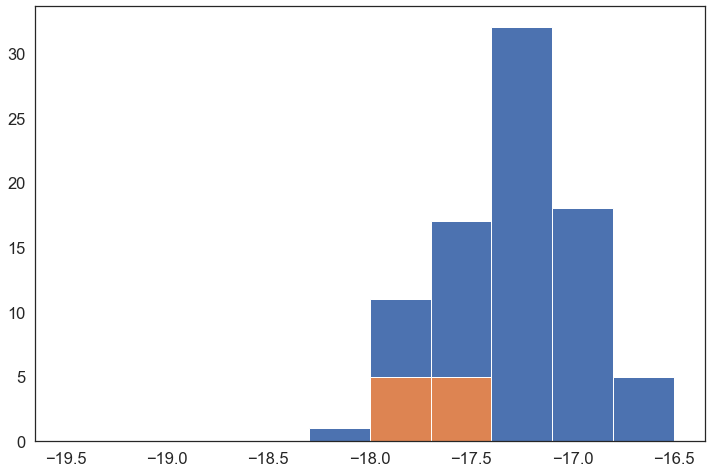

In [87]:
plt.hist(Measurements,range=[-19.5,-16.5],bins=10)
plt.hist(np.log10(Limits),range=[-19.5,-16.5])

In [88]:
PhotCat=fits.open("../Catalogs/fresco-gn_imgv7.2_photcatv1_swlw_fo_det_aper8_zphot.cat.fits")
AllnoLyaHa=[]
c= 2.99792458e+18
EWHa=[]
i=0
for gal in noLAEHaLim:
    #print(gal.ID,gal.IDFresco,(1+gal.zLya)*6564.614) # All in F444
    x=0
    for phot in PhotCat[1].data:
        if int(gal["FrescoID"])==phot["id"]:
            x=1
            ha=gal["HaFlux"][0]
            dha=gal["HaFlux"][1]

            cont=((phot["f_f444w"]*1e-32*c/((1+gal["z"])*6564.614)**2)*10676-ha)/10676
            econt=cont- (((  (phot["f_f444w"]-phot["e_f444w"])      *1e-32*c/((1+gal["z"])*6564.614)**2)*10676-ha)/10676)

            ew=ha/(cont)
            ew_rest=ew/(1+gal["z"])

            dew=ew*np.sqrt(  (dha/ha)**2 + (econt/cont)**2 )
            dew_rest=dew/(1+gal["z"])
            print(ew_rest,dew_rest) #micro Jy
            EWHa.append([ew_rest,dew_rest])
    if x==0:
        print("not found: ",gal["FrescoID"])
    noLAEHaLim[i]["EWHa"]=[ew_rest,dew_rest]
    noLAEHaLim[i]["line"]="Ha"
    noLAEHaLim[i]["HaFWHM"]=[np.nan,np.nan]
    noLAEHaLim[i]["Off"]=[np.nan,np.nan]
    noLAEHaLim[i]["zsys"]=[np.nan,np.nan]

    i=i+1

[AllnoLyaHa.append(gal) for gal in noLyaHa]
[AllnoLyaHa.append(gal) for gal in noLAEHaLim]

np.save("../Catalogs/ForMaster/noLyaHa.npy",AllnoLyaHa)

65.31180415174559 nan
311.07252555336675 nan
197.1504638135344 nan
341.5969151314426 nan
165.85624107650384 nan
nan nan
nan nan
nan nan
nan nan
162.50920377883818 nan
249.19280596851718 nan
405.113633786229 nan
738.2895100318381 nan
260.73308105351083 nan
nan nan
nan nan
nan nan


z6_GND_16819 5.308520196313142  Lya :  7666.744594579362


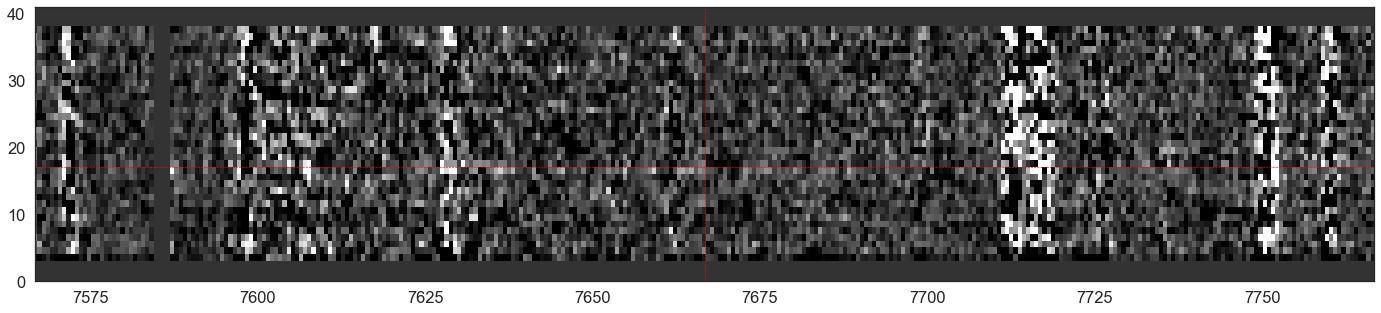

z5_GND_14430 5.242865155514095  Lya :  7586.95402349628


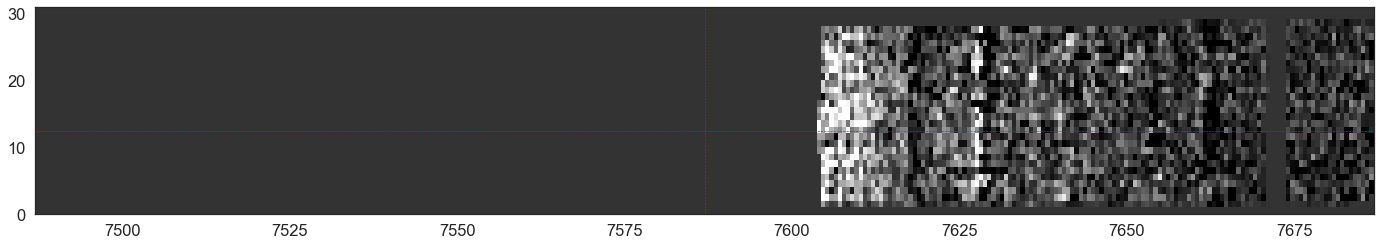

z5_GND_30190 5.175229800259391  Lya :  7504.756776255238


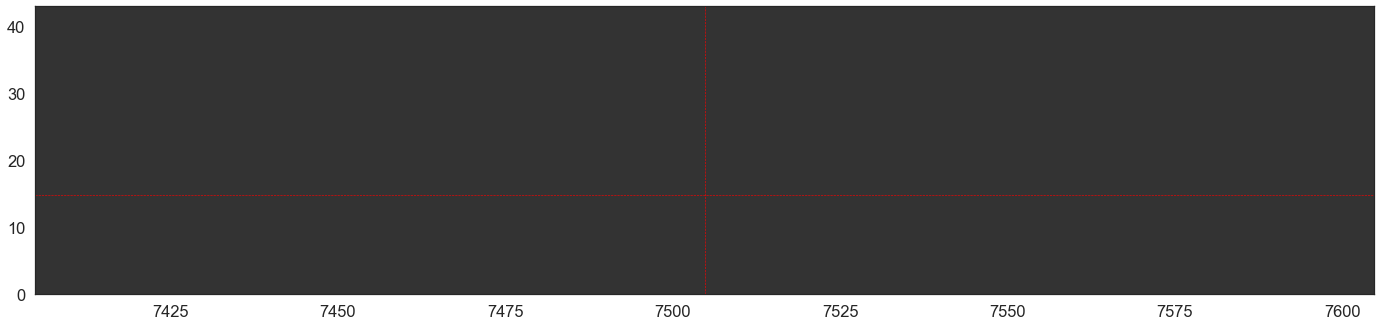

z5_GND_42418 5.19792725055883  Lya :  7532.340987604145


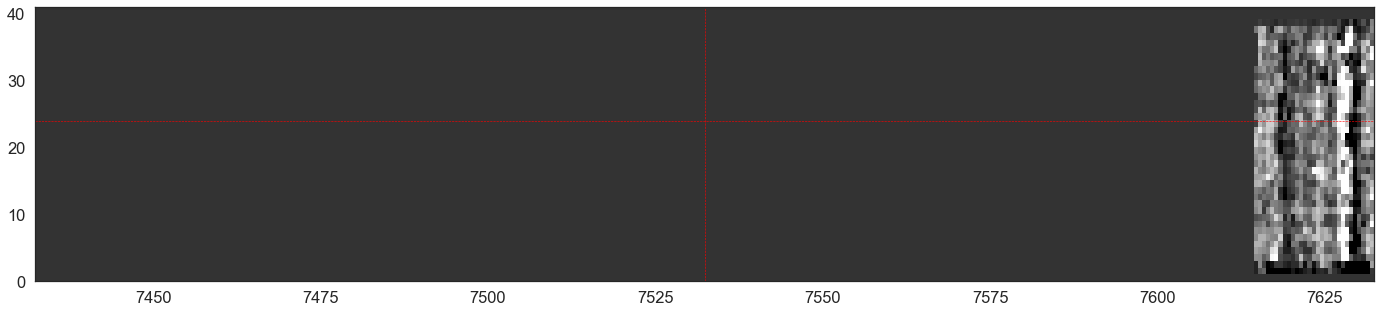

z5_GND_15562 5.426272740484056  Lya :  7809.849261510273


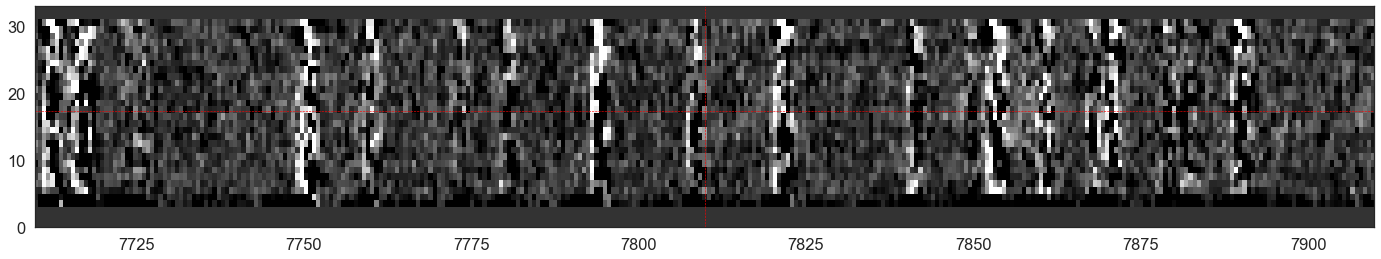

z6_GND_25736 5.331522310374989  Lya :  7694.699063798725


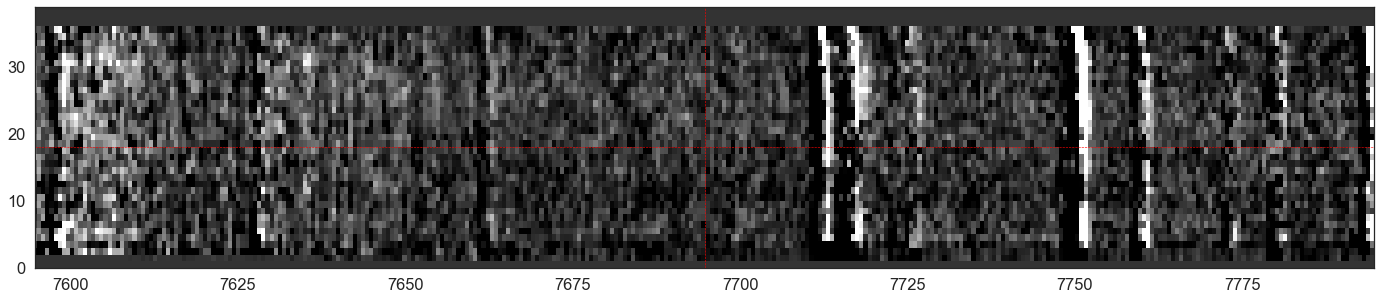

z6_GND_25400 5.652333252191219  Lya :  8084.580601387987


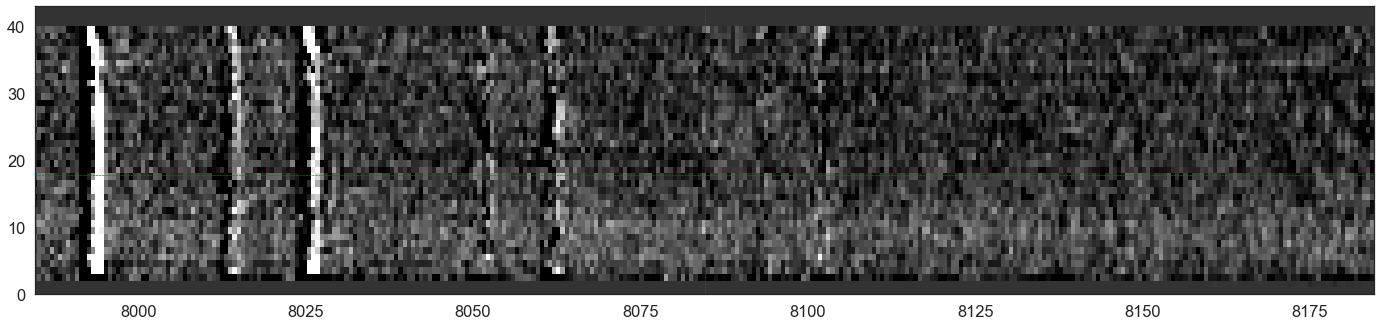

z6_GND_3649 5.78135835557125  Lya :  8241.38480952574


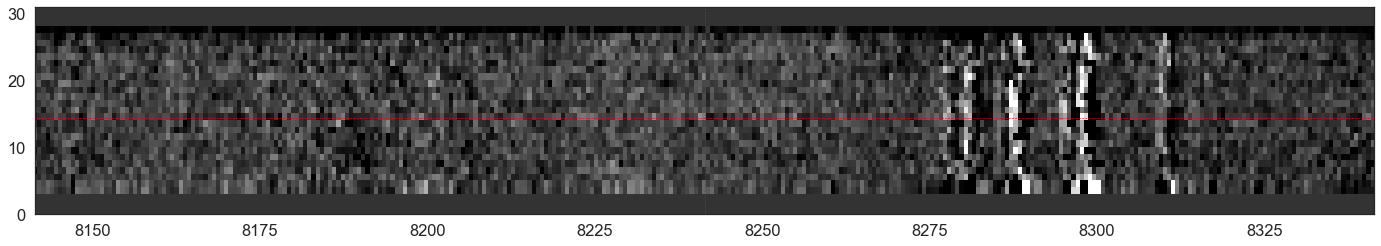

z5_GND_32273 5.308367864431938  Lya :  7666.559465644134


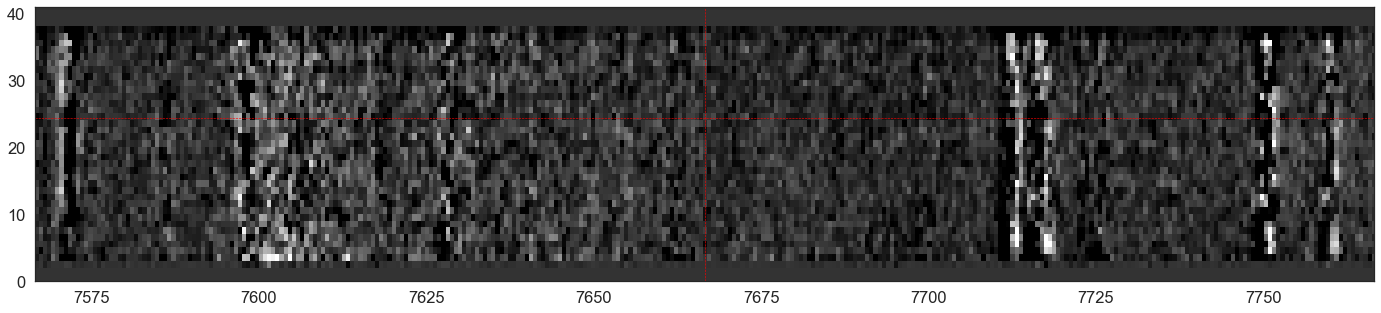

z6_GND_25195 5.363664337309094  Lya :  7733.761269131742


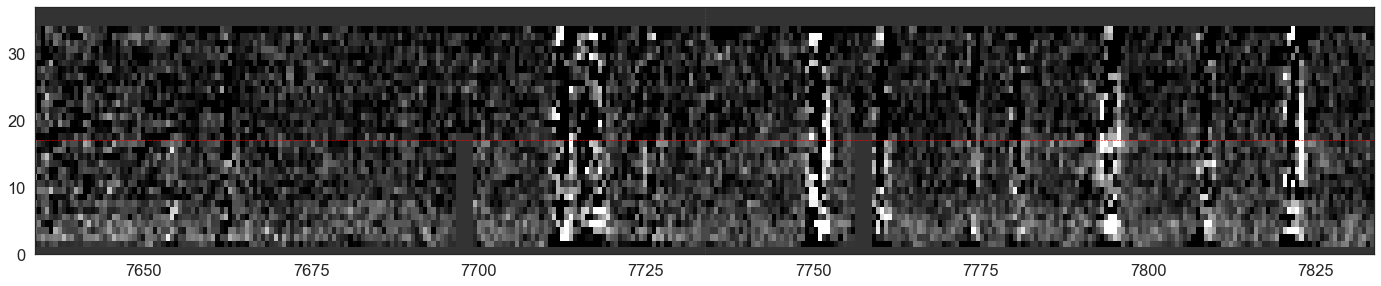

z6_GND_27453 5.611965303672083  Lya :  8035.521433552682


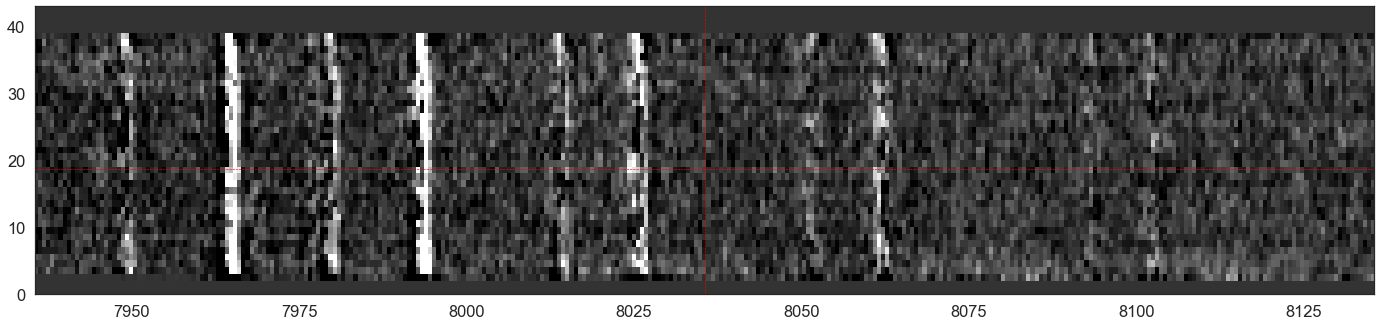

z6_GND_19665 5.180256752339132  Lya :  7510.866031117747


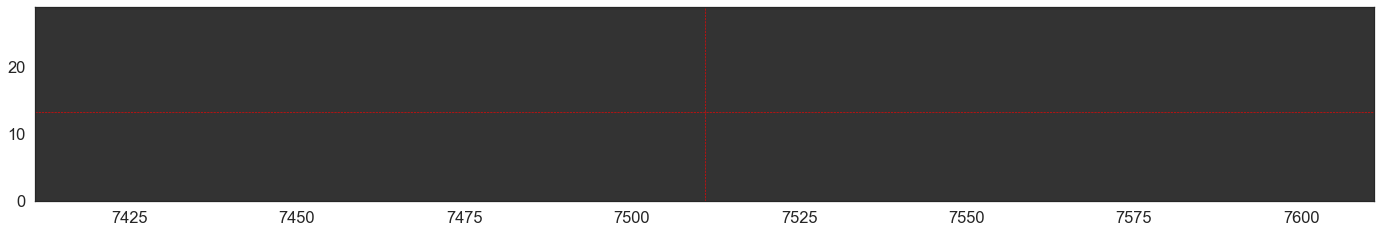

z6_GND_11494 5.778464049828368  Lya :  8237.867359756416


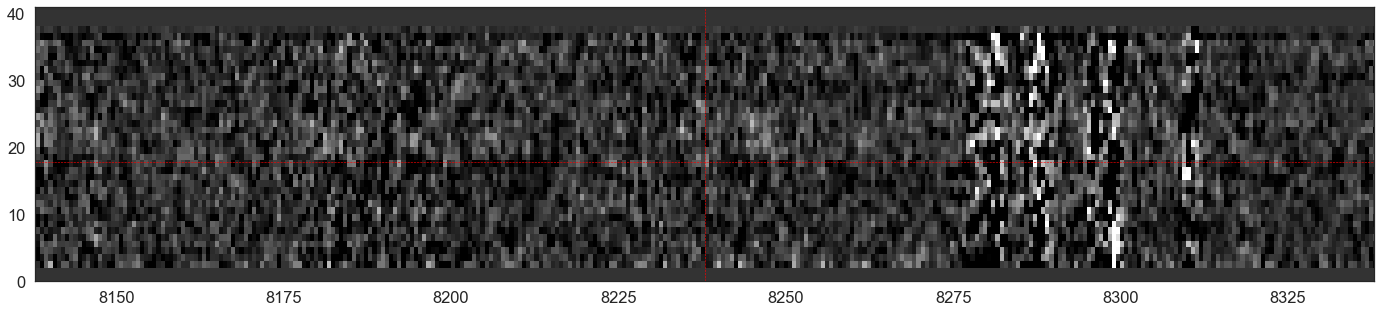

z6_GND_8934 5.968726569452523  Lya :  8469.09339985565


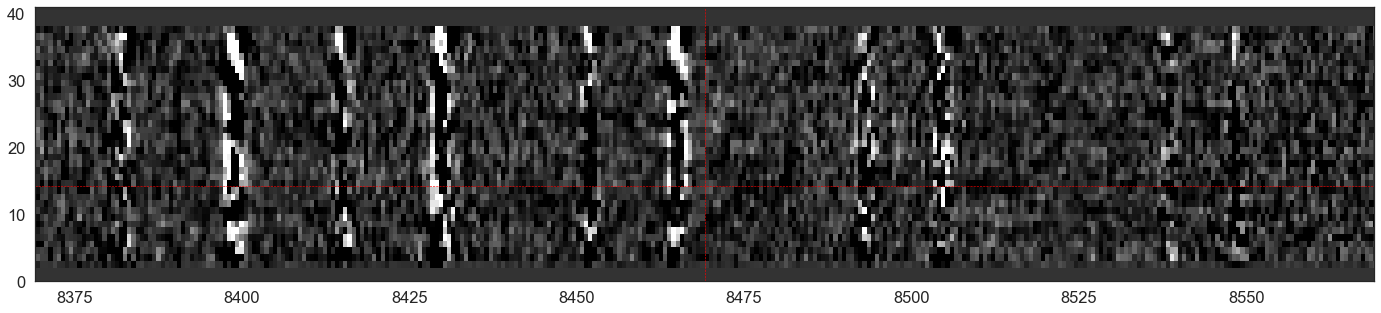

z5_GND_10574 5.303950239877014  Lya :  7661.1907265225345


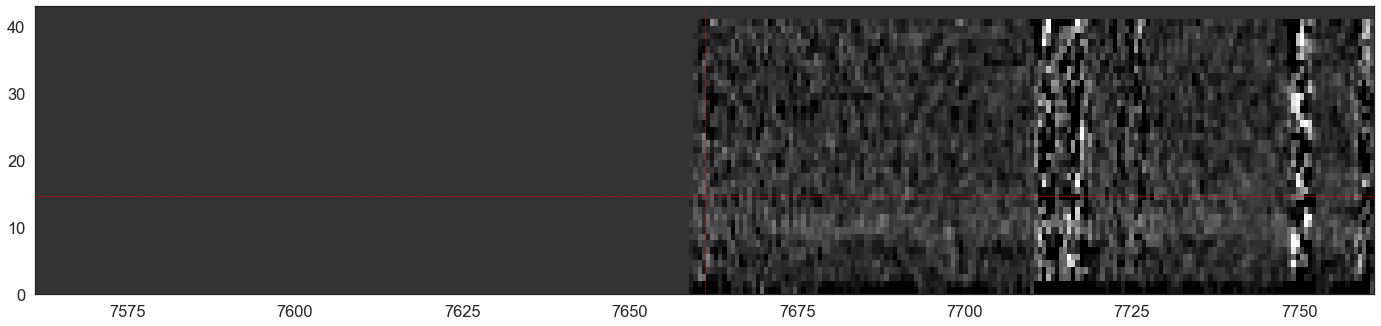

z6_GND_10131 5.187721014518143  Lya :  7519.9373489438985


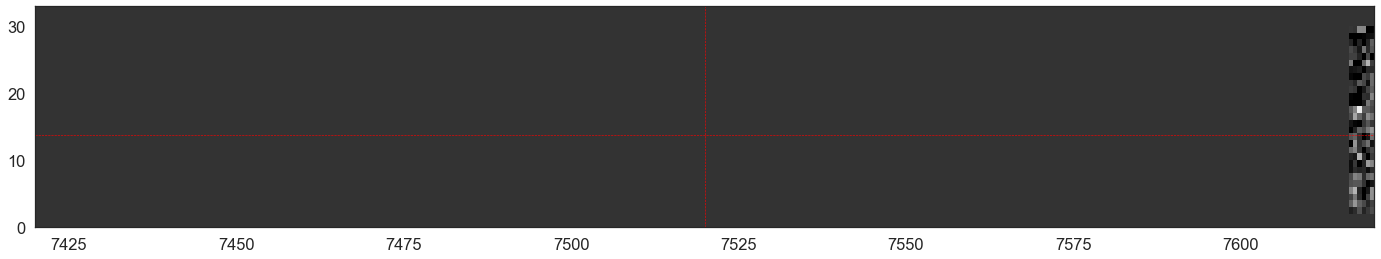

z6_GND_41463 5.659340518726616  Lya :  8093.0965324084555


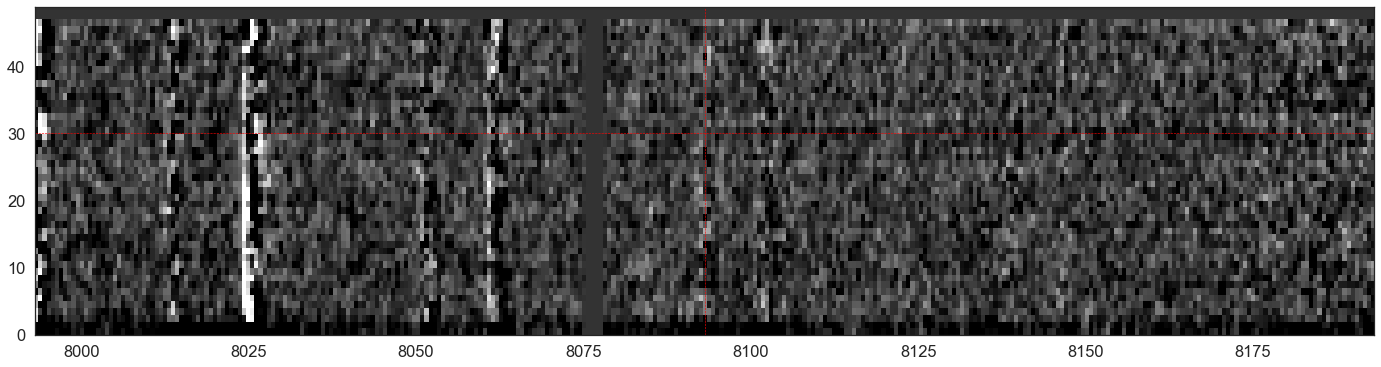

z6_GND_36607 5.603891713968255  Lya :  8025.70959998562


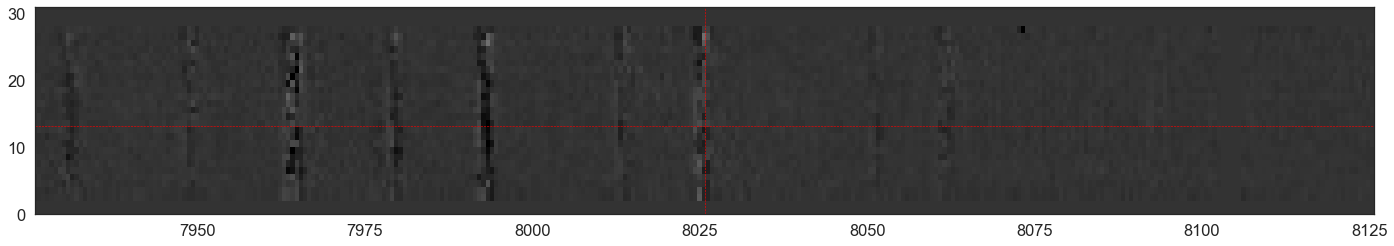

z6_GND_28182 5.984721416978973  Lya :  8488.531938054544


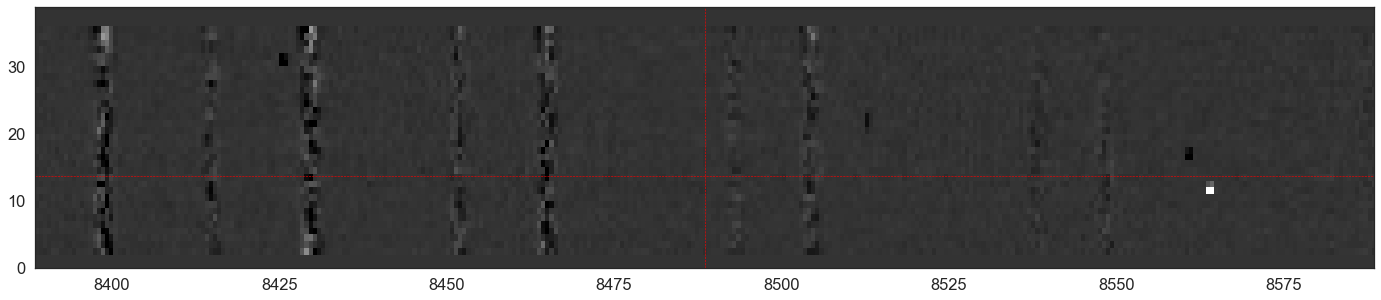

z6_GND_20167 5.024725901629555  Lya :  7321.849388250398


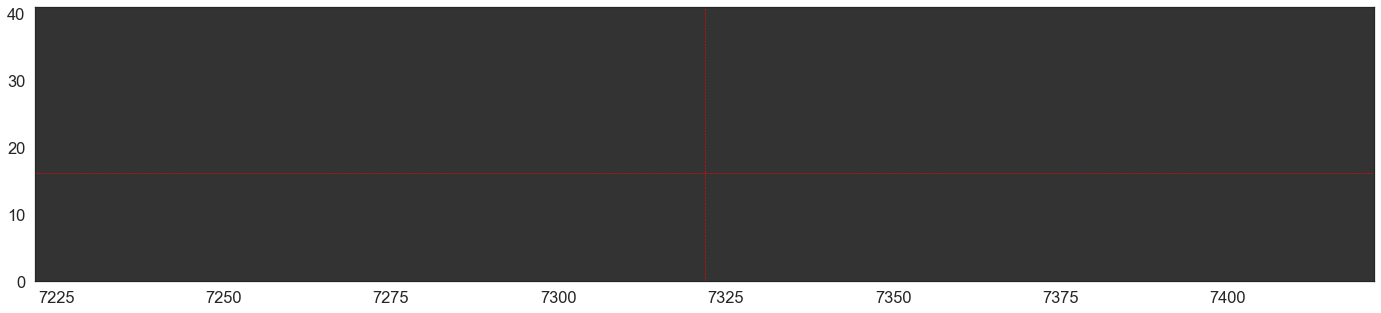

z6_GND_22665 5.299380283440885  Lya :  7655.6368584657075


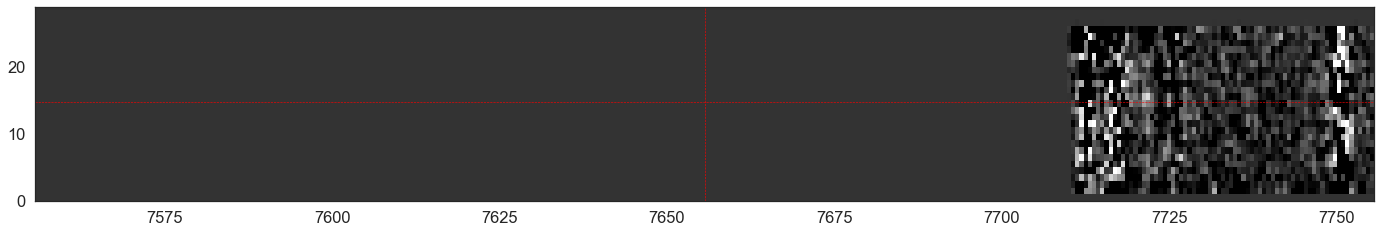

z6_GND_22789 5.450645841476742  Lya :  7839.469891146685


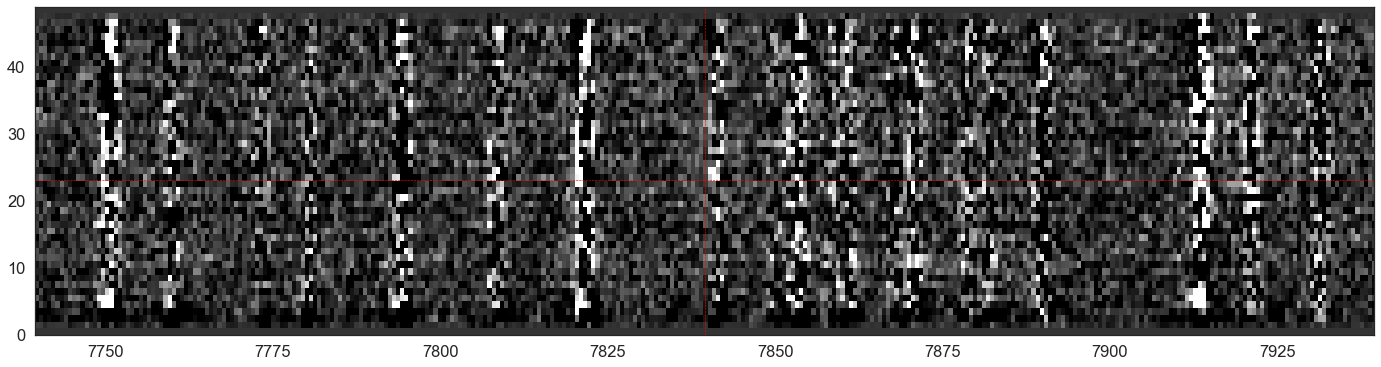

z7_GND_22525 6.7853712652291565  Lya :  7218.362313458187


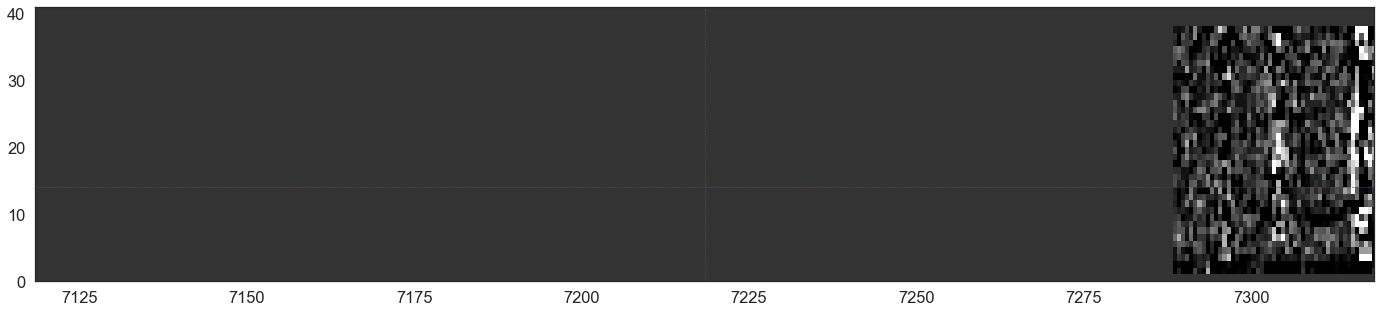

z7_GND_34860 7.031765257209171  Lya :  7446.811419529009


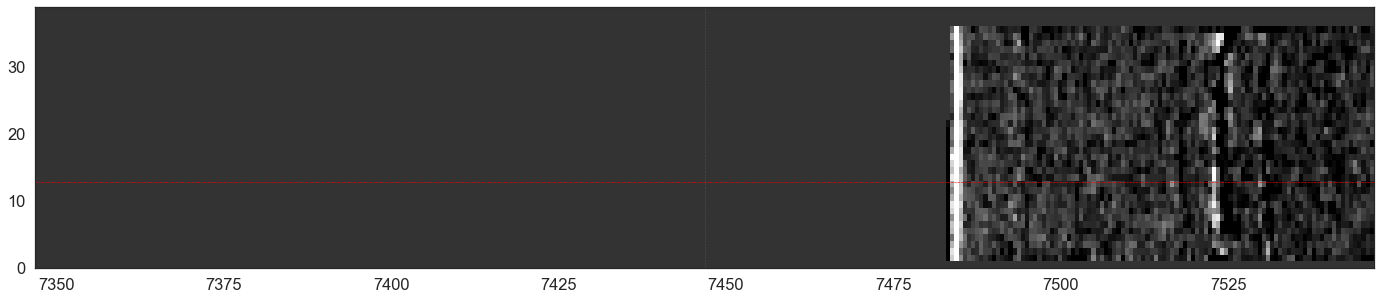

z7_GND_34730 6.557946285950705  Lya :  9185.172121315893


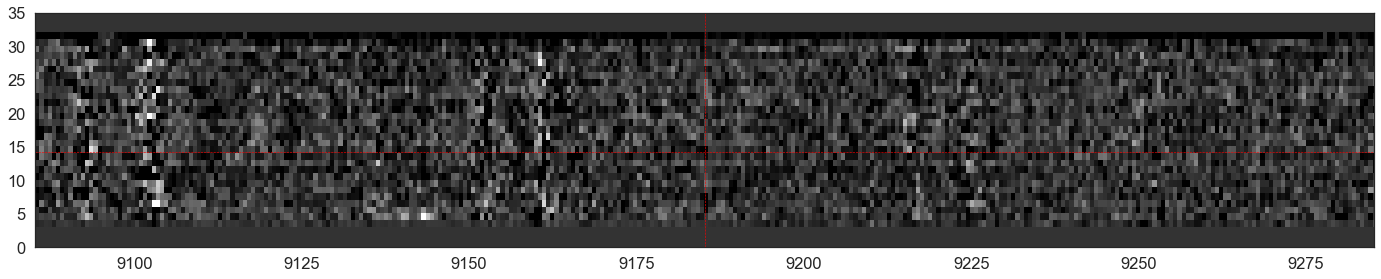

z5_GND_13996 6.016863443913078  Lya :  8527.594143387563


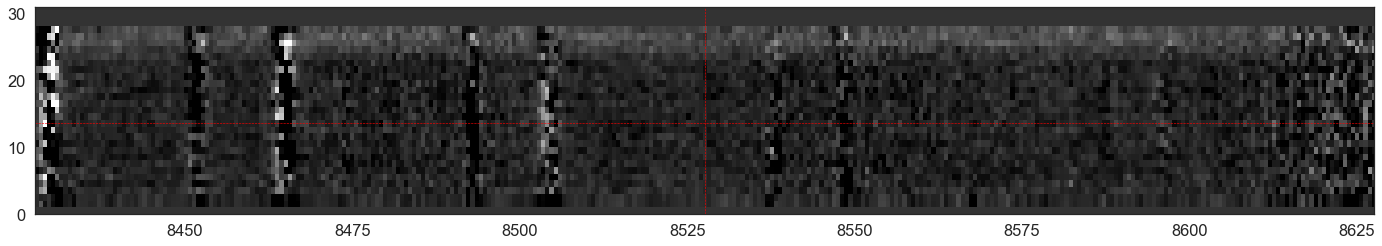

z6_GND_7095 6.564648888723694  Lya :  9193.317794465906


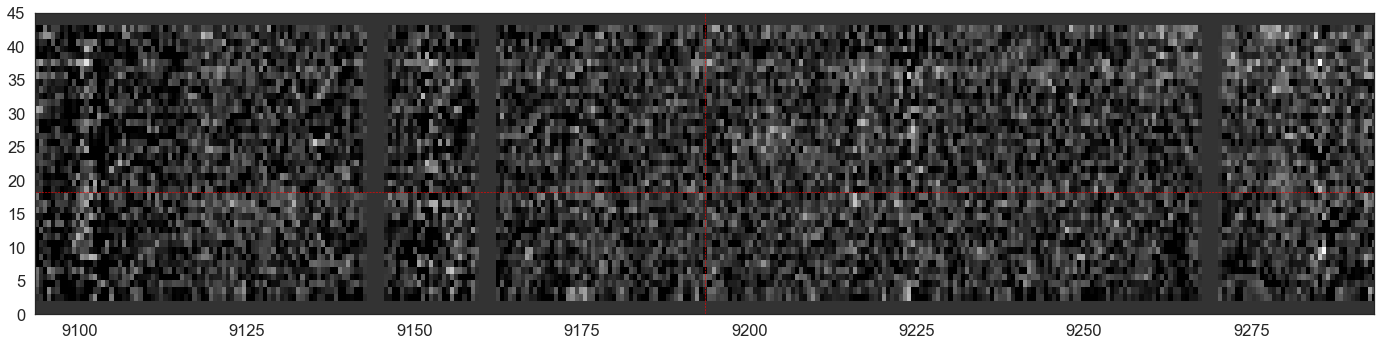

z7_GND_41647 6.56876184951621  Lya :  9198.31627571705


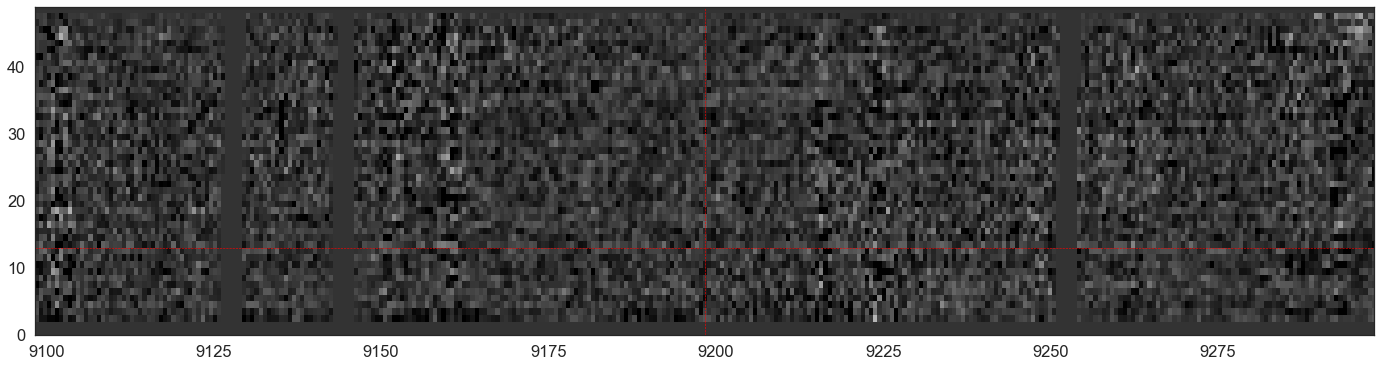

z7_GND_15642 4.921292554291845  Lya :  7196.146841230879


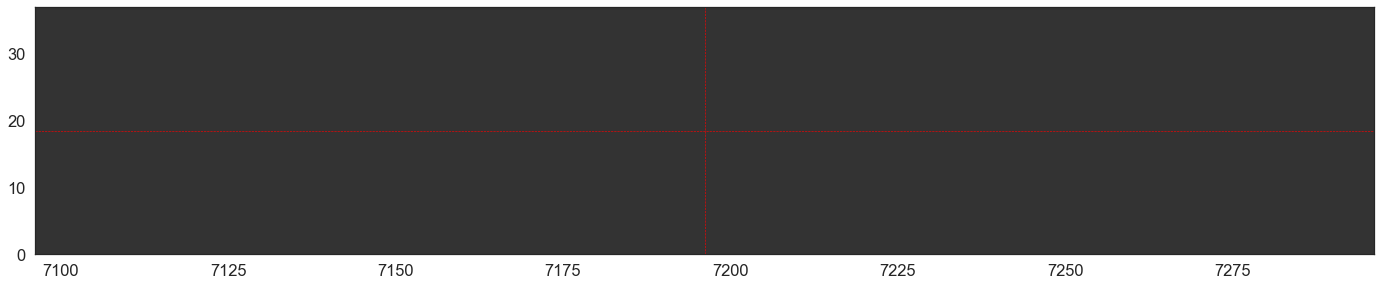

z6_GNW_8973 5.313242484630475  Lya :  7672.483591571416


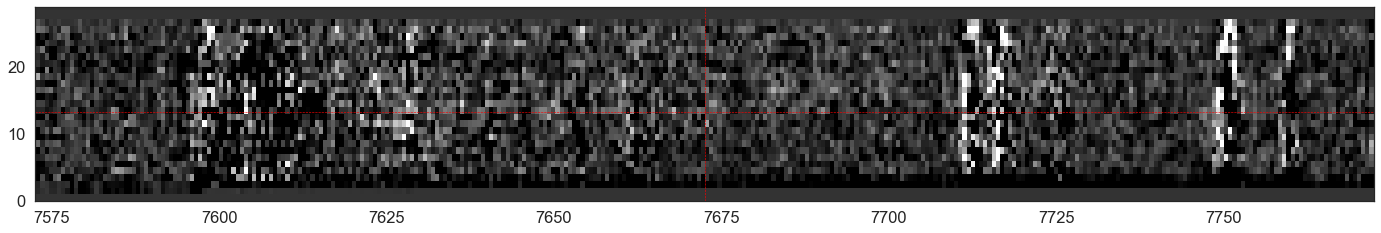

z5_GNW_13431 5.164261904812682  Lya :  7491.427492918852


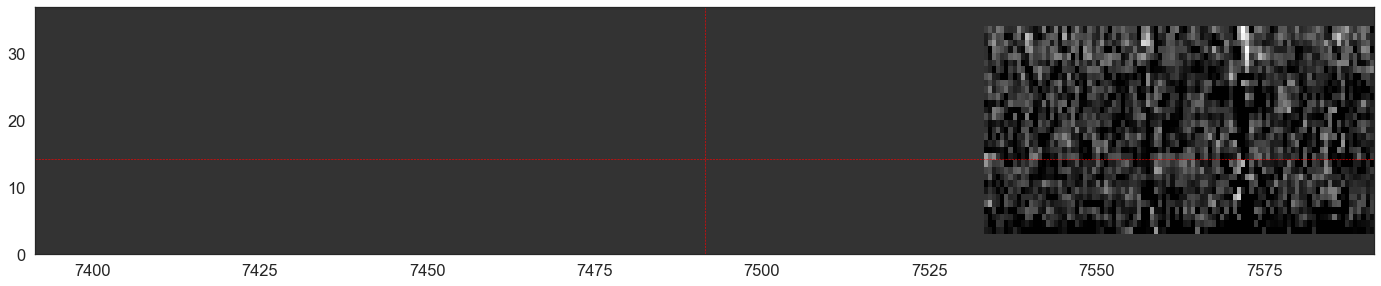

z5_GND_45250 5.147505397880211  Lya :  7471.063310043821


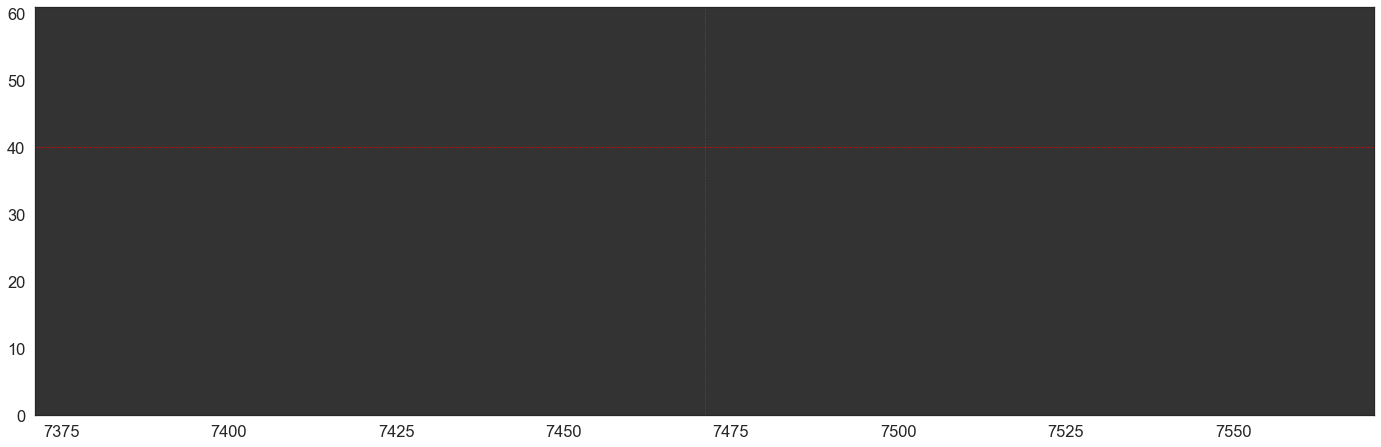

z5_GND_32576 5.223823670363559  Lya :  7563.812906592832


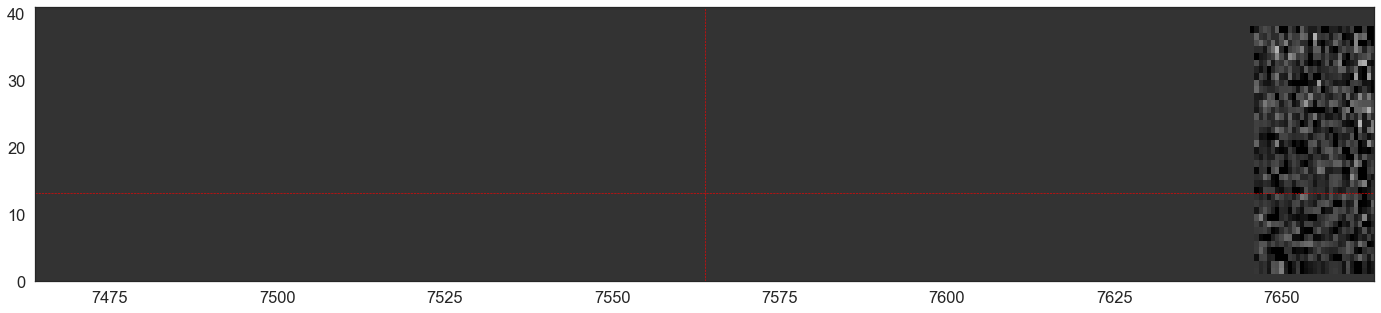

z5_GND_28421 5.200821556301712  Lya :  7535.85843737347


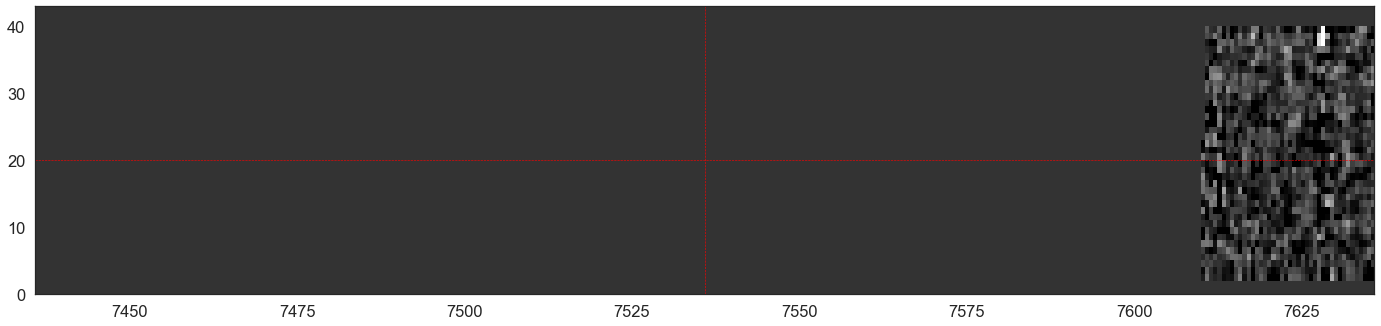

z5_GND_24948 5.189092001448981  Lya :  7521.603509360946


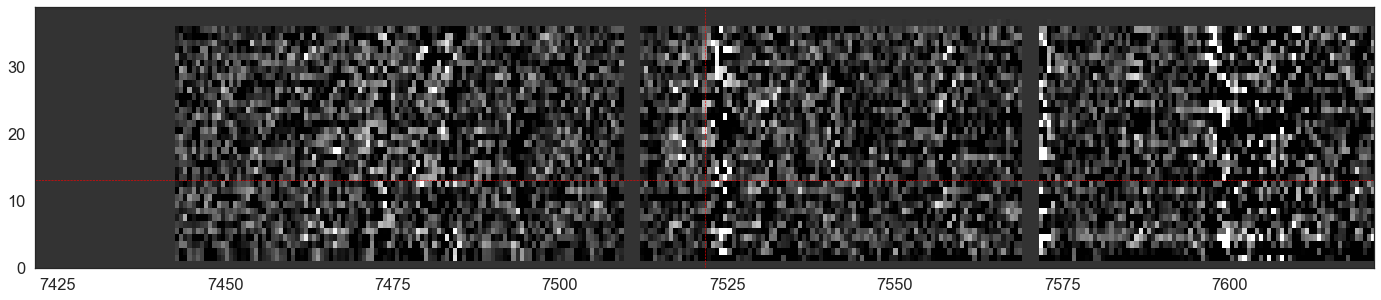

z5_GND_28981 5.226108648581623  Lya :  7566.589840621246


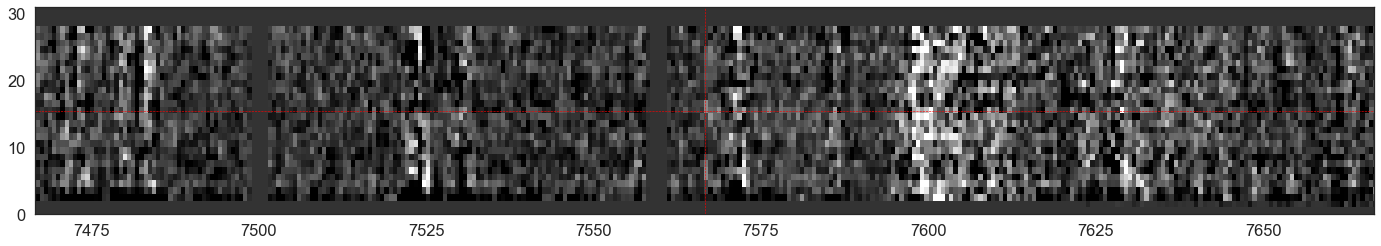

z5_GND_18617 5.315527462848539  Lya :  7675.26052559983


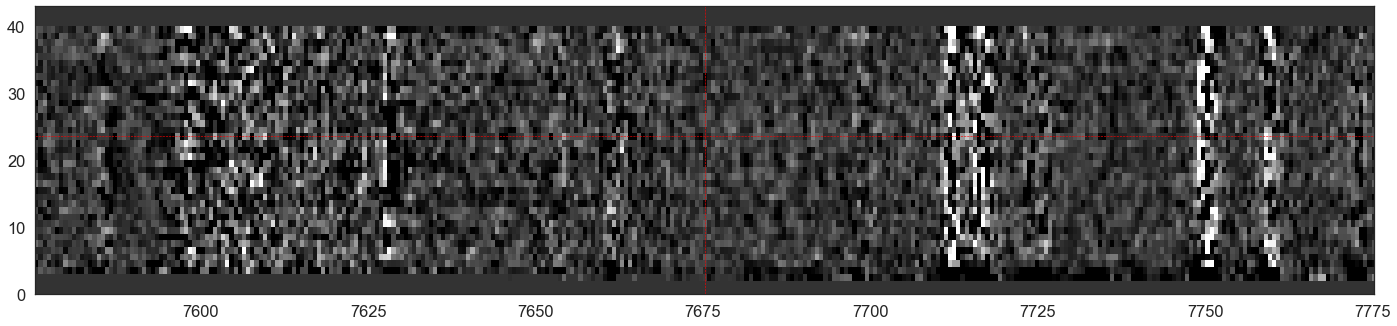

z5_GND_20890 5.226870307987644  Lya :  7567.515485297384


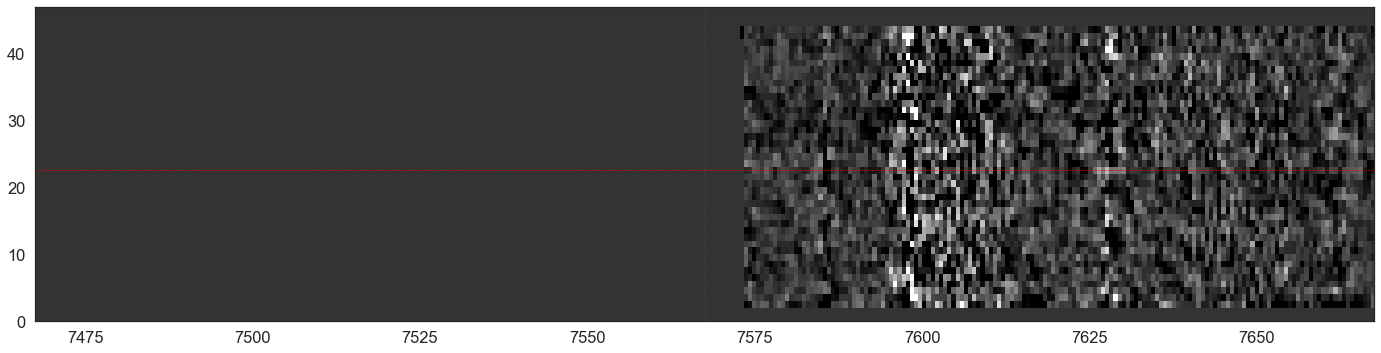

z5_GND_16389 5.226108648581623  Lya :  7566.589840621246


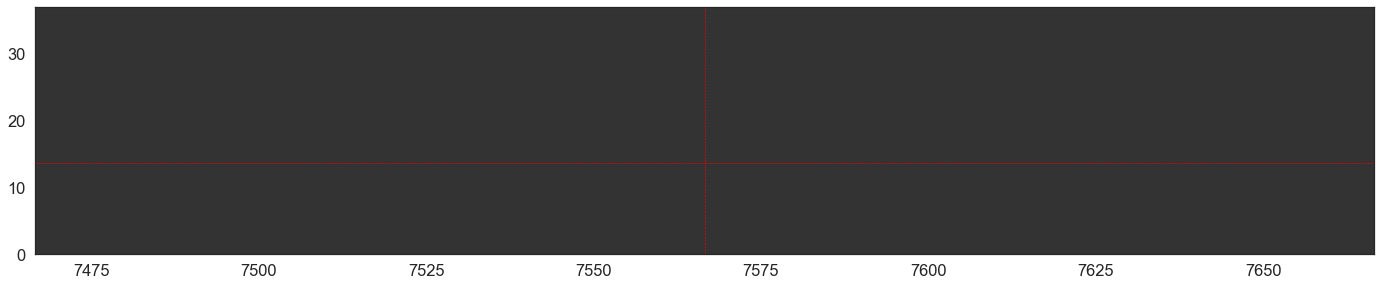

z5_GND_15025 5.191681643429454  Lya :  7524.750701259814


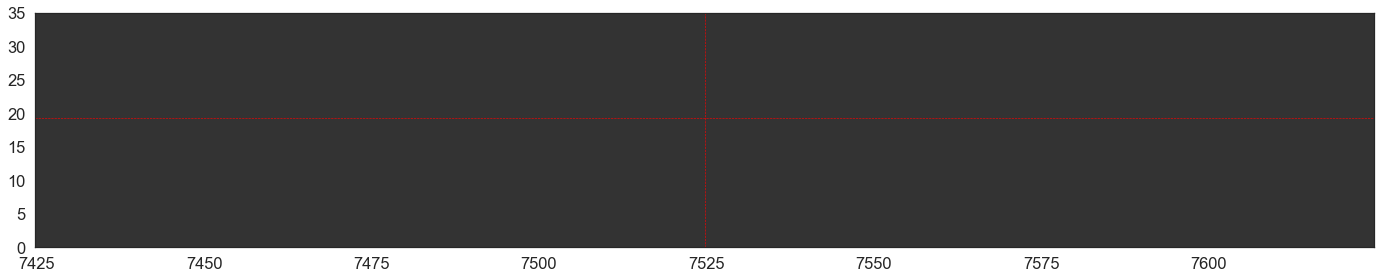

z6_GND_13524 5.198536578083647  Lya :  7533.081503345056


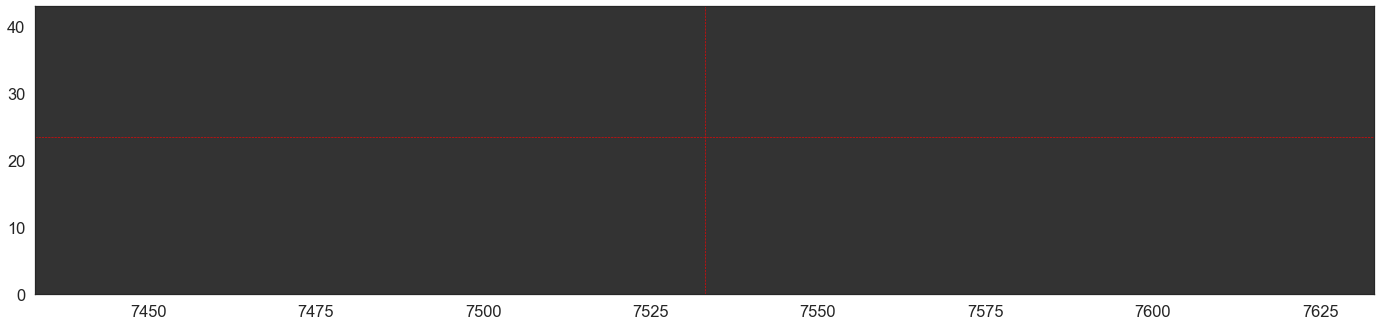

z5_GND_14131 5.196251599865583  Lya :  7530.304569316643


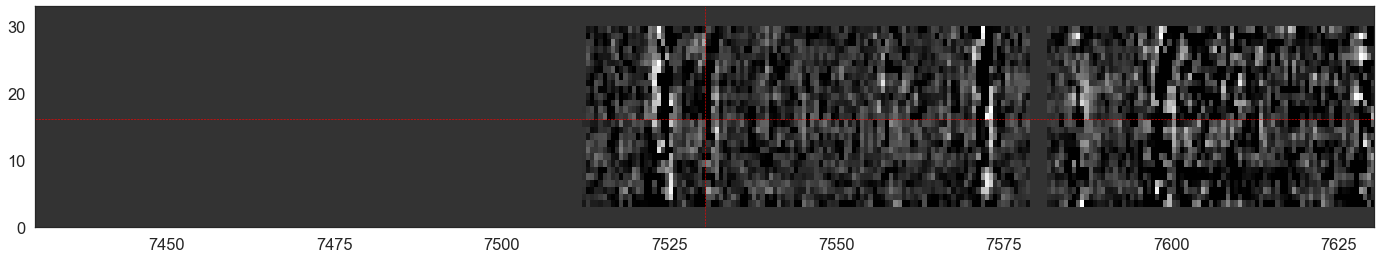

z5_GND_14554 5.301208266015337  Lya :  7657.858405688438


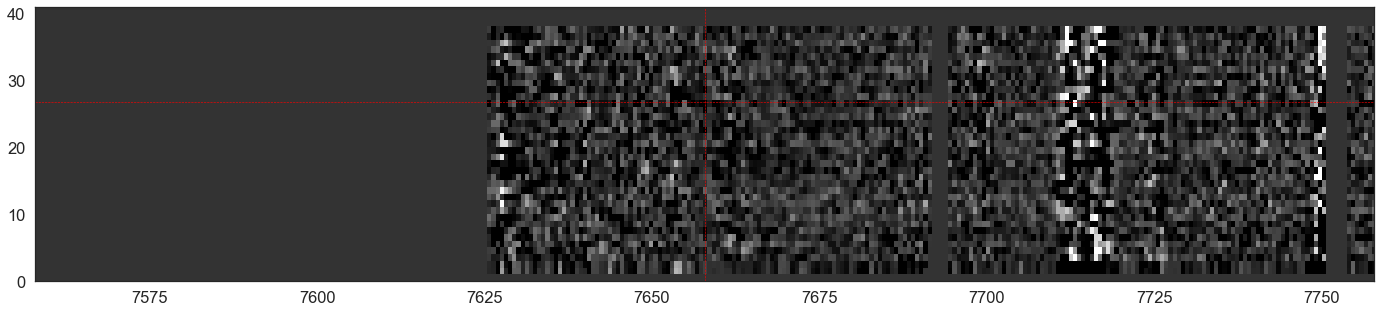

z5_GND_11088 5.189396665211389  Lya :  7521.973767231401


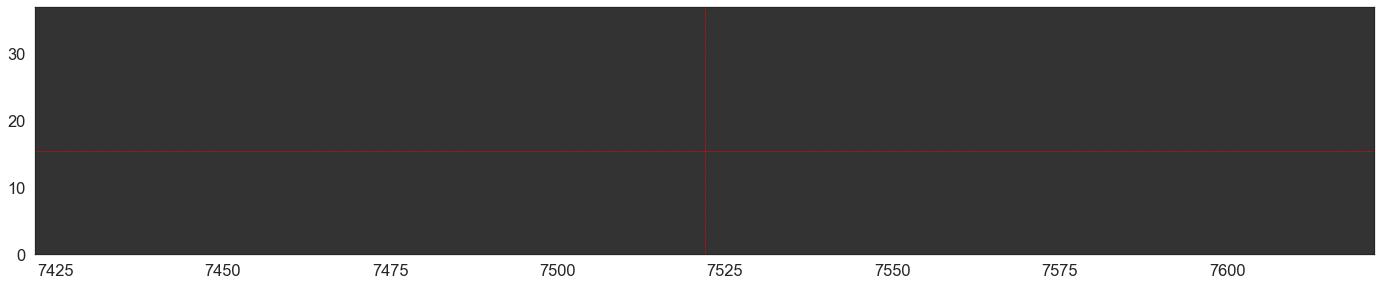

z5_GND_40815 5.182541730557197  Lya :  7513.64296514616


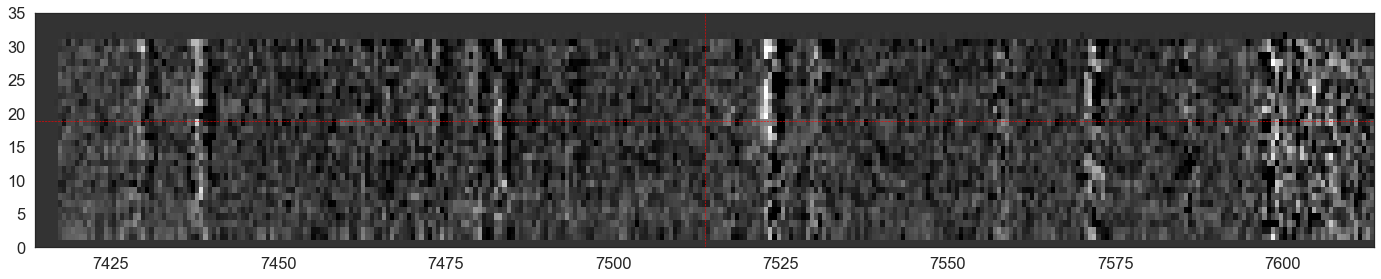

z5_GND_37378 5.2215386921454945  Lya :  7561.035972564419


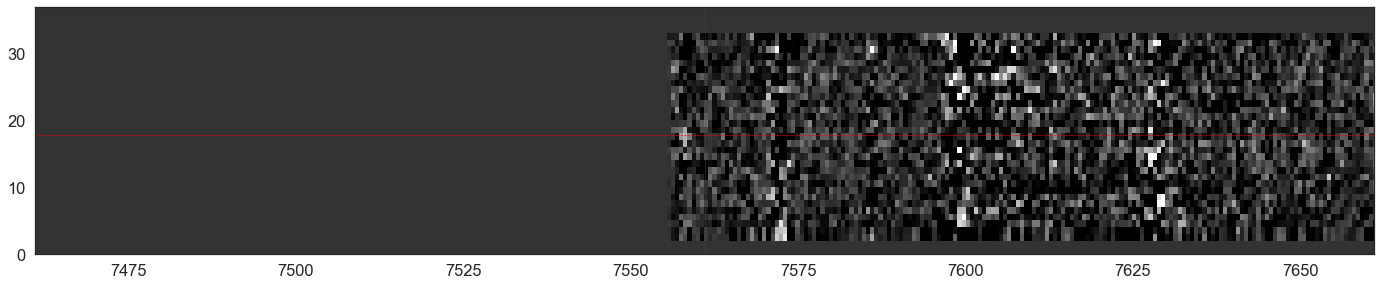

z5_GND_39635 5.187111686993325  Lya :  7519.196833202987


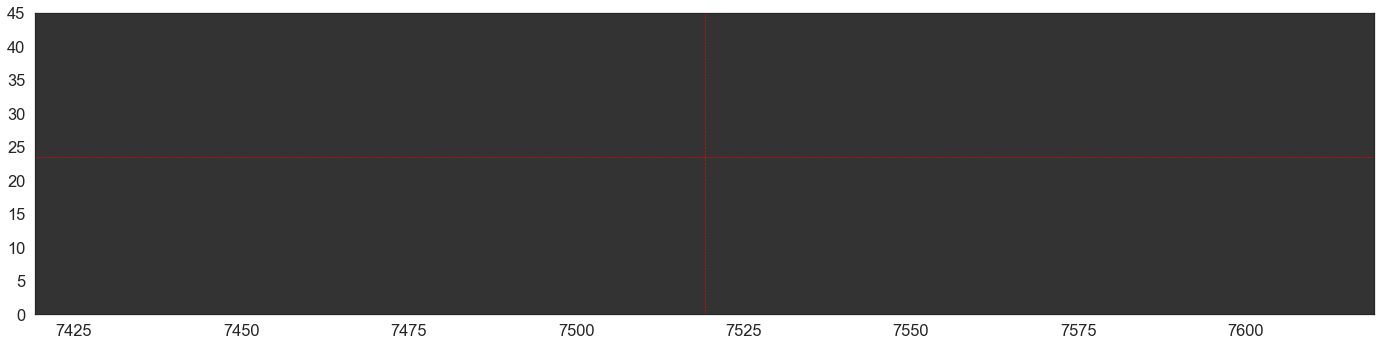

z5_GND_40117 5.180256752339132  Lya :  7510.866031117747


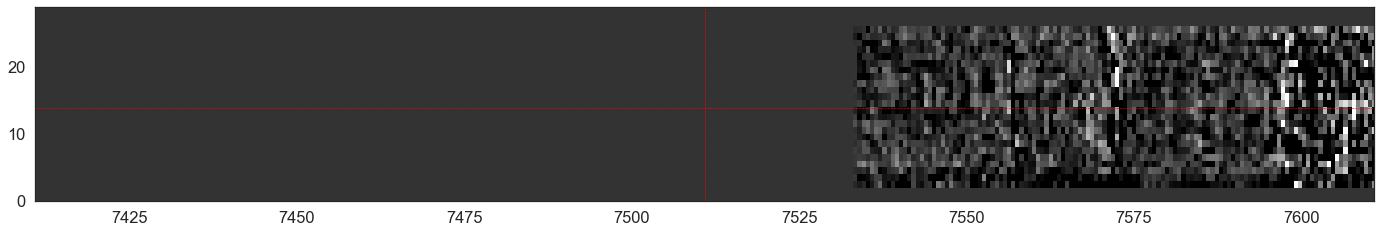

z5_GND_35084 5.047575683810199  Lya :  7349.618728534534


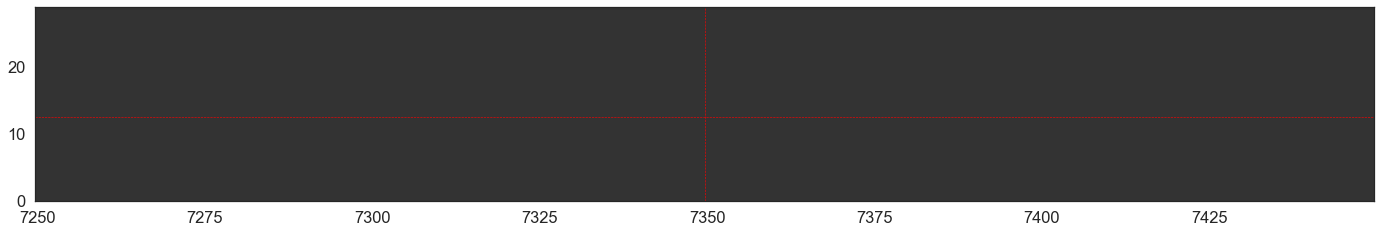

z5_GND_34379 5.226870307987644  Lya :  7567.515485297384


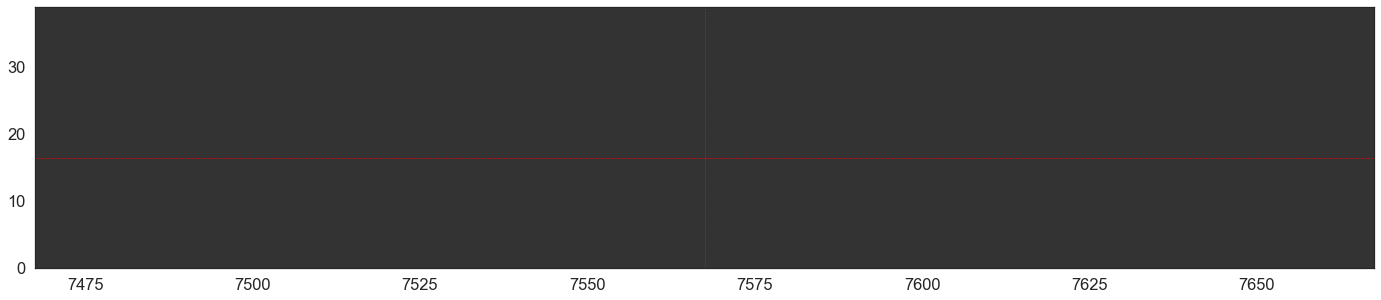

z5_GND_33500 5.230678605017752  Lya :  7572.143708678073


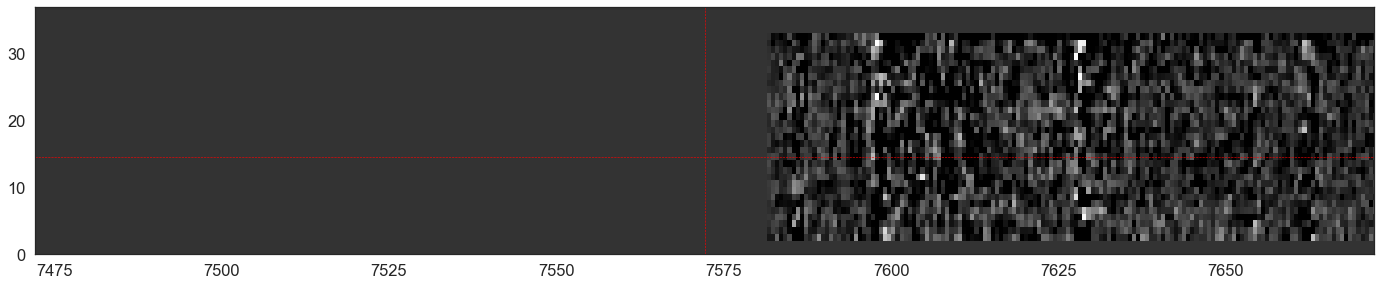

z5_GND_34594 5.189396665211389  Lya :  7521.973767231401


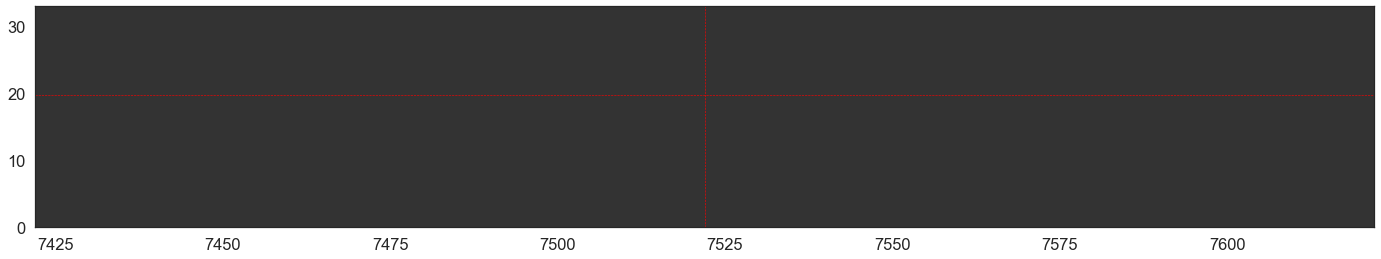

z5_GND_26806 5.1922909709542715  Lya :  7525.491217000726


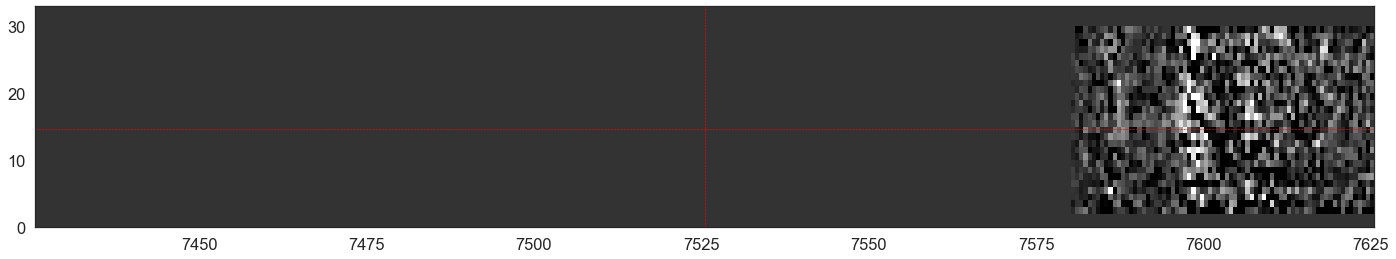

z5_GND_27870 5.216968735709366  Lya :  7555.482104507592


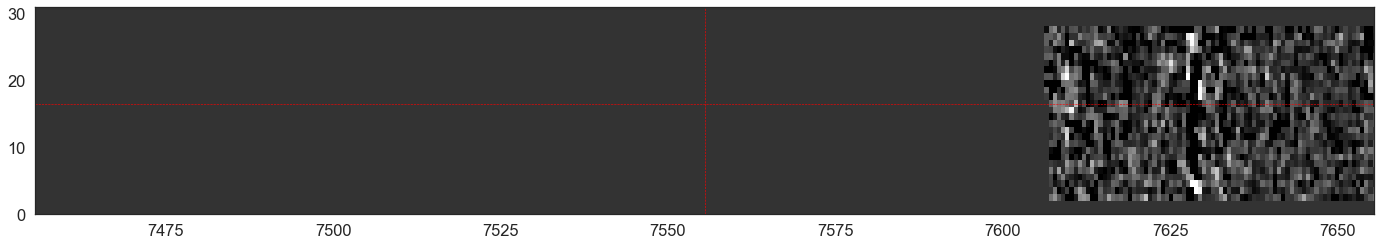

z5_GND_18697 5.184826708775261  Lya :  7516.419899174574


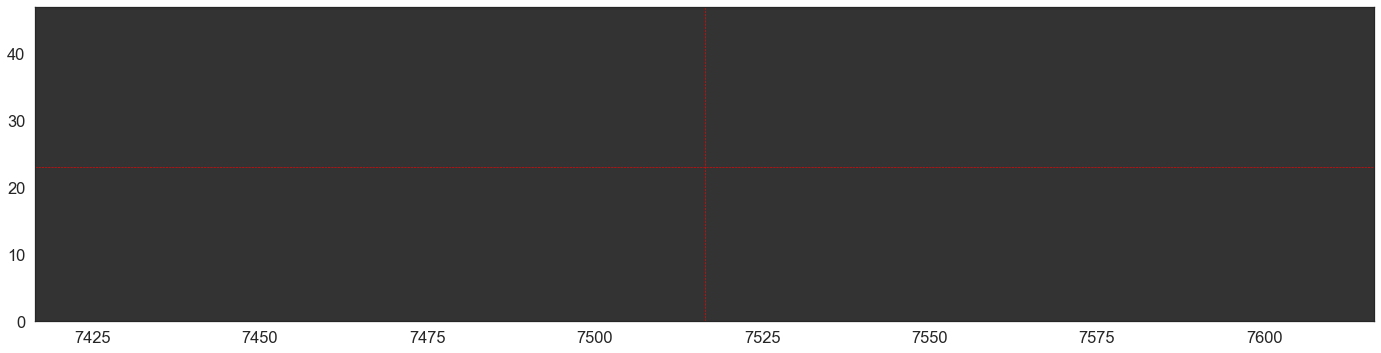

z5_GND_16018 5.012996346776825  Lya :  7307.594460237876


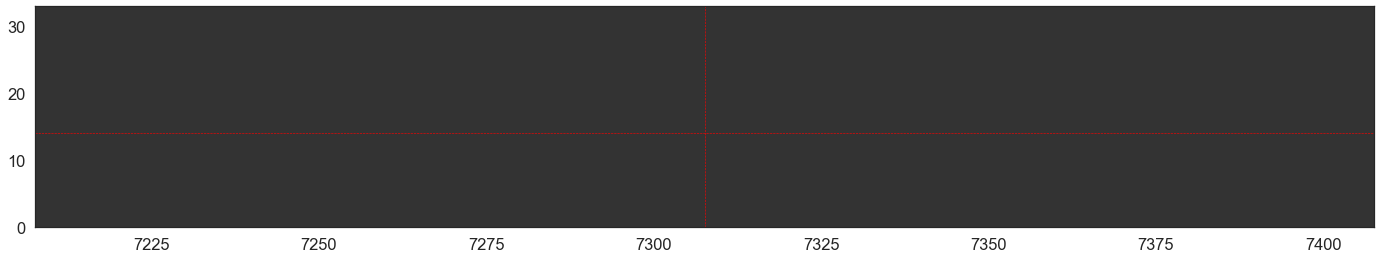

z5_GND_12659 5.196251599865583  Lya :  7530.304569316643


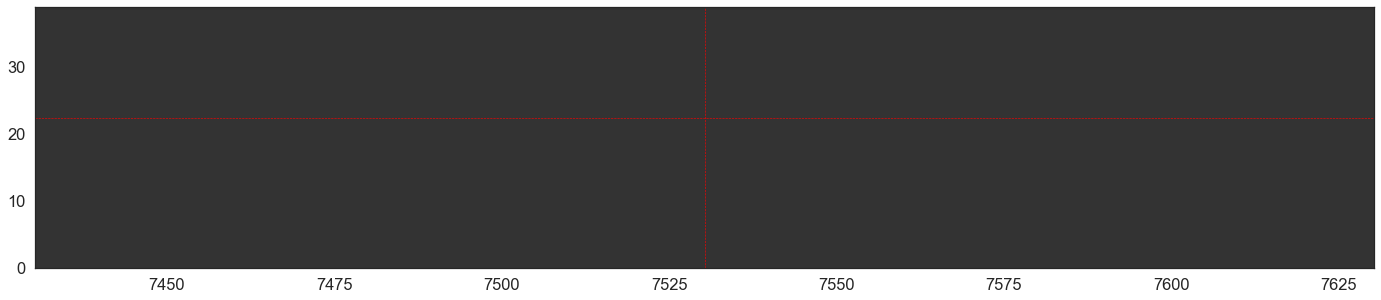

z5_GND_11789 5.193966621647519  Lya :  7527.527635288229


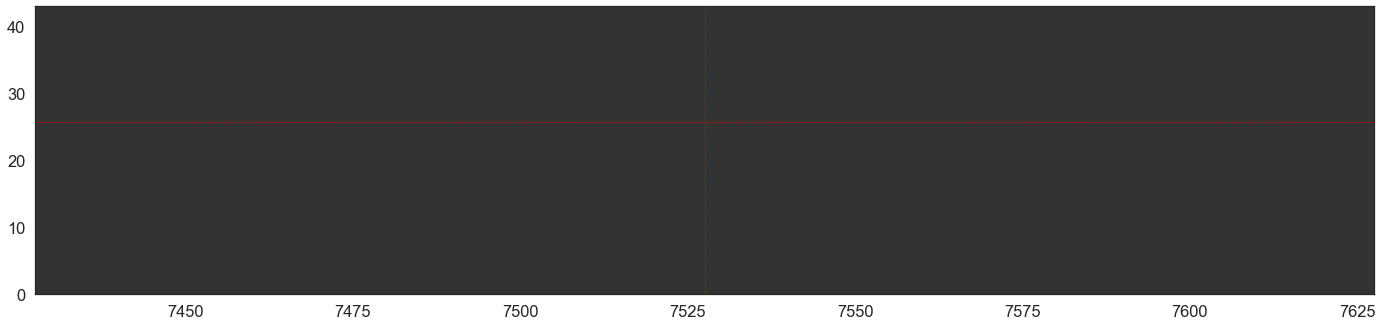

z5_GND_12705 5.193966621647519  Lya :  7527.527635288229


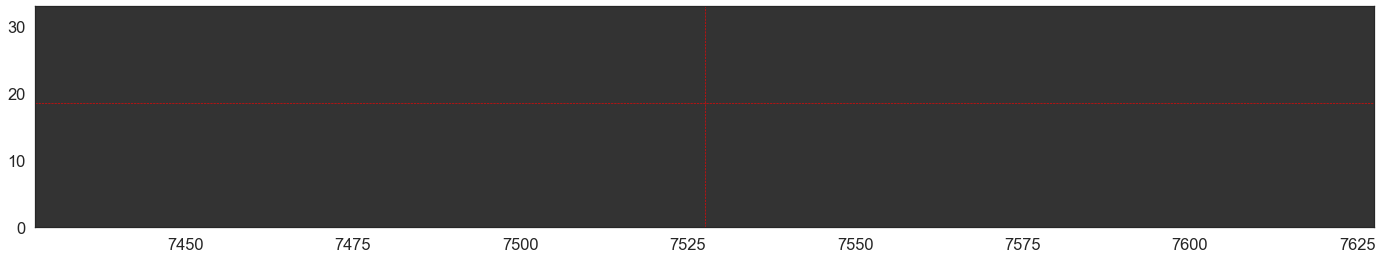

z5_GND_12062 5.017566303212954  Lya :  7313.148328294703


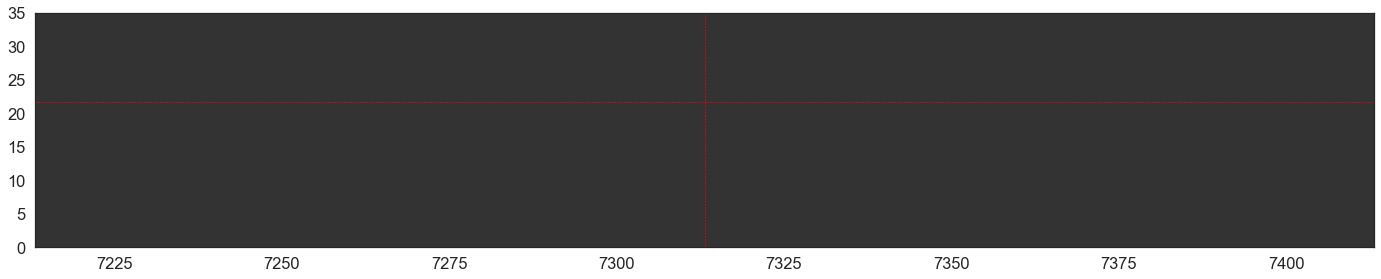

z5_GND_44836 5.184522045012852  Lya :  7516.049641304119


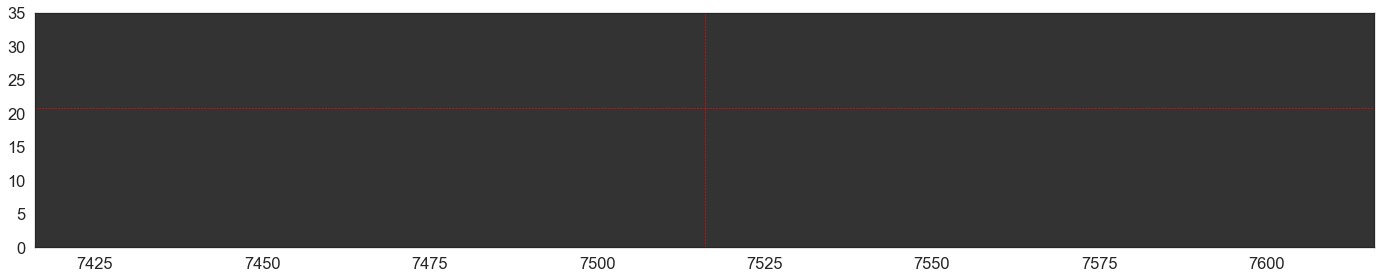

z5_GND_8641 5.193966621647519  Lya :  7527.527635288229


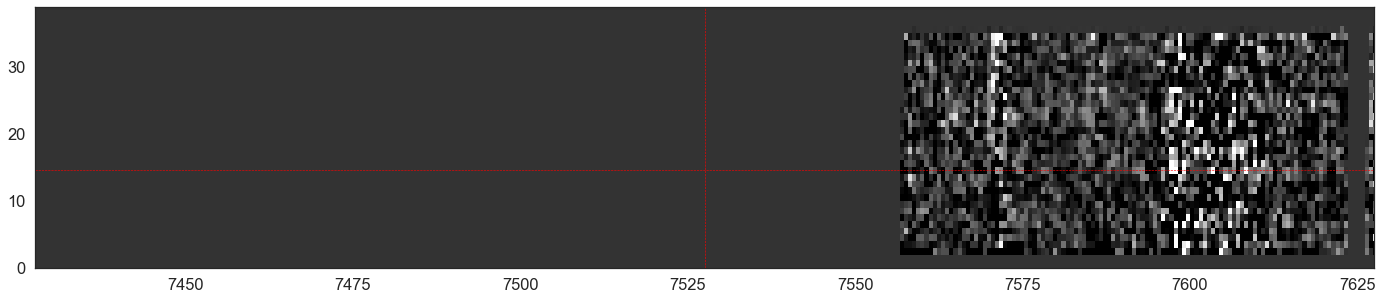

z5_GND_44411 5.274854850566995  Lya :  7625.831099894069


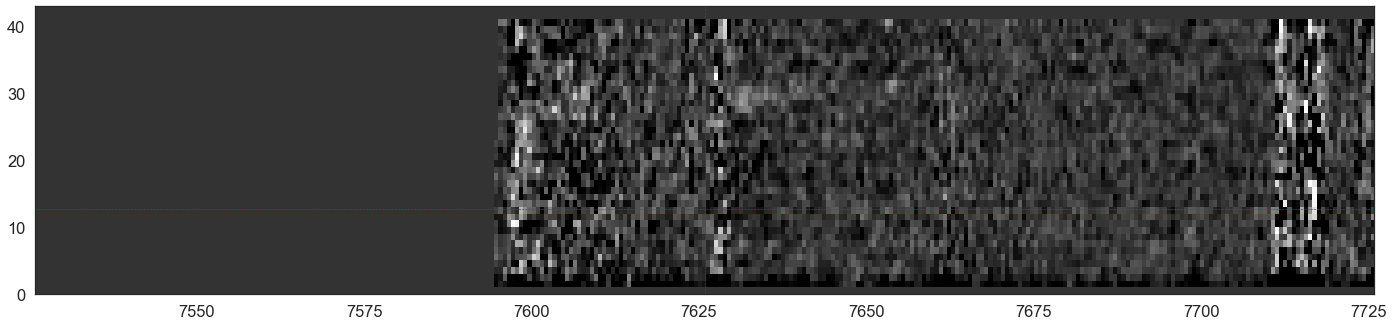

z5_GND_6005 6.190064792842352  Lya :  8738.085742741312


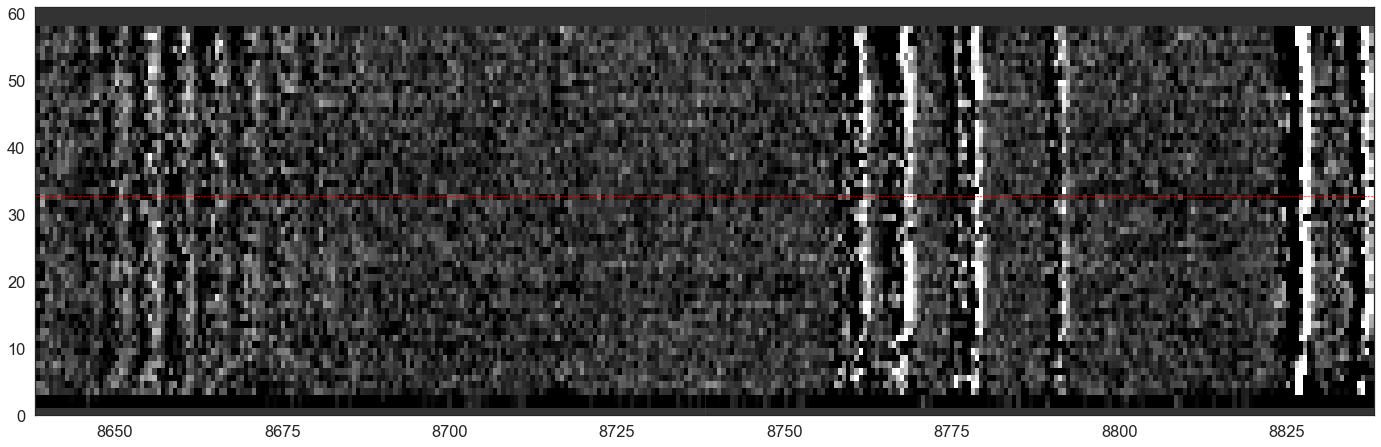

z5_GND_42189 5.196251599865583  Lya :  7530.304569316643


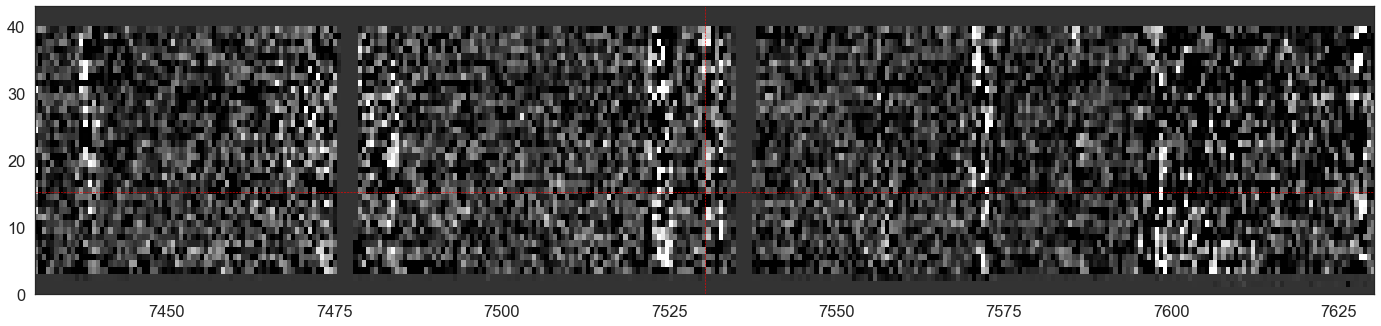

z5_GND_32925 5.184217381250444  Lya :  7515.679383433664


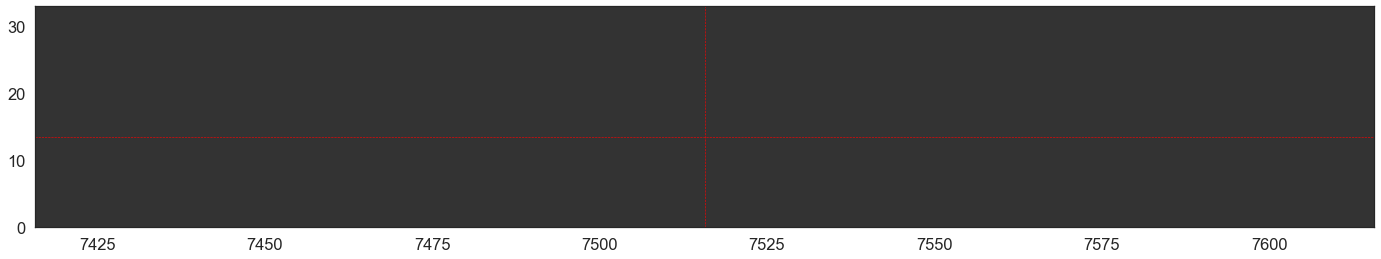

z5_GND_29527 5.033256486976995  Lya :  7332.216608623142


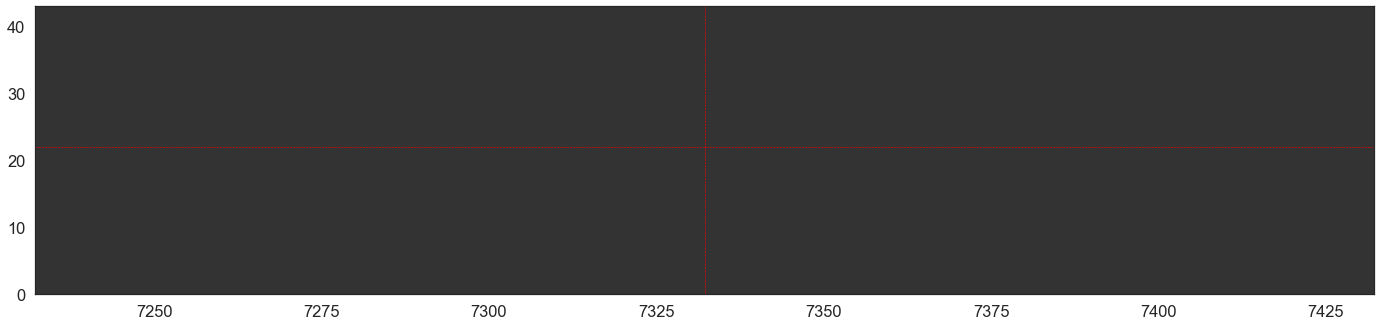

z5_GND_27366 5.179190429170703  Lya :  7509.570128571155


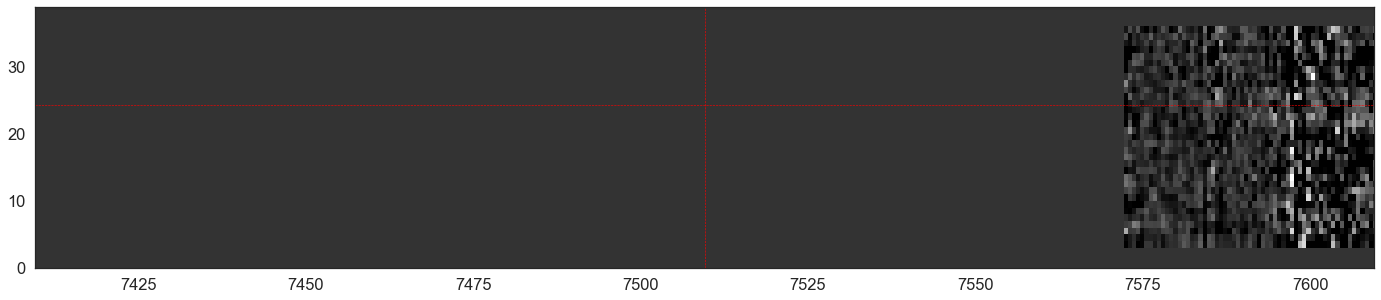

z5_GND_26558 5.184217381250444  Lya :  7515.679383433664


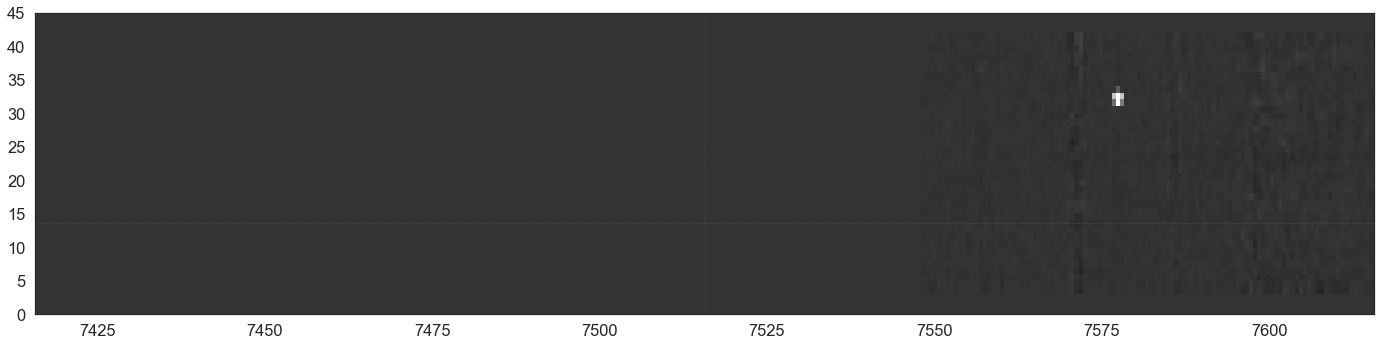

z5_GND_25578 5.294810327004757  Lya :  7650.0829904088805


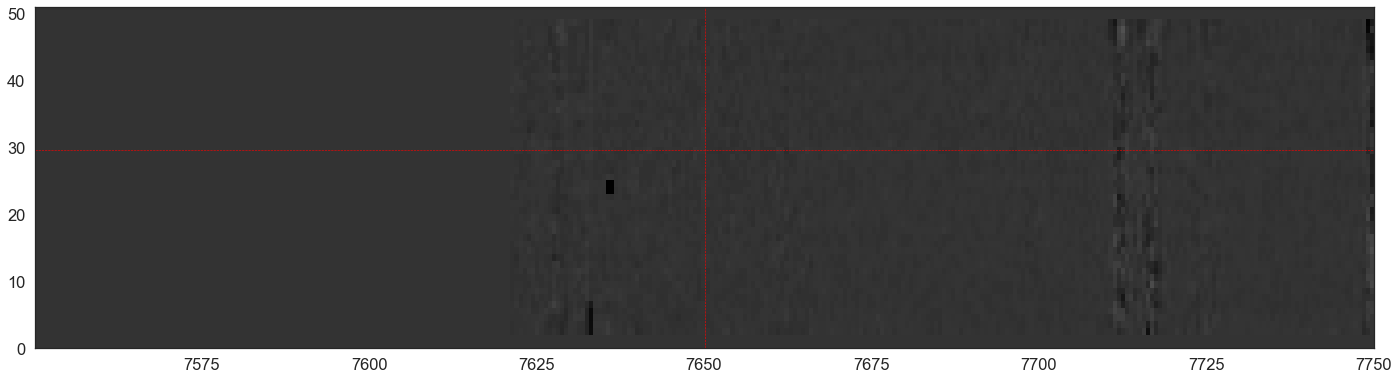

z5_GND_23450 5.244083810563729  Lya :  7588.435054978099


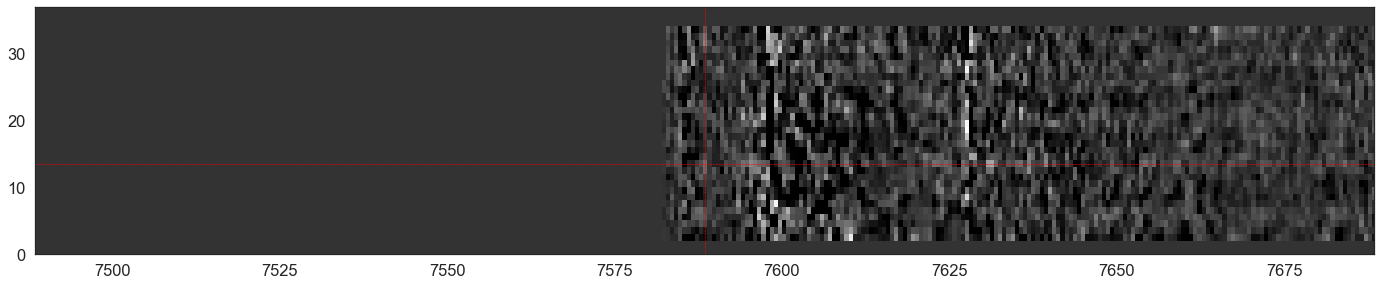

z5_GND_21873 5.270437226012071  Lya :  7620.462360772469


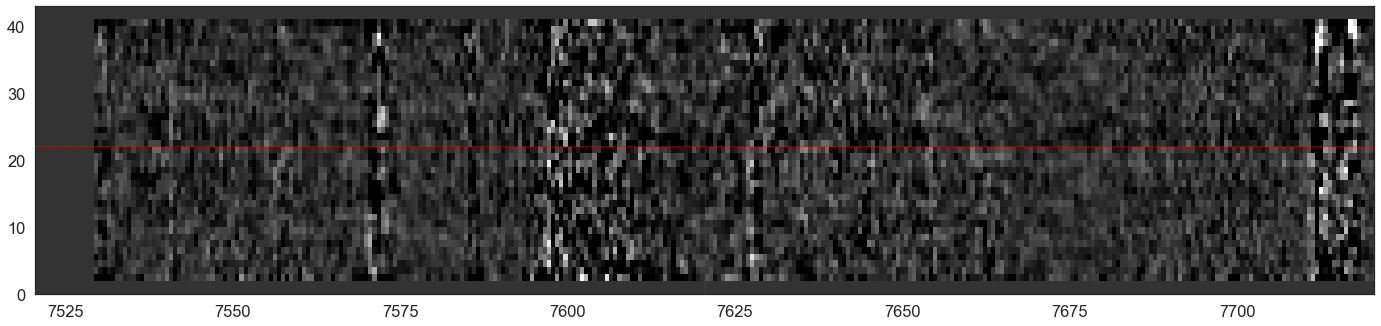

z5_GND_21641 5.184217381250444  Lya :  7515.679383433664


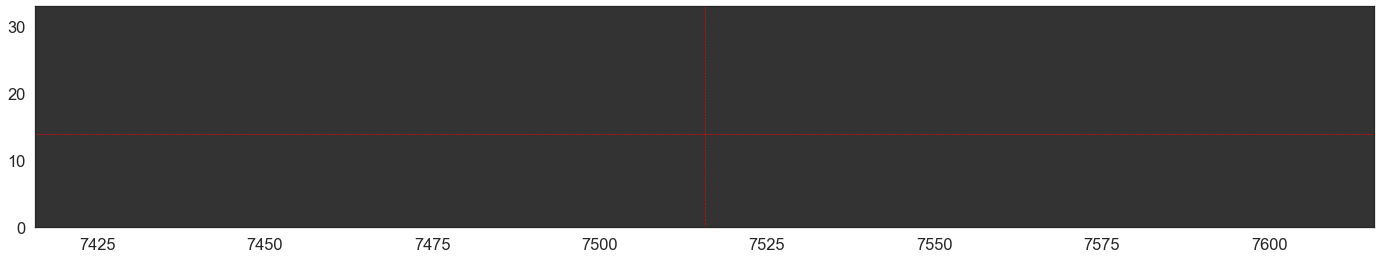

z5_GND_13494 5.38483846879649  Lya :  7759.494191128374


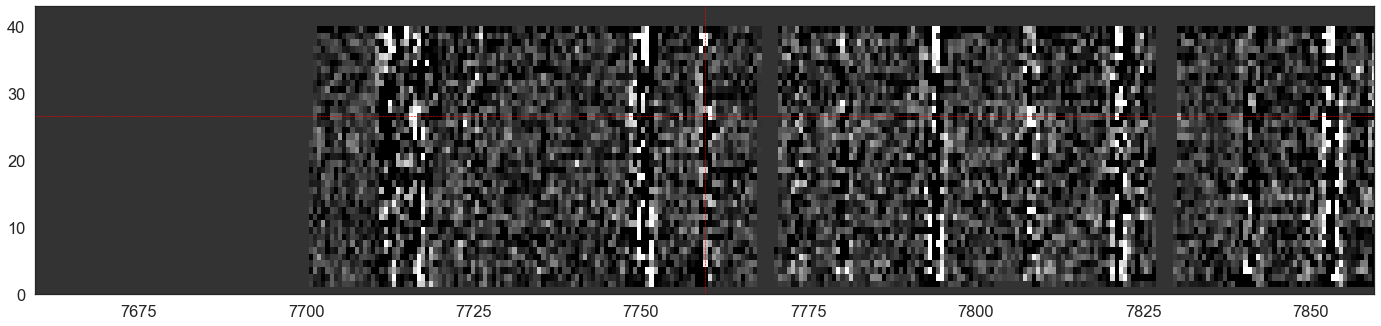

z5_GND_16723 5.367472634339202  Lya :  7738.389492512431


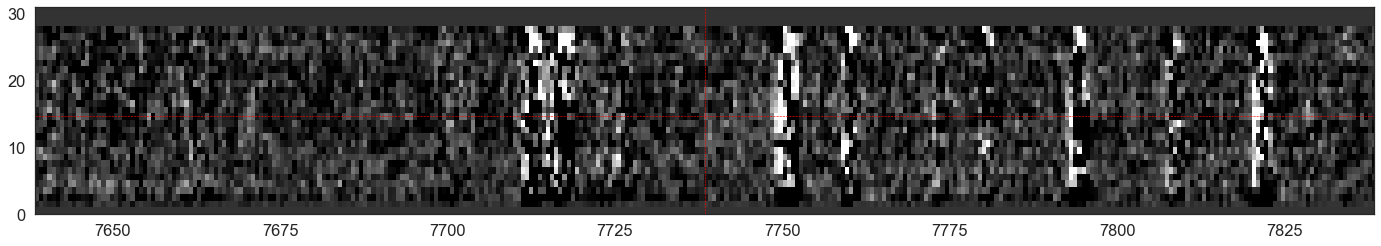

z5_GND_45273 5.1511613630291135  Lya :  7475.5064044892815


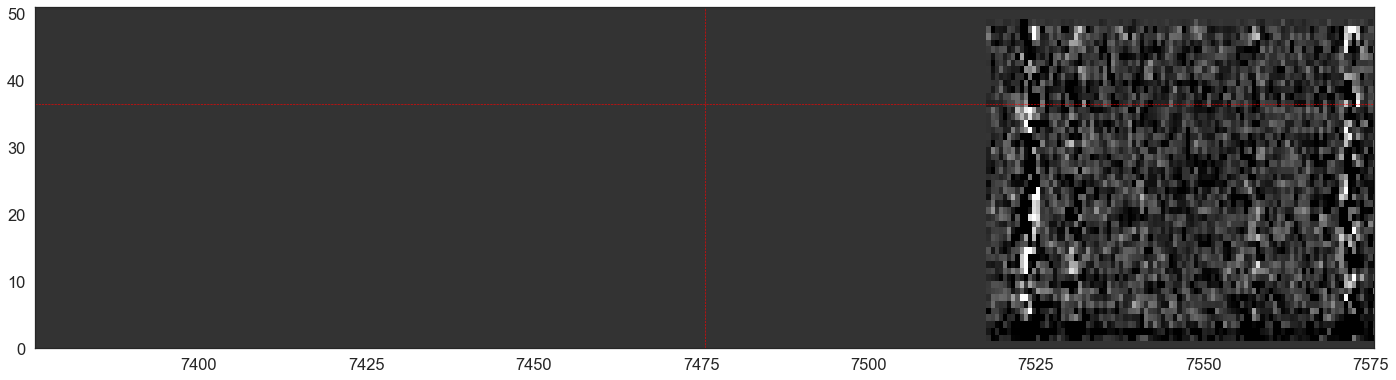

z5_GND_15486 5.191681643429454  Lya :  7524.750701259814


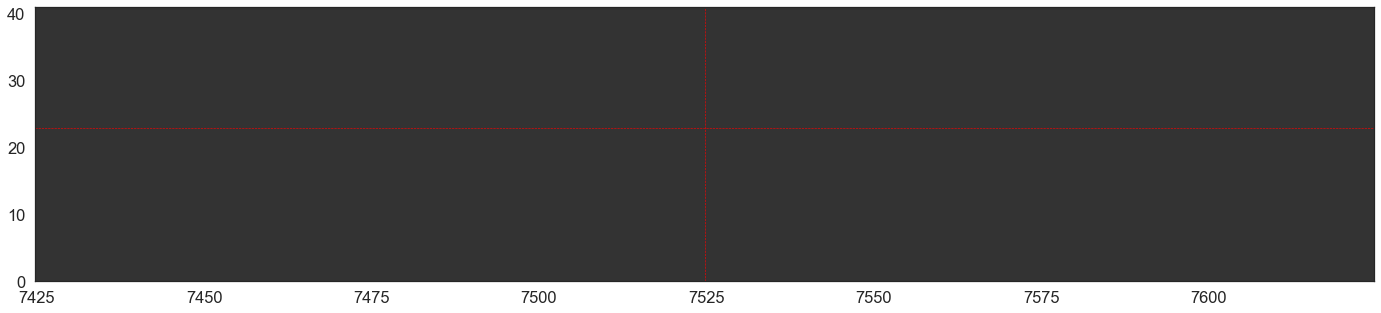

z5_GND_7334 5.543263625248949  Lya :  7952.0282837650475


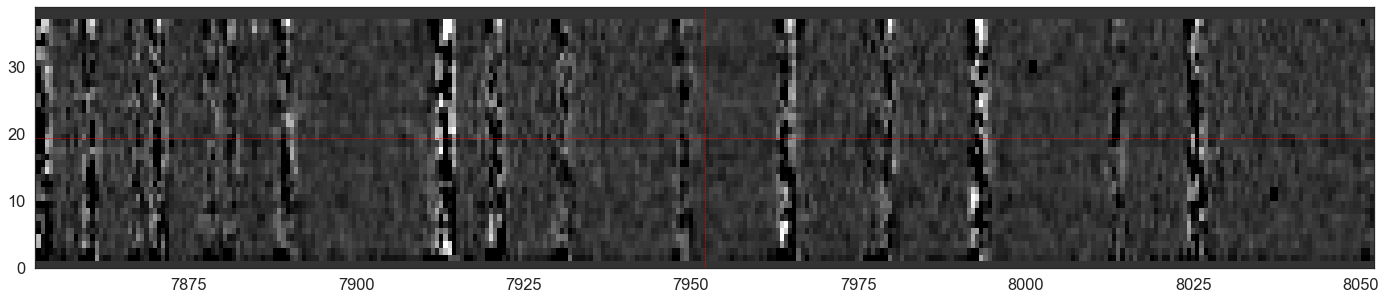

z5_GND_28891 5.184217381250444  Lya :  7515.679383433664


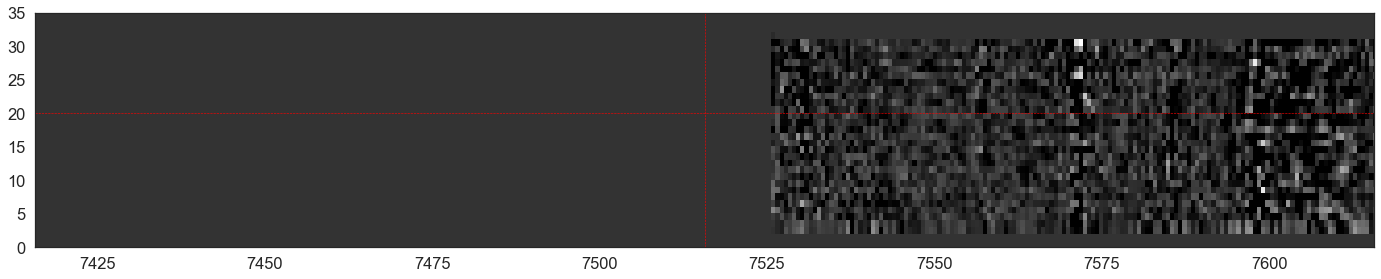

z5_GND_22796 5.4459235531594095  Lya :  7833.73089415463


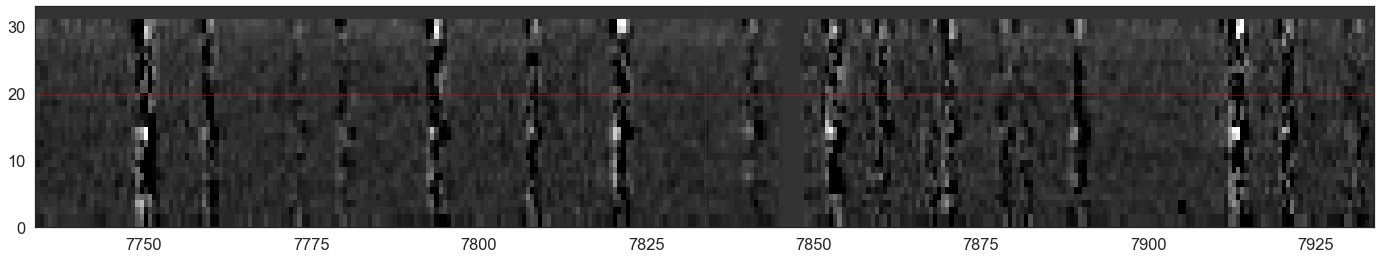

z7_GND_18323 6.41703929583674  Lya :  9013.927856230392


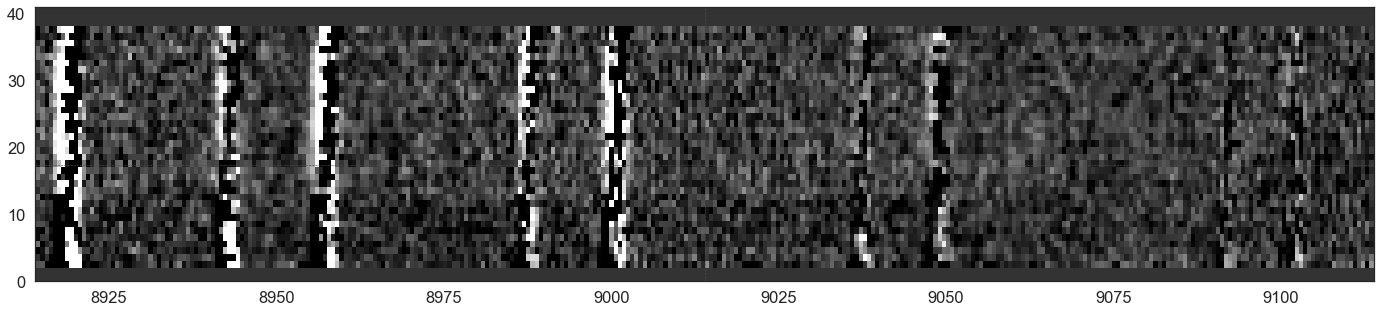

z7_GND_10402 6.529917219809117  Lya :  9151.10839723402


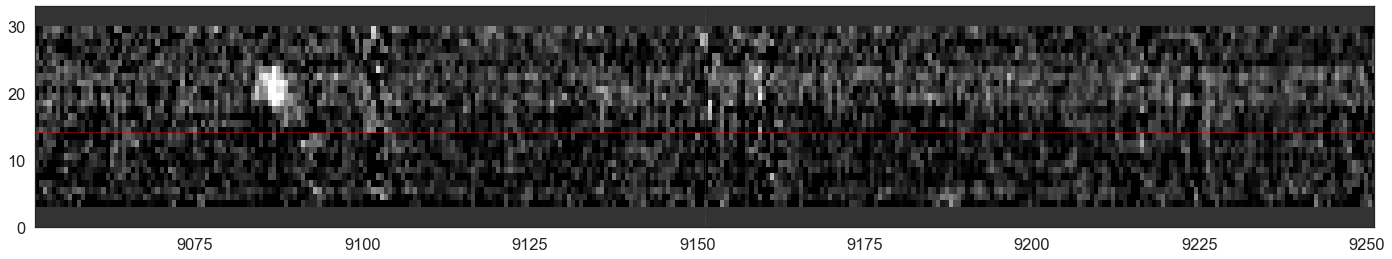

z8_GND_23069 7.126808644715238  Lya :  7534.932792697331


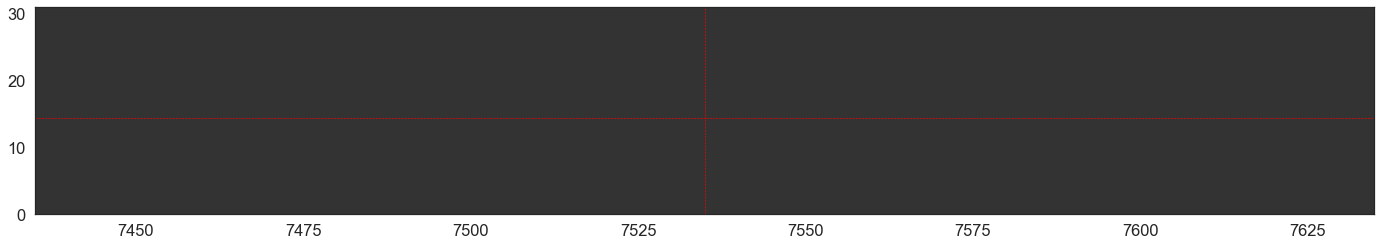

In [89]:
import glob
sns.set_theme(style="white",font_scale = 1.5)
plt.rcParams["figure.figsize"] = (24,16)

fs=glob.glob("../data/large_files/Reduced_Data/Mask1/2D/noiseCorrected/*.fits")+glob.glob("../data/large_files/Reduced_Data/Mask2_1/2D/noiseCorrected/*.fits")+glob.glob("../data/large_files/Reduced_Data/Mask2_2/2D/noiseCorrected/*.fits")+glob.glob("../data/large_files/Reduced_Data/Mask2_3/2D/noiseCorrected/*.fits")
wave2D=np.arange(6760.0,6760.0+5631*0.620000004768,0.620000004768)

for gal in lines[:]:
    if gal["Ha"]!="X":
        id=gal["ID"]
        zlya=(1215.3)*(1+(float(gal["Ha"])/6564.614)-1)
        print(gal["ID"], (float(gal["Ha"])/6564.614)-1, " Lya : ", (1215.3)*(1+(float(gal["Ha"])/6564.614)-1))
    elif gal["Oiii"]!="X":
        id=gal["ID"]
        zlya=(1215.3)*(1+(float(gal["Oiii"])/6564.614)-1)
        print(gal["ID"], (float(gal["Oiii"])/5008.239)-1, " Lya : ", (1215.3)*(1+(float(gal["Oiii"])/6564.614)-1))

    else:
        continue

    for f in fs:
        if id in f:
            data=fits.open(f)


    
    plt.imshow(data[0].data,extent=[min(wave2D),max(wave2D),0,np.shape(data[0].data)[0]],aspect=1,cmap='gray',vmin=-0.5*np.std(data[0].data),vmax=2*np.std(data[0].data))
    plt.axvline(x=zlya,color="red",lw=0.6,ls="--")
    plt.axhline(y=data[0].header["SLITYPIX"],color="red",lw=0.6,ls="--")
    plt.xlim(zlya-100,zlya+100)
    plt.show()


<ipython-input-90-3ef6a0b4d346>:5: RuntimeWarning: invalid value encountered in true_divide
  wave,flux,err=f[1].data["wave"],f[1].data["flux"]/f[1].data["flat"]*1e18,f[1].data["err"]/f[1].data["flat"]*1e18
/Users/gonzalo/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1119: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
/Users/gonzalo/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1395: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,


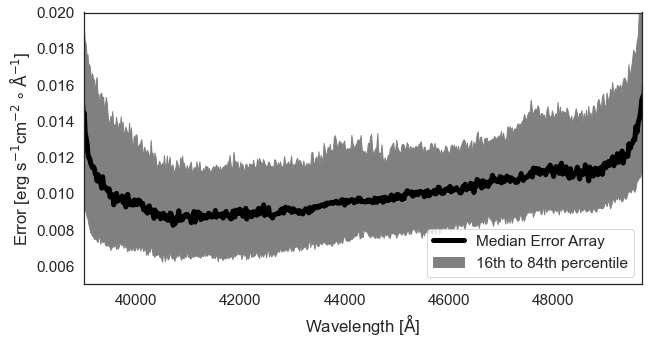

In [90]:
All_e=[]
for gal in PObj[:]:
    #print(gal.ID)
    f=fits.open("../data/large_files/Fresco/fresco-only-n-v2_"+f"{gal.IDFresco:05}"+".1D.fits")
    wave,flux,err=f[1].data["wave"],f[1].data["flux"]/f[1].data["flat"]*1e18,f[1].data["err"]/f[1].data["flat"]*1e18
    All_e.append(err)

sns.set_theme(style="white",font_scale = 1.4)
plt.rcParams["figure.figsize"] = (10,5)

plt.ylim(0.005,0.02)
plt.xlim(39000,49700)

med=np.nanmedian(All_e,axis=0)
p16,p84=np.nanpercentile(All_e,axis=0,q=[16,84])

plt.fill_between(wave, p16, p84,color="gray",alpha=1,label="16th to 84th percentile")
plt.plot(wave,med,color="black",lw="5",ls="-",label="Median Error Array")
plt.legend(loc=4)
plt.ylabel(r"Error [erg s$^{-1}$cm$^{-2}\circ{\mathrm{\AA}}^{-1} $]")
plt.xlabel(r"Wavelength [$\mathrm{\AA}$]")
plt.show()

## Lets smooth it with a rolling median

/Users/gonzalo/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1119: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
/Users/gonzalo/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1395: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,


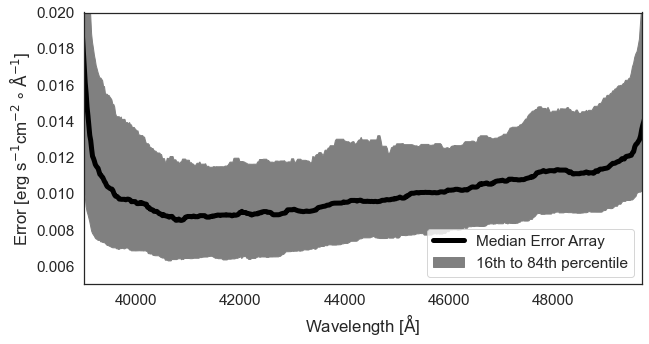

In [91]:
import pandas as pd
import scipy

window=10


med=np.nanmedian(All_e,axis=0)
p16,p84=np.nanpercentile(All_e,axis=0,q=[16,84])


Rolled=pd.Series(med).rolling(window,min_periods=0,axis=0).median().values

Rolled_16=pd.Series(p16).rolling(window,min_periods=0).quantile(0.16).values
Rolled_84=pd.Series(p84).rolling(window,min_periods=0).quantile(0.84).values


sns.set_theme(style="white",font_scale = 1.4)
plt.rcParams["figure.figsize"] = (10,5)

plt.ylim(0.005,0.02)
plt.xlim(39000,49700)

#med=np.nanmedian(All_e,axis=0)
#p16,p84=np.nanpercentile(All_e,axis=0,q=[16,84])

plt.fill_between(wave, Rolled_16, Rolled_84,color="gray",alpha=1,label="16th to 84th percentile")


plt.plot(wave,Rolled,color="black",lw="5",ls="-",label="Median Error Array")
plt.legend(loc=4)
plt.ylabel(r"Error [erg s$^{-1}$cm$^{-2}\circ{\mathrm{\AA}}^{-1} $]")
plt.xlabel(r"Wavelength [$\mathrm{\AA}$]")
plt.show()

ErrFunc=scipy.interpolate.interp1d(wave,Rolled)

def Ratio(wavelength,func):
    return func(wavelength)/func(44000)


## Lets load the 8 sources that do not have a match, but are in the FoV

There are 2 sources that had the same classification, but their Ha would be outside Fresco Anyways

Of these sources there is one LAE and 7 nonDetections

These results are error flux densities, and it was done at around 42000-46000 A. So let's say its 440000
The wavelength dependance I will add as a percentage increase over it depending on the Wavelength curve above.


I need to assume a wavelength position from zphot or zspec, and get a FWHMHa width to extract error.

In [92]:
Errors=np.load("../Catalogs/OnlyFoV_HaFluxErr.npy",allow_pickle=True)
C=ascii.read("../Catalogs/Binospec-Candels.cat")

ErrorsHere=[]
for dat in Errors:
    id=list(C["id_charlotte"]).index(dat[0])
    gal=C[id]
    FluxDensity=dat[1]
    z=gal["photoz"]
    if np.isnan(gal["z"])==False:
        z=gal["z"]

    Ha=6564.614*(1+z)

    FWHM=np.random.normal(loc=375, scale=115, size=1000)
    m=(wave>Ha-100) & (wave<Ha+100)
    bin_size=wave[m][6]-wave[m][5]
    
    listOfErrors=[]

    for fwhm in FWHM:
        edge=(Tools.kmsToangstrom(fwhm,Ha))
        err=float(dat[1])*(edge/bin_size) #1sigma
        err=err*5*bin_size
        listOfErrors.append(err)

    ErrorsHere.append({"ID":C["id_charlotte"][id],"HaFlux":[np.median(listOfErrors)*Ratio(Ha,ErrFunc),np.nan],"EWHa":[np.nan,np.nan] })    


np.save("../Catalogs/ForMaster/inFoV_Limits.npy",ErrorsHere)

In [1]:
np.e**5.651

NameError: name 'np' is not defined

TypeError: loop of ufunc does not support argument 0 of type dict which has no callable log10 method

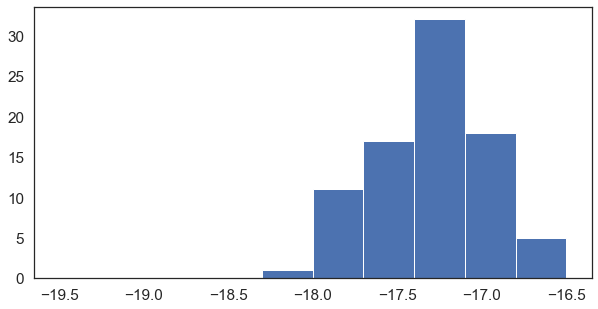

In [93]:
plt.hist(Measurements,range=[-19.5,-16.5],bins=10)
plt.hist(np.log10(ErrorsHere),range=[-19.5,-16.5])
plt.hist(np.log10(Limits),range=[-19.5,-16.5],color="gray")


In [ ]:
AllnoLyaHa

[{'ID': 'z6_GND_16819',
  'HaFlux': [2.034389714043279e-17, 9.709728676410036e-19],
  'HaFWHM': [462.7789733062964, 24.30870664905524],
  'Off': [nan, nan],
  'zsys': array([5.30696644, 5.30715433, 5.30733607]),
  'EWHa': [221.87433804565364, 16.419160055872734],
  'line': 'Ha'},
 {'ID': 'z5_GND_14430',
  'HaFlux': [4.560589514387368e-18, 6.074662158298158e-19],
  'HaFWHM': [253.55715324322227, 39.88557654840406],
  'Off': [nan, nan],
  'zsys': array([5.24102357, 5.24130557, 5.24158688]),
  'EWHa': [117.06477145803633, 16.800277014694203],
  'line': 'Ha'},
 {'ID': 'z5_GND_30190',
  'HaFlux': [2.4485377034425986e-18, 4.510163749799424e-19],
  'HaFWHM': [310.72433766920585, 66.52870846883161],
  'Off': [nan, nan],
  'zsys': array([5.17162482, 5.17210673, 5.1727254 ]),
  'EWHa': [381.58433193291995, 74.46351567046993],
  'line': 'Ha'},
 {'ID': 'z5_GND_42418',
  'HaFlux': [1.0631483504600864e-17, 5.509915945033362e-19],
  'HaFWHM': [478.9455378758721, 24.48828766302904],
  'Off': [nan, nan

In [ ]:
ErrorsHere

[{'ID': 'z6_GND_34516',
  'HaFlux': [2.747511934067944e-18, nan],
  'EWHa': [nan, nan]},
 {'ID': 'z6_GND_44248',
  'HaFlux': [2.784789036498663e-18, nan],
  'EWHa': [nan, nan]},
 {'ID': 'z6_GND_43953',
  'HaFlux': [3.110326463027896e-18, nan],
  'EWHa': [nan, nan]},
 {'ID': 'z5_GND_35096',
  'HaFlux': [2.556968218560057e-18, nan],
  'EWHa': [nan, nan]},
 {'ID': 'z5_GND_42576',
  'HaFlux': [2.1465279198300437e-18, nan],
  'EWHa': [nan, nan]},
 {'ID': 'Hu10_z6_12',
  'HaFlux': [2.706468626945502e-18, nan],
  'EWHa': [nan, nan]},
 {'ID': 'Hu10_z6_9',
  'HaFlux': [3.0287026393050804e-18, nan],
  'EWHa': [nan, nan]},
 {'ID': 'Stark11_42_13066',
  'HaFlux': [3.174433977721701e-18, nan],
  'EWHa': [nan, nan]}]